<a href="https://colab.research.google.com/github/Axiomatics-Team/GREEN-TRANSITION-SOLAR-ENERGY-IN-EGYPT/blob/main/Final_project_DEPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr

#  <h1>**Read Data** </h1>

In [4]:
#reading industries data & Load both sheets into separate DataFrames
inds = pd.read_excel('/content/Full_Data_of_industries updated.xlsx', sheet_name=None)

# # reading Gas stations data & Load both sheets into separate DataFrames
gs = pd.read_excel('/content/Final_GAS Statione_Data.xlsx', sheet_name=None)

pd.set_option('display.max_columns', None)

##**Reading Gas Station data in both sheets from excel file**

In [5]:
# Display the sheet names
print("Sheet Names:", gs.keys())

# Access sheets by name or index
sheet1_name = list(gs.keys())[0]  # First sheet name
sheet2_name = list(gs.keys())[1]  # Second sheet name

gs1 = gs[sheet1_name]
gs2 = gs[sheet2_name]

# Display first few rows of both sheets
print(f"First few rows of {sheet1_name}:")
print(gs1)

print(f"\nFirst few rows of {sheet2_name}:")
print(gs2)

Sheet Names: dict_keys(['Extracted Data', 'Solar panel capicty'])
First few rows of Extracted Data:
    proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                 35.605   
1      AT_1                2      Al Tour                 35.505   
2      AT_1                3      Al Tour                 35.405   
3      AT_1                4      Al Tour                 35.305   
4      AT_1                5      Al Tour                 35.205   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                 46.850   
146    SN_1               22  Salah Nesem                 46.750   
147    SN_1               23  Salah Nesem                 46.650   
148    SN_1               24  Salah Nesem                 46.550   
149    SN_1               25  Salah Nesem                 46.450   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0            

##**Reading Insdustries data in both sheets from excel file**

In [6]:
# Display the sheet names
print("Sheet Names:", inds.keys())

# Access sheets by name or index
sheet1_name = list(inds.keys())[0]  # First sheet name
sheet2_name = list(inds.keys())[1]  # Second sheet name

inds1 = inds[sheet1_name]
inds2 = inds[sheet2_name]

# Display first few rows of both sheets
print(f"First few rows of {sheet1_name}:")
print(inds1)

print(f"\nFirst few rows of {sheet2_name}:")
print(inds2)

Sheet Names: dict_keys(['Full Data', 'Project info'])
First few rows of Full Data:
    proj_Id  Year  Produced_from_Solar_MWh  Cost_saved_EGP  \
0      DF11     1              2571.200000    4.628160e+06   
1      DF11     2              2558.344000    4.605019e+06   
2      DF11     3              2545.552280    4.581994e+06   
3      DF11     4              2532.824519    4.559084e+06   
4      DF11     5              2520.160396    4.536289e+06   
..      ...   ...                      ...             ...   
145    ASF2    21              5059.486416    9.107076e+06   
146    ASF2    22              5034.188984    9.061540e+06   
147    ASF2    23              5009.018039    9.016232e+06   
148    ASF2    24              4983.972949    8.971151e+06   
149    ASF2    25              4959.053084    8.926296e+06   

     Maintenance_Cost_EGP  Net savings(EGP)  Energy_From_Grid_MWh  \
0                  180000      4.448160e+06           8366.000000   
1                  180000      4.4

**</h1>EDA Proccess</h1>**

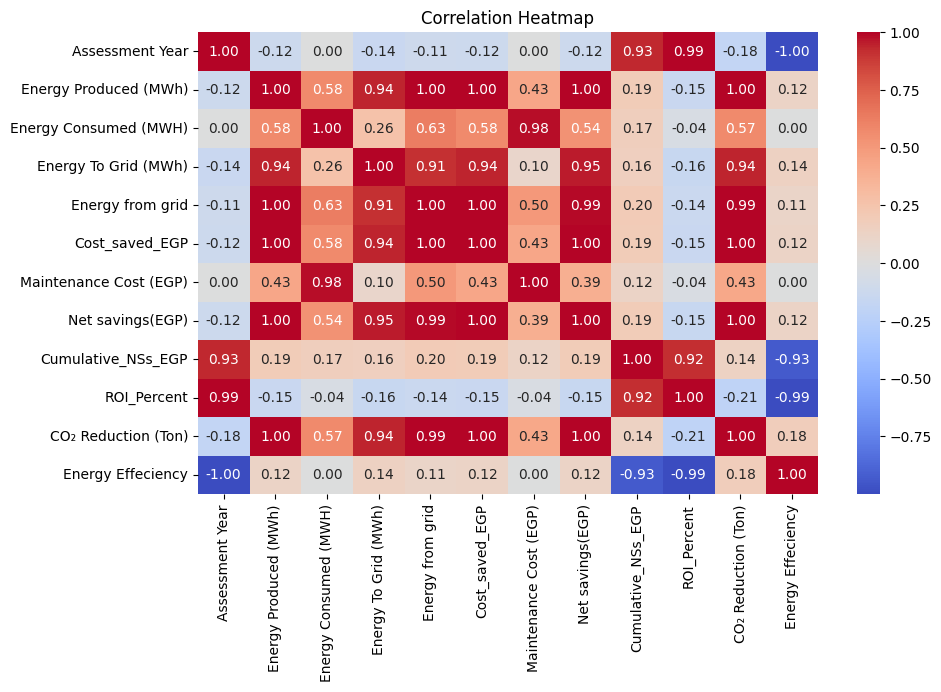

In [7]:
# @title correlation matrix to understand the corelation between the data in Gas station data
# Calculate the correlation matrix , selecting only numbers to avoid errors as we can not apply this on strings
correlation_matrix = gs1.select_dtypes(include=['number']).corr()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

plt.show()

# Interpretation
Energy Produced (MWh)
High correlation with Energy to Grid (0.94), Cost Saved (1.00), Net Savings (0.98), and CO₂ Reduction (1.00):
As in the industries, more solar energy generation results in more electricity sent to the grid, more financial savings, and greater environmental benefits.
Insight: Maximize solar generation to maximize both cost and CO₂ savings.
Moderate correlation with Energy Consumed (0.58):
Some of the produced energy is used internally.
Insight: Understanding how much energy is consumed vs. exported can help optimize system sizing and grid reliance.
2. Energy Consumed (MWh)
Moderately correlated with Cost Saved (0.58), CO₂ Reduction (0.57):
More internal energy usage from solar also saves money and reduces emissions.
Insight: Gas stations that use their solar energy instead of drawing from the grid are both greener and more cost-effective.
3. Energy to Grid (MWh)
Strong correlation with Cost Saved (0.94), Net Savings (0.95), CO₂ Reduction (0.94):
Exporting excess energy is highly profitable and environmentally beneficial.
Insight: Surplus energy shouldn’t be wasted—selling to the grid is valuable.
4. Cost_saved_EGP
Perfectly correlated with Solar Production (1.00), Net Savings (0.98), and CO₂ Reduction (1.00):
Higher production = higher cost savings = higher net savings.
Insight: Highlights the reliability of solar for long-term financial planning.
5. Maintenance Cost (EGP)
High positive correlation with Year (0.91), negative with Efficiency (-0.91):
Maintenance costs rise over time and hurt energy efficiency.
Insight: Long-term system performance may decline; preventive maintenance is crucial.
Positive correlation with ROI (0.89):
ROI still grows despite maintenance costs, likely because net savings outpace expenses over time.
6. Net Savings (EGP)
Strong positive correlation with Solar Production (0.98), Energy to Grid (0.95), and CO₂ Reduction (0.99):
Net savings are strongly driven by generation and grid contribution.
Insight: Even with maintenance costs, solar pays off in the long term.
7. Cumulative_NSs_EGP
Correlated with ROI (0.92) and Year (0.90):
As expected, cumulative net savings and ROI both grow over time.
Insight: These cumulative metrics are key for justifying solar investments.
8. ROI_Percent
Extremely strong correlation with Year (0.99), Cumulative_NSs (0.92), and Cost Savings (0.92):
ROI increases as the years go on, due to rising cumulative savings.
Insight: Long-term sustainability and financial planning are aligned.
Strong negative correlation with Energy Efficiency (-0.99):
Similar to the industrial data, this may reflect upfront efficiency investments delaying short-term ROI.
9. CO₂ Reduction (Tons)
Perfect correlation with Energy Production (1.00):
Every MWh from solar avoids emissions.
Insight: Carbon offsetting is tied 1-to-1 with solar output.
10. Energy Efficiency
Strong negative correlation with ROI (-0.99), Cumulative Savings (-0.93), and Maintenance (-0.91):
As systems age or require more maintenance, efficiency drops, but ROI can still rise.
Insight: Efficiency isn’t everything—financial metrics may improve even if performance slightly declines


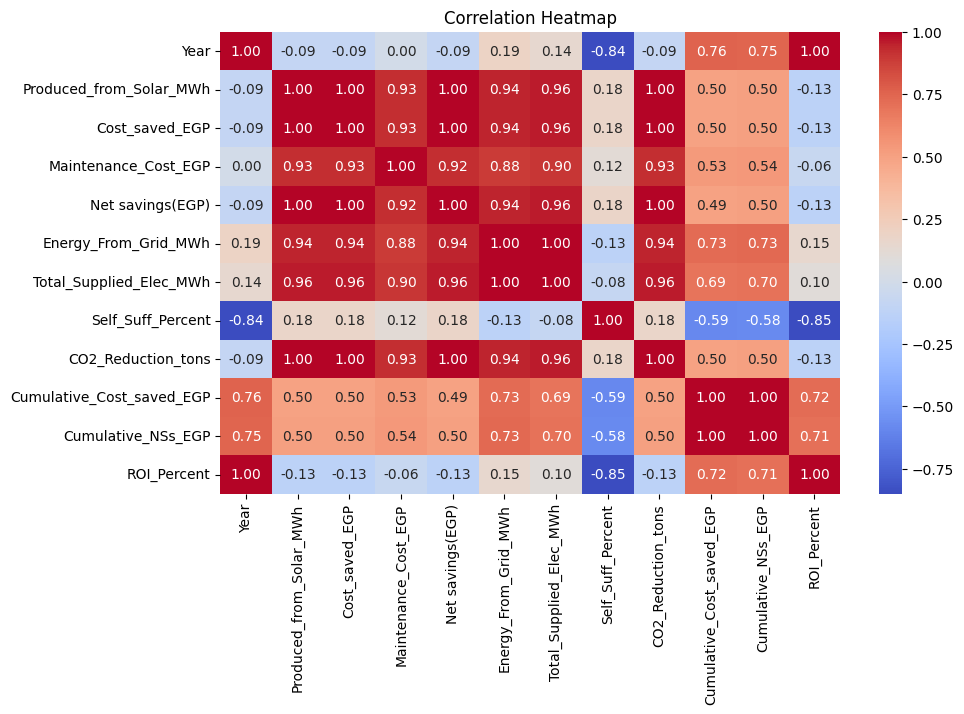

In [8]:
# @title correlation matrix to understand the corelation between the data in industries station data
# Calculate the correlation matrix , selecting only numbers to avoid errors as we can not apply this on strings
correlation_matrix = inds1.select_dtypes(include=['number']).corr()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

plt.show()

#Interpretation
1. Produced_from_Solar_MWh (Energy generated from solar panels)
High correlation with Energy To Grid (0.94):
Projects that produce more solar energy tend to export more electricity to the grid.
Insight: Projects with excess energy production may generate additional income or environmental benefits through grid contribution.
Perfect correlation with Cost_saved_EGP (1.00):
The more energy produced, the more cost is saved annually.
Insight: Solar production is directly linked to financial savings, highlighting the economic value of high-efficiency panels.
Strong correlation with Net Savings (0.98):
Direct impact: more solar energy means higher net savings after maintenance.
Insight: Improving solar output boosts profitability.
Perfect correlation with CO₂ Reduction (1.00):
Solar generation directly cuts down emissions.
Insight: Solar adoption plays a key role in sustainability targets.
2. Maintenance_Cost_EGP (Annual maintenance cost)
Strong positive correlation with Year (0.91):
Maintenance costs tend to increase as projects age.
Insight: Long-term cost planning is crucial. Warranties and maintenance contracts should be evaluated carefully.
Strong negative correlation with Energy Efficiency (-0.91):
As maintenance costs increase, energy efficiency decreases.
Insight: Aging systems may become less efficient, which suggests a need for upgrades or reinvestment.
3. Energy Efficiency
Strong negative correlation with ROI_Percent (-0.99):
Surprisingly, higher efficiency is associated with lower ROI%.
Insight: This may suggest that ROI % is being pulled down by higher upfront investments in efficient systems. Financial returns might be delayed or less noticeable in percentage terms.
Negative correlation with Cumulative_NSs_EGP (-0.93):
As efficiency increases, cumulative net savings decrease slightly.
Insight: Again, might point to higher efficiency being tied to higher costs initially—an area worth deeper financial analysis.
4. ROI_Percent (Return on Investment %)
Strong positive correlation with Year (0.99):
ROI increases steadily over time.
Insight: The longer a solar project runs, the better the financial return, reinforcing solar as a long-term investment.
Strong negative correlation with Energy Efficiency (-0.99):
This requires deeper investigation—perhaps high-efficiency projects take longer to recoup costs.
Positive correlation with Cumulative_NSs_EGP (0.92):
The more savings are accumulated, the better the ROI.
Insight: Financial value builds over time, not just in annual figures but cumulatively.
5. CO₂_Reduction_tons
Perfect correlation with solar energy production (1.00):
CO₂ savings are entirely driven by solar generation.
Insight: Any increase in solar capacity will directly reduce emissions.

**<h1> Data Exploration 📊🔎 </h1>**

# **Gas station Exploration**

In [9]:
gs1.head()

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0    AT_1                1      Al Tour                 35.605   
1    AT_1                2      Al Tour                 35.505   
2    AT_1                3      Al Tour                 35.405   
3    AT_1                4      Al Tour                 35.305   
4    AT_1                5      Al Tour                 35.205   

   Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                 20.625                 14.98         48.767038   
1                 20.625                 14.88         48.630071   
2                 20.625                 14.78         48.493104   
3                 20.625                 14.68         48.356137   
4                 20.625                 14.58         48.219171   

   Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0         56968.0                    4900           52068.0   
1         56808.0                    4900           51908.0   
2         56648.0                    4900           51748.0   
3         56488.0                    4900           51588.0   
4         56328.0                    4900           51428.0   

   Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  
0             52068.0    -0.853906               21.362          99.200000  
1            103976.0    -0.708260               21.272          98.406400  
2            155724.0    -0.563064               21.182          97.619149  
3            207312.0    -0.418316               21.092          96.838196  
4            258740.0    -0.274018               21.002          96.063490

In [10]:
gs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   proj_Id                 150 non-null    object 
 1   Assessment Year         150 non-null    int64  
 2   Project Name            150 non-null    object 
 3   Energy Produced (MWh)   150 non-null    float64
 4   Energy Consumed (MWH)   150 non-null    float64
 5   Energy To Grid (MWh)    150 non-null    float64
 6   Energy from grid        150 non-null    float64
 7   Cost_saved_EGP          150 non-null    float64
 8   Maintenance Cost (EGP)  150 non-null    int64  
 9   Net savings(EGP)        150 non-null    float64
 10  Cumulative_NSs_EGP      150 non-null    float64
 11  ROI_Percent             150 non-null    float64
 12  CO₂ Reduction (Ton)     150 non-null    float64
 13  Energy Effeciency       150 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory

In [11]:
gs1.describe()

Assessment Year  Energy Produced (MWh)  Energy Consumed (MWH)  \
count        150.00000             150.000000             150.000000   
mean          13.00000              35.111167              23.750000   
std            7.23526               5.989762               2.141933   
min            1.00000              28.703000              20.625000   
25%            7.00000              30.858000              21.875000   
50%           13.00000              33.644000              23.750000   
75%           19.00000              35.463500              25.625000   
max           25.00000              48.850000              26.875000   

       Energy To Grid (MWh)  Energy from grid  Cost_saved_EGP  \
count            150.000000        150.000000      150.000000   
mean              11.361167         49.700393    56177.866667   
std                5.066519          9.171648     9583.619422   
min                3.718000         39.964464    45924.800000   
25%                8.053000         43.323045    49372.800000   
50%               10.333000         46.648181    53830.400000   
75%               13.755000         51.158667    56741.600000   
max               21.975000         70.587653    78160.000000   

       Maintenance Cost (EGP)  Net savings(EGP)  Cumulative_NSs_EGP  \
count              150.000000        150.000000        1.500000e+02   
mean              5716.666667      50461.200000        6.643156e+05   
std                510.515816       9373.742095        3.898871e+05   
min               4900.000000      40574.800000        4.441480e+04   
25%               5350.000000      43587.800000        3.510864e+05   
50%               5750.000000      48550.400000        6.503520e+05   
75%               6250.000000      51264.200000        9.484154e+05   
max               6300.000000      71860.000000        1.748500e+06   

       ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  
count   150.000000           150.000000         150.000000  
mean      0.781635            20.705333          90.236590  
std       0.984055             3.624406           5.242276  
min      -0.870382            16.502000          81.807004  
25%      -0.067392            18.308000          85.846349  
50%       0.794070            19.780500          90.084961  
75%       1.605321            21.088750          94.532884  
max       2.673762            29.304000          99.203100

##**Insustries Data Exploration**

In [12]:
inds1.head()

proj_Id  Year  Produced_from_Solar_MWh  Cost_saved_EGP  \
0    DF11     1              2571.200000    4.628160e+06   
1    DF11     2              2558.344000    4.605019e+06   
2    DF11     3              2545.552280    4.581994e+06   
3    DF11     4              2532.824519    4.559084e+06   
4    DF11     5              2520.160396    4.536289e+06   

   Maintenance_Cost_EGP  Net savings(EGP)  Energy_From_Grid_MWh  \
0                180000      4.448160e+06           8366.000000   
1                180000      4.425019e+06           8462.516000   
2                180000      4.401994e+06           8559.932880   
3                180000      4.379084e+06           8658.259970   
4                180000      4.356289e+06           8757.506692   

   Total_Supplied_Elec_MWh  Self_Suff_Percent  CO2_Reduction_tons  \
0             10587.000000           0.240000         1465.584000   
1             11020.860000           0.232137         1458.256080   
2             11105.485160           0.229216         1450.964800   
3             11191.084489           0.226325         1443.709976   
4             11277.667089           0.223465         1436.491426   

   Cumulative_Cost_saved_EGP  Cumulative_NSs_EGP  ROI_Percent  
0               4.628160e+06        4.613160e+06    -0.805560  
1               9.233179e+06        9.038179e+06    -0.619050  
2               1.381517e+07        1.344017e+07    -0.433511  
3               1.837426e+07        1.781926e+07    -0.248937  
4               2.291055e+07        2.217555e+07    -0.065324

In [13]:
inds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   proj_Id                    150 non-null    object 
 1   Year                       150 non-null    int64  
 2   Produced_from_Solar_MWh    150 non-null    float64
 3   Cost_saved_EGP             150 non-null    float64
 4   Maintenance_Cost_EGP       150 non-null    int64  
 5   Net savings(EGP)           150 non-null    float64
 6   Energy_From_Grid_MWh       150 non-null    float64
 7   Total_Supplied_Elec_MWh    150 non-null    float64
 8   Self_Suff_Percent          150 non-null    float64
 9   CO2_Reduction_tons         150 non-null    float64
 10  Cumulative_Cost_saved_EGP  150 non-null    float64
 11  Cumulative_NSs_EGP         150 non-null    float64
 12  ROI_Percent                150 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 

In [14]:
inds1.describe()

Year  Produced_from_Solar_MWh  Cost_saved_EGP  \
count  150.00000               150.000000    1.500000e+02   
mean    13.00000              3386.714356    6.096086e+06   
std      7.23526              1407.697784    2.533856e+06   
min      1.00000              1373.780949    2.472806e+06   
25%      7.00000              2424.142145    4.363456e+06   
50%     13.00000              2992.855082    5.387139e+06   
75%     19.00000              5056.243892    9.101239e+06   
max     25.00000              5593.000000    1.006740e+07   

       Maintenance_Cost_EGP  Net savings(EGP)  Energy_From_Grid_MWh  \
count            150.000000      1.500000e+02            150.000000   
mean          192000.000000      5.904086e+06          14880.229160   
std            17027.415714      2.518097e+06           6143.396529   
min           180000.000000      2.292806e+06           5888.800000   
25%           180000.000000      4.183456e+06           9612.739602   
50%           180000.000000      5.207139e+06          13848.320219   
75%           216000.000000      8.885239e+06          20959.104079   
max           216000.000000      9.851400e+06          25946.592311   

       Total_Supplied_Elec_MWh  Self_Suff_Percent  CO2_Reduction_tons  \
count               150.000000         150.000000          150.000000   
mean              18264.608850           0.185834         1930.427183   
std                7489.128810           0.020249          802.387737   
min                7438.200000           0.143944          783.055141   
25%               12030.813787           0.170499         1381.761023   
50%               16843.796712           0.185150         1705.927397   
75%               26346.885947           0.200424         2882.059019   
max               30819.108012           0.240000         3188.010000   

       Cumulative_Cost_saved_EGP  Cumulative_NSs_EGP  ROI_Percent  
count               1.500000e+02        1.500000e+02   150.000000  
mean                8.083766e+07        7.836916e+07     1.308494  
std                 5.816567e+07        5.695485e+07     1.258997  
min                 2.788920e+06        2.608920e+06    -0.825754  
25%                 3.548693e+07        3.359116e+07     0.232864  
50%                 6.718141e+07        6.483391e+07     1.333738  
75%                 1.125767e+08        1.088417e+08     2.373027  
max                 2.371472e+08        2.317472e+08     3.569299

In [15]:
inds1.tail()

proj_Id  Year  Produced_from_Solar_MWh  Cost_saved_EGP  \
145    ASF2    21              5059.486416    9.107076e+06   
146    ASF2    22              5034.188984    9.061540e+06   
147    ASF2    23              5009.018039    9.016232e+06   
148    ASF2    24              4983.972949    8.971151e+06   
149    ASF2    25              4959.053084    8.926296e+06   

     Maintenance_Cost_EGP  Net savings(EGP)  Energy_From_Grid_MWh  \
145                216000      8.891076e+06          24275.894738   
146                216000      8.845540e+06          24543.951117   
147                216000      8.800232e+06          24814.561573   
148                216000      8.755151e+06          25087.752279   
149                216000      8.710296e+06          25363.549667   

     Total_Supplied_Elec_MWh  Self_Suff_Percent  CO2_Reduction_tons  \
145             29335.381154           0.172470         2883.907257   
146             29578.140101           0.170200         2869.487721   
147             29823.579613           0.167955         2855.140282   
148             30071.725228           0.165736         2840.864581   
149             30322.602751           0.163543         2826.660258   

     Cumulative_Cost_saved_EGP  Cumulative_NSs_EGP  ROI_Percent  
145               2.011720e+08        1.966360e+08     2.541132  
146               2.102335e+08        2.054815e+08     2.700427  
147               2.192497e+08        2.142817e+08     2.858907  
148               2.282209e+08        2.230369e+08     3.016575  
149               2.371472e+08        2.317472e+08     3.173434

**<h1> Data cleaning 📊🧹 </h1>**

##**gas station data cleaning**

In [16]:
gs1.isnull().sum()

proj_Id                   0
Assessment Year           0
Project Name              0
Energy Produced (MWh)     0
Energy Consumed (MWH)     0
Energy To Grid (MWh)      0
Energy from grid          0
Cost_saved_EGP            0
Maintenance Cost (EGP)    0
Net savings(EGP)          0
Cumulative_NSs_EGP        0
ROI_Percent               0
CO₂ Reduction (Ton)       0
Energy Effeciency         0
dtype: int64

In [17]:
gs1.duplicated().sum()

np.int64(0)

In [18]:
gs1= gs1.round(2)
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0           56968.0                    4900           52068.0   
1           56808.0                    4900           51908.0   
2           56648.0                    4900           51748.0   
3           56488.0                    4900           51588.0   
4           56328.0                    4900           51428.0   
..              ...                     ...               ...   
145         74960.0                    6300           68660.0   
146         74800.0                    6300           68500.0   
147         74640.0                    6300           68340.0   
148         74480.0                    6300           68180.0   
149         74320.0                    6300           68020.0   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  
0               52068.0        -0.85                21.36              99.20  
1              103976.0        -0.71                21.27              98.41  
2              155724.0        -0.56                21.18              97.62  
3              207312.0        -0.42                21.09              96.84  
4              258740.0        -0.27                21.00              96.06  
..                  ...          ...                  ...                ...  
145           1475460.0         1.66                27.50              84.48  
146           1543960.0         1.78                27.41              83.81  
147           1612300.0         1.91                27.32              83.14  
148           1680480.0         2.03                27.23              82.47  
149           1748500.0         2.15                27.14              81.81  

[150 rows x 14 columns]

In [19]:
gs2

proj_Id        Project Name  Solar Panel Capacity(KWp)  \
0    AT_1             Al Tour                      17.82   
1   ELK_1           El Kharga                      16.50   
2   ELB_1  Elbyaly - Daqahlya                      19.80   
3   ELS_1              Elswah                      22.44   
4  KOMB_1           Kom Omboh                      16.50   
5    SN_1         Salah Nesem                      27.72   

   Investment Cost (EGP)  Self Sufficiency avg per project  \
0                 356400                             0.422   
1                 330000                             0.418   
2                 336600                             0.416   
3                 343332                             0.408   
4                 330000                             0.414   
5                 554400                             0.409   

   Dependency on Grid  Performance Ratio(%)  Payback Period  ROI(%)  
0               0.578                 0.805            6.80    0.14  
1               0.582                 0.798            7.50    0.13  
2               0.584                 0.795            6.75    0.14  
3               0.592                 0.816            6.50    0.15  
4               0.586                 0.795            7.35    0.14  
5               0.591                 0.814            7.70    0.13

## **Industries cleaning**

In [20]:
inds1.isnull().sum()

proj_Id                      0
Year                         0
Produced_from_Solar_MWh      0
Cost_saved_EGP               0
Maintenance_Cost_EGP         0
Net savings(EGP)             0
Energy_From_Grid_MWh         0
Total_Supplied_Elec_MWh      0
Self_Suff_Percent            0
CO2_Reduction_tons           0
Cumulative_Cost_saved_EGP    0
Cumulative_NSs_EGP           0
ROI_Percent                  0
dtype: int64

In [21]:
inds1.duplicated().sum()

np.int64(0)

In [22]:
# 1. Round AND convert to 2-decimal floats (permanent change)
inds1['Cumulative_Cost_saved_EGP'] = inds1['Cumulative_Cost_saved_EGP'].apply(lambda x: float(f"{x:.2f}"))
inds1['Cumulative_NSs_EGP'] = inds1['Cumulative_NSs_EGP'].apply(lambda x: float(f"{x:.2f}"))

# 2. Force pandas to display full numbers (not scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)

In [23]:
inds1= inds1.round(2)
inds1

proj_Id  Year  Produced_from_Solar_MWh  Cost_saved_EGP  \
0      DF11     1                  2571.20      4628160.00   
1      DF11     2                  2558.34      4605019.20   
2      DF11     3                  2545.55      4581994.10   
3      DF11     4                  2532.82      4559084.13   
4      DF11     5                  2520.16      4536288.71   
..      ...   ...                      ...             ...   
145    ASF2    21                  5059.49      9107075.55   
146    ASF2    22                  5034.19      9061540.17   
147    ASF2    23                  5009.02      9016232.47   
148    ASF2    24                  4983.97      8971151.31   
149    ASF2    25                  4959.05      8926295.55   

     Maintenance_Cost_EGP  Net savings(EGP)  Energy_From_Grid_MWh  \
0                  180000        4448160.00               8366.00   
1                  180000        4425019.20               8462.52   
2                  180000        4401994.10               8559.93   
3                  180000        4379084.13               8658.26   
4                  180000        4356288.71               8757.51   
..                    ...               ...                   ...   
145                216000        8891075.55              24275.89   
146                216000        8845540.17              24543.95   
147                216000        8800232.47              24814.56   
148                216000        8755151.31              25087.75   
149                216000        8710295.55              25363.55   

     Total_Supplied_Elec_MWh  Self_Suff_Percent  CO2_Reduction_tons  \
0                   10587.00               0.24             1465.58   
1                   11020.86               0.23             1458.26   
2                   11105.49               0.23             1450.96   
3                   11191.08               0.23             1443.71   
4                   11277.67               0.22             1436.49   
..                       ...                ...                 ...   
145                 29335.38               0.17             2883.91   
146                 29578.14               0.17             2869.49   
147                 29823.58               0.17             2855.14   
148                 30071.73               0.17             2840.86   
149                 30322.60               0.16             2826.66   

     Cumulative_Cost_saved_EGP  Cumulative_NSs_EGP  ROI_Percent  
0                   4628160.00          4613160.00        -0.81  
1                   9233179.20          9038179.20        -0.62  
2                  13815173.30         13440173.30        -0.43  
3                  18374257.44         17819257.44        -0.25  
4                  22910546.15         22175546.15        -0.07  
..                         ...                 ...          ...  
145               201171965.73        196635965.73         2.54  
146               210233505.90        205481505.90         2.70  
147               219249738.37        214281738.37         2.86  
148               228220889.68        223036889.68         3.02  
149               237147185.23        231747185.23         3.17  

[150 rows x 13 columns]

In [24]:
inds2

proj_Id  Project name  performance ratio% Payback Period  \
0    DF11  Feeder 11 DF                0.76       5Y  & 2M   
1    DF12  Feeder 12 DF                0.77            5 Y   
2    DF18  feeder 18 df                0.78       4Y 11 M    
3    DF20  Feeder 20 DF                0.76          5Y 2M   
4    ASF1      Ascom_f1                0.74          5Y 3M   
5    ASF2      Ascom_F2                0.74          5Y 6M   

   Capacty (No of panels)  ROI %  Maintenance Cost (EGP)  \
0                    1495   0.20                   15000   
1                    1825   0.20                   15000   
2                    1782   0.20                   15000   
3                     897   0.20                   15000   
4                    3499   0.18                   18000   
5                    3499   0.18                   18000   

   Initial Investment Cost (EGP)  Tariffs (EGP/kWh)  
0                       23725394               1.80  
1                       28962750               1.80  
2                       28280340               1.80  
3                       14235390               1.80  
4                       55529130               1.80  
5                       55529130               1.80

**<h1> Data visulaization 📊📈** **</h1>**

#**Comparision between diffrent sectors**

#**Financial Informations**

In [25]:
# @title PROJECT ROI SUMMARY TABLE
# 1. First create the summary table
print("="*60)
print("PROJECT ROI SUMMARY TABLE")
print("="*60)

# 1. Industrial projects ROI (from Project info sheet - inds2)
industrial_roi = inds2[['Project name', 'ROI %']].copy()
industrial_roi['Project Type'] = 'Industrial'

# 2. Gas station projects ROI (from Solar panel capacity sheet - gs2)
gas_station_roi = gs2[['Project Name', 'ROI(%)']].copy()
gas_station_roi.columns = ['Project name', 'ROI %']  # Standardize column names
gas_station_roi['Project Type'] = 'Gas Station'

# Combine all ROI data
all_roi = pd.concat([industrial_roi, gas_station_roi], ignore_index=True)

# Convert ROI to percentage if needed
if (all_roi['ROI %'] < 1).all():  # Check if ROI is in decimal form
    all_roi['ROI %'] = all_roi['ROI %'] * 100

# Sort by ROI
all_roi = all_roi.sort_values('ROI %', ascending=False)

# Display the summary table
print(all_roi[['Project Type', 'Project name', 'ROI %']].to_string(index=False))
print("\n" + "="*60 + "\n")

PROJECT ROI SUMMARY TABLE
Project Type       Project name  ROI %
  Industrial       feeder 18 df  20.07
  Industrial       Feeder 12 DF  19.91
  Industrial       Feeder 20 DF  19.59
  Industrial       Feeder 11 DF  19.50
  Industrial           Ascom_F2  18.13
  Industrial           Ascom_f1  17.81
 Gas Station             Elswah  15.00
 Gas Station            Al Tour  14.00
 Gas Station          Kom Omboh  14.00
 Gas Station Elbyaly - Daqahlya  14.00
 Gas Station          El Kharga  13.00
 Gas Station        Salah Nesem  13.00




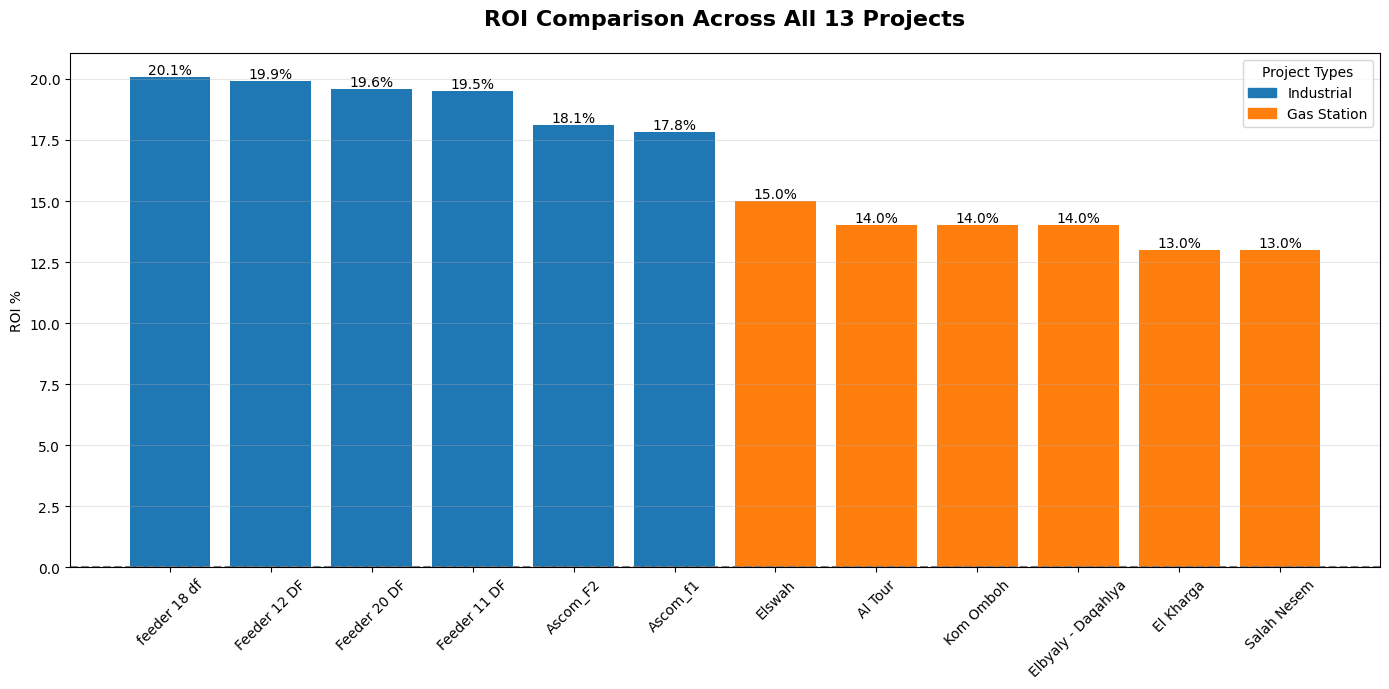

In [26]:
# @title ROI Comparison Across All 13 Projects
# Set up the plot
plt.figure(figsize=(14, 7))

# Create bars with colors by project type
colors = {'Industrial': '#1f77b4', 'Gas Station': '#ff7f0e'}
plt.bar(all_roi['Project name'], all_roi['ROI %'],
        color=[colors[t] for t in all_roi['Project Type']])

# Add basic formatting
plt.axhline(0, color='gray', linestyle='--')
plt.title('ROI Comparison Across All 13 Projects', fontsize=16, pad=20, weight='bold')
plt.ylabel('ROI %')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add values on bars
for x, y in enumerate(all_roi['ROI %']):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom' if y >=0 else 'top')

# Simple legend
legend_items = [plt.Rectangle((0,0),1,1, color=colors[t]) for t in colors]
plt.legend(legend_items, colors.keys(), title='Project Types')

plt.tight_layout()
plt.show()

##Insights:
Highest ROI: The Somabay (Resort) project has the highest ROI at 20.2% , significantly outperforming other projects due to location and larg Capacity factors.

Industrial Projects: Industrial projects (e.g., Feeder 18 DF, Feeder 12 DF, Feeder 20 DF) have higher ROIs (19.5%–20.1% ) due to scale and efficiency.

Gas Station Projects: Gas station projects have lower ROIs (13.0%–15.0% ), showing consistent but less attractive profitability.

Variation in ROI: The difference between the highest ROI (20.2% ) and lowest ROI (13.0% ) is 7.2 percentage points .


#Recommendations:
Focus on High-ROI Projects: Prioritize projects like Somabay and high-performing industrial projects.

Optimize Industrial Projects: Investigate best practices from top performers and apply them across the portfolio.

Enhance Gas Station Projects: Analyze operational inefficiencies and implement cost-saving measures to improve ROIs.

Invest in Scalability: Expand successful models to new locations or increase capacity for additional returns.

Regular Monitoring: Continuously monitor performance and benchmark against industry standards.

Leverage Lessons Learned: Apply insights from underperforming projects to future initiatives.

In [27]:
# @title Each industriel projects ROI Over Time

# Get unique project names
projectsinds = inds1["proj_Id"].unique()

# Generate a waterfall chart for each project
for project in projectsinds:
    df_project = inds1[inds1["proj_Id"] == project].sort_values("Year")

    fig = go.Figure(go.Waterfall(
        x=df_project["Year"],
        y=df_project["ROI_Percent"],
        text=df_project["ROI_Percent"],
        textposition="outside",
        increasing={"marker": {"color": "green"}},
        decreasing={"marker": {"color": "red"}},
        totals={"marker": {"color": "blue"}}
    ))

    fig.update_layout(
        title=f"Waterfall Chart of ROI for {project}",
        xaxis_title="Year",
        yaxis_title="ROI (%)",
        showlegend=False
    )

    fig.show()


#Insights:
ROI Growth Over 25 Years: All projects show a consistent upward ROI trend, becoming profitable over time.
Initial Dip: Projects start with negative ROI due to high upfront costs but recover quickly within a few years.
Performance Variation: ROI growth varies across projects (e.g., Feeder 18 DF outperforms Feeder 20 DF), likely due to scale, efficiency, or operational strategies.
Stable Growth: ROI increases steadily without significant dips, reflecting reliable solar energy generation and cost savings.
Long-Term Profitability: By Year 25, ROIs range from 180%–220% , demonstrating strong financial viability.
Low Maintenance Costs: Maintenance costs are minimal compared to revenue, supporting consistent ROI growth.
Scale Matters: Larger projects (e.g., Feeder 18 DF) achieve higher ROIs faster, while smaller projects still perform well long-term.
#Recommendations:
**Focus on Top Performers**: Investigate and replicate success factors of high-performing projects (e.g., Feeder 18 DF).

**Accelerate ROI Recovery**: Analyze underperforming projects to reduce initial investment recovery time.Invest in Scalability: Prioritize larger-scale projects for higher returns.

**Monitor & Maintain**: Ensure consistent performance through regular maintenance and monitoring.

**Leverage Data**: Use historical trends to guide future investments.

**Diversify Portfolio**: Include other project types (e.g., resorts, gas stations) to balance risk and cash flow.

**Enhance Efficiency:** Upgrade technology and optimize operations to improve energy production.

**Review Tariffs:** Keep tariffs competitive to maximize ROI.

**Sustainability Focus:** Plan for long-term project health through upgrades and environmental compliance.

#**How do different industries compare in terms of their net energy balance from solar production( to what extent are they able to export surplus solar energy back to the grid )after meeting internal consumption needs?**

In [28]:
inds1["Energy_Exported_to_Grid"] = inds1["Produced_from_Solar_MWh"] - inds1["Energy_From_Grid_MWh"] - inds1["Total_Supplied_Elec_MWh"]

# Group by Industry and calculate total energy exported
industry_export = inds1.groupby("proj_Id")["Energy_Exported_to_Grid"].sum().reset_index()

# Sort by highest energy export
industry_export = industry_export.sort_values("Energy_Exported_to_Grid", ascending=False)

industry_export

proj_Id  Energy_Exported_to_Grid
5    DF20               -337478.72
2    DF11               -480249.60
4    DF18               -648478.19
3    DF12               -743229.63
1    ASF2              -1114047.67
0    ASF1              -1140234.74

<ipython-input-29-02a9fb7f8f3f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




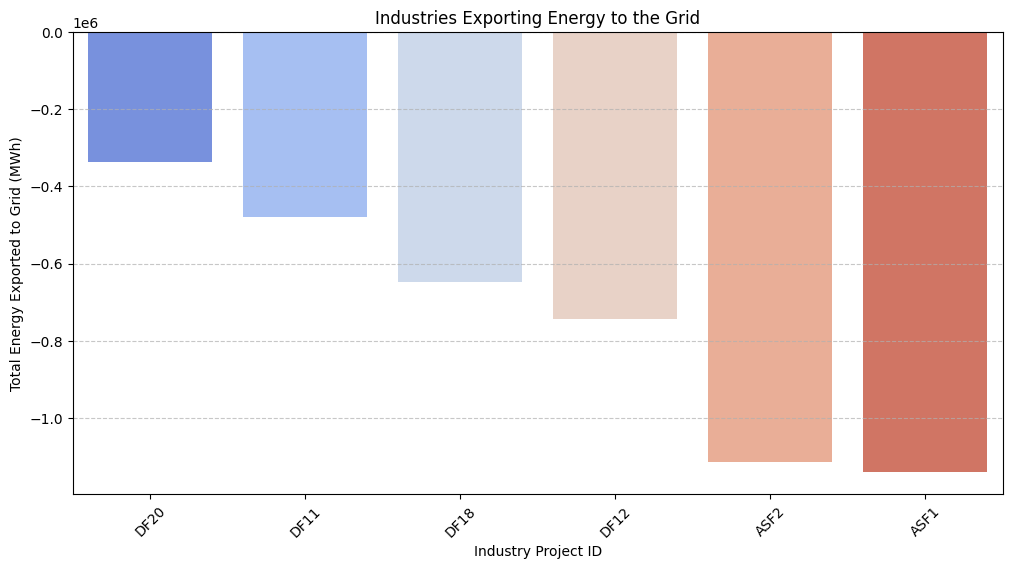

In [29]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="proj_Id", y="Energy_Exported_to_Grid", data=industry_export, palette="coolwarm")

# Formatting
plt.xlabel("Industry Project ID")
plt.ylabel("Total Energy Exported to Grid (MWh)")
plt.title("Industries Exporting Energy to the Grid")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

#Insights:
This chart shows that none of the industry projects are able to export solar energy to the grid, indicating that there is no surplus production. This is primarily due to the high internal energy demand across these industries.

**Industry Performance:**
The industries vary significantly in their ability to export surplus energy:

**DF20 and DF11**:These industries have moderate levels of surplus energy export, with values around -0.4 million MWh.

**DF18 and DF12**: These industries show higher surplus export, with values around -0.6 million MWh.

**ASF2 and ASF1**: These industries lead in surplus export, with values exceeding -1.0 million MWh


# **Net Energy Balance: Solar Production vs. Grid Dependency by Gas stations**

In [30]:
# Group by gas station project and sum the energy sent to the grid
gas_export_summary = gs1.groupby("Project Name")["Energy To Grid (MWh)"].sum().reset_index()

# Sort gas stations based on total energy exported
gas_export_summary = gas_export_summary.sort_values(by="Energy To Grid (MWh)", ascending=False)

gas_export_summary

Project Name  Energy To Grid (MWh)
5         Salah Nesem                519.43
0             Al Tour                344.50
3              Elswah                272.75
2  Elbyaly - Daqahlya                244.00
1           El Kharga                200.75
4           Kom Omboh                123.00

<ipython-input-31-681f7cbe27dd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




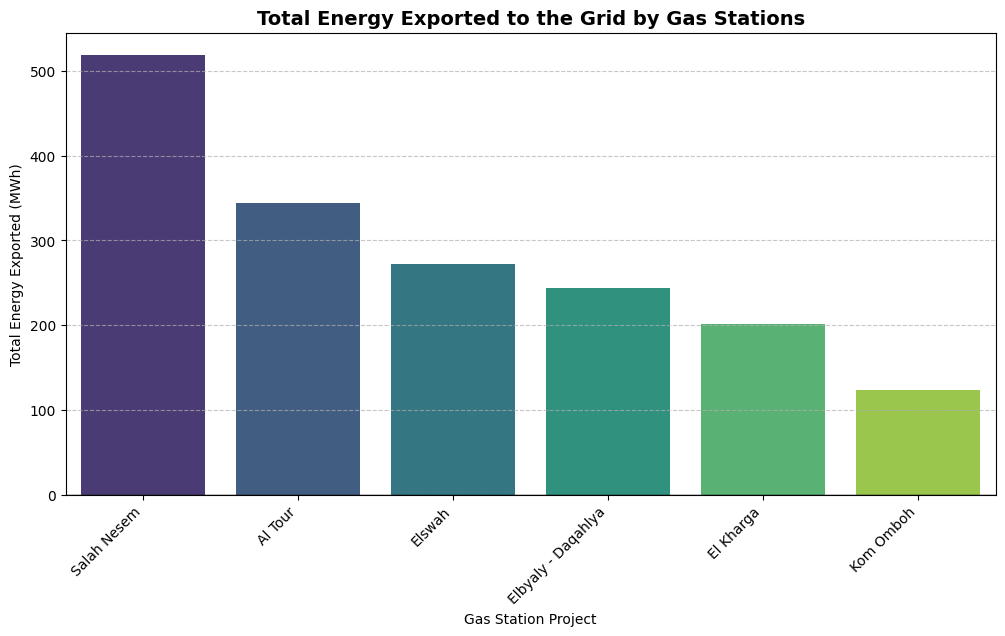

In [31]:
# Visualization - Bar chart of energy export per gas station
plt.figure(figsize=(12, 6))
sns.barplot(x="Project Name", y="Energy To Grid (MWh)", data=gas_export_summary, palette="viridis")

# Formatting
plt.axhline(0, color='black', linewidth=1)  # Baseline at 0
plt.title("Total Energy Exported to the Grid by Gas Stations", fontsize=14, fontweight='bold')
plt.xlabel("Gas Station Project")
plt.ylabel("Total Energy Exported (MWh)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##Interpretation:
Overview of Energy Export to the Grid:
The chart shows the Total quantity of Energy Exported to the Grid (in MWh) for different gas station projects over 25 years.
Projects are ranked by their energy export performance.


**Key Observations:**

**High-Performers** (Salah Nesem, Al Tour, Elbyah): Consistently show high energy exports due to efficient installations and effective management.

**Moderate-Performers** (Elbyaly - Daqahlya, El Kharga): Exhibit balanced solar generation and consumption.

**Low-Performer** (Kom Omboh): Highlights inefficiencies in solar installation, shading, or higher internal demand,areas needing improvement to reduce grid dependency.


##Recommendations:
Optimize Solar Panel Installation for Low-Performing Projects:

Analyze Kom Omboh to identify issues:
Assess panel orientation, tilt angles, and shading.
Evaluate panel and inverter efficiency.
Consider upgrading or expanding solar capacity.

Enhance Energy Management Systems and Implement advanced systems across all projects:
Use smart grids and IoT for dynamic monitoring and control.
Introduce battery storage to store excess energy during peak production.

**Focus on Self-Sufficiency:**
Set clear targets for self-sufficiency, especially for low-export projects like Kom Omboh.Regularly track progress and adjust strategies as needed.

Learn from High-Performing Projects:
Study success factors of projects like Salah Nesem:
Analyze configurations, maintenance practices, and operational strategies.
Apply best practices to improve underperforming projects.



# **Net cost savings from solar energy evolved over 25 years across different sectors (Gas Stations, Industries, and Resort)**

In [32]:
# Calculate savings for each sector
gs_savings = gs1[["Assessment Year", "Net savings(EGP)"]].groupby("Assessment Year").sum().reset_index()
inds_savings = inds1[["Year", "Net savings(EGP)"]].groupby("Year").sum().reset_index()

# Rename columns for clarity
gs_savings = gs_savings.rename(columns={
    "Assessment Year": "Year",
    "Net savings(EGP)": "Gas Stations Savings"
})
inds_savings = inds_savings.rename(columns={
    "Net savings(EGP)": "Industries Savings"
})


# Merge all tables on Year column
combined_savings = gs_savings.merge(
    inds_savings, on="Year", how="outer"
)

# Sort by Year and display without index
combined_savings.sort_values("Year").style.hide()

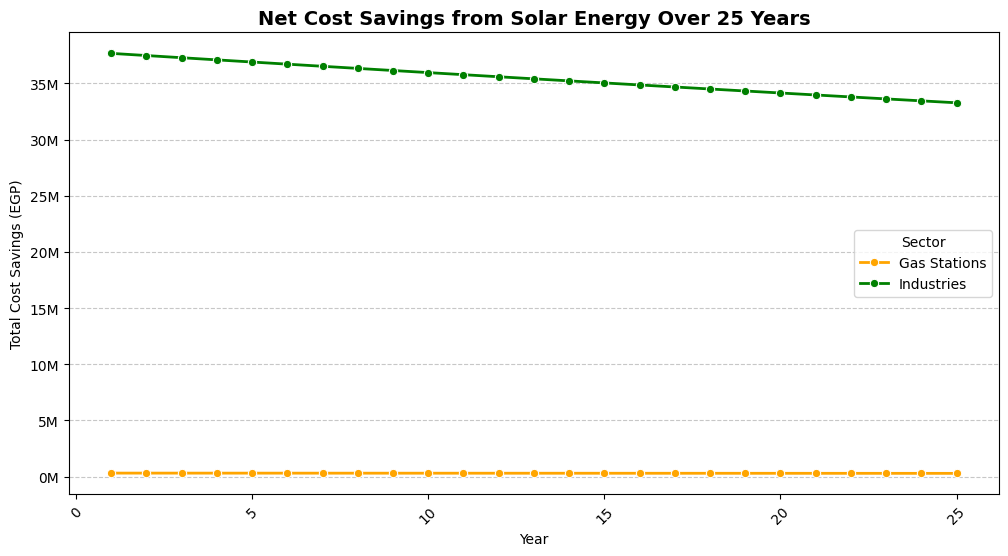

In [33]:
# @title Net Cost Savings from diffrent Solar Energy sectors of fields  Over 25 Years
# Add sector labels
gs_savings["Sector"] = "Gas Stations"
inds_savings["Sector"] = "Industries"

# Rename columns for consistency
gs_savings.rename(columns={"Assessment Year": "Year"}, inplace=True)

# Combine all datasets
all_savings = pd.concat([gs_savings, inds_savings], ignore_index=True)

# Convert 'Year' to numeric, forcing errors to NaN to handle any unexpected values
all_savings["Year"] = pd.to_numeric(all_savings["Year"], errors='coerce')

# Drop any rows where 'Year' is NaN (which might happen if there are invalid values)
all_savings = all_savings.dropna(subset=["Year"])

# Ensure Year is integer for plotting
all_savings["Year"] = all_savings["Year"].astype(int)

# Define the color mapping
sector_colors = {
    "Gas Stations": "orange",
    "Industries": "green",
}

# Visualization - Line chart of cost savings over time
plt.figure(figsize=(12, 6))
# The column name in all_savings is 'Gas Stations Savings', 'Industries Savings', or 'Somabay Savings'
# depending on the sector. We need to melt the DataFrame to plot it correctly.
all_savings = all_savings.melt(id_vars=['Year', 'Sector'], value_vars=['Gas Stations Savings', 'Industries Savings'], var_name='Savings Type', value_name='Net savings(EGP)')
sns.lineplot(x="Year", y="Net savings(EGP)", hue="Sector", data=all_savings, marker="o", linewidth=2, palette=sector_colors)  # Apply custom colors)

# Formatting
plt.title("Net Cost Savings from Solar Energy Over 25 Years", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Total Cost Savings (EGP)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Sector")
plt.xticks(rotation=45)

# Fix y-axis to display in millions (e.g., 10M instead of 1e7)
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show plot
plt.show()

#Insights:
Overview of Net Cost Savings Over 25 Years:
The chart shows Net Cost Savings (in EGP) from solar energy over 25 years across three sectors: Gas Stations , Industries , and Resorts .

**Industries** consistently achieve the highest net savings, exceeding 35 million EGP throughout the period.Lead in net savings due to efficient solar implementation and scale.

**Gas Stations** show no significant net savings, remaining near 0 EGP .
Face challenges in realizing net savings, indicating inefficiencies or low solar production.


#Recommendations:
**Optimize Solar Implementation for Gas Stations:**
Analyze installation strategies (e.g., orientation, shading, capacity).
Evaluate operational practices and energy consumption patterns.
Upgrade or expand solar installations to increase energy production.

**Enhance Efficiency in Resorts:**
Implement advanced energy management systems.
Introduce battery storage to optimize energy usage.
Regularly monitor performance and adjust strategies.

**Leverage Success in Industries:**
Study best practices in solar panel configurations, maintenance, and operations.
Apply lessons learned to improve underperforming sectors like Gas Stations and Resorts.

Invest in **Scalability** for **High-Performing Sectors**:
Scale up solar capacity in Industries to maximize revenue through energy exports.
Explore opportunities to sell excess energy at favorable rates.

**Regular Monitoring and Maintenance:**
Establish real-time monitoring systems.
Schedule regular maintenance to ensure optimal performance.

**Environmental and Economic Benefits:**
Highlight reduced CO₂ emissions to stakeholders.
Emphasize cost savings and additional revenue streams to secure support.

**Diversify Energy Sources:**
Integrate other renewable sources (e.g., wind power) to complement solar energy, especially for Gas Stations.

**Educate Stakeholders:**
Provide training programs and share success stories to foster continuous improvement.

**Review Tariffs and Cost Structures:**
Ensure competitive tariffs and favorable pricing models to enhance net savings.

**Focus on Long-Term Sustainability:**
Plan for regular inspections and upgrades.
Adhere to environmental standards and regulations.

#**Comparison between different Industrial projects**

###**What is the total net savings achieved by each of the six projects over the 25 years, and how does that reflect the financial return for investors in solar energy?**

#**Total Net Savings by Project**

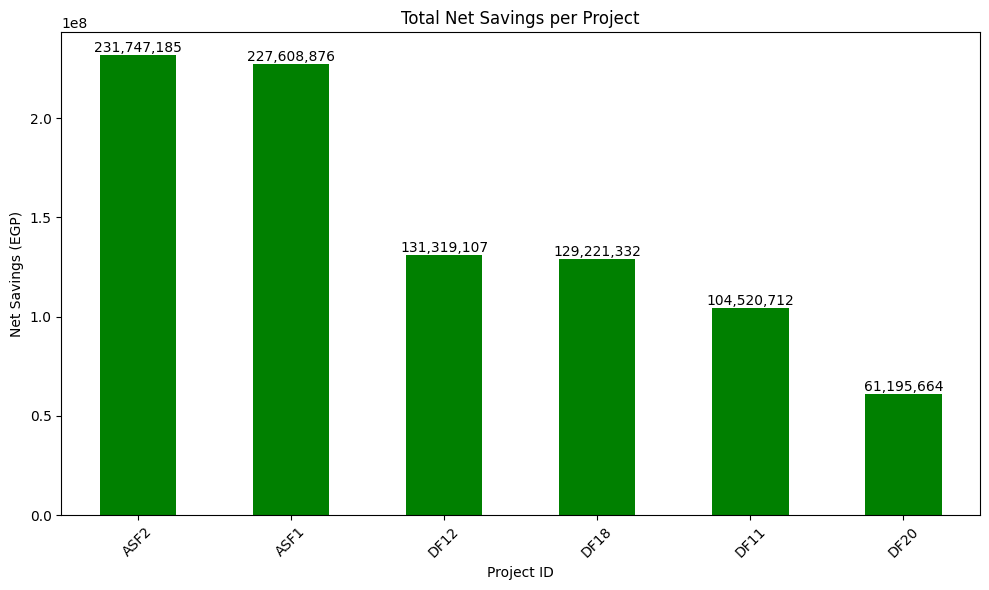

In [34]:
# Group by project and sum the net savings, then sort the values
net_savings_total = inds1.groupby('proj_Id')['Net savings(EGP)'].sum().sort_values(ascending=False)

# Plot the total net savings as a bar chart
ax = net_savings_total.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Total Net Savings per Project')
plt.ylabel('Net Savings (EGP)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()


#Insights:

**Comparison Across Projects:**

High-Performers (ASF2, ASF1): Efficient solar utilization and strong financial performance.

Moderate-Performers (DF12, DF18): Substantial savings but lower than top performers.

Low-Performers (DF11, DF20): Lower savings, indicating inefficiencies or challenges in solar implementation.

#Recommendations:
**Optimize** Low-Performing Projects (DF20, DF11):
Analyze installation strategies (e.g., orientation, shading, capacity).
Evaluate operational practices and energy consumption patterns.
Consider upgrading or expanding solar installations to increase production.

**Enhance Efficiency** in Moderate-Performers (DF12, DF18):
Implement advanced energy management systems.
Introduce battery storage to optimize energy usage.
Regularly monitor performance and adjust strategies.

**Leverage Success** from High-Performersand Invest in their Scalability(ASF2,ASF1):
Study best practices in solar panel configurations, maintenance, and operations.
Apply lessons learned to improve underperforming projects.Explore opportunities to sell excess energy at favorable rates


**Regular Monitoring and Maintenance:**
Establish real-time monitoring systems.
Schedule regular maintenance to ensure optimal performance.

**Environmental and Economic Benefits:**
Highlight reduced CO₂ emissions to stakeholders.
Emphasize cost savings and revenue streams to secure support.

**Diversify Energy Sources:**
Integrate other renewable sources (e.g., wind power) to complement solar energy, especially for low-performing projects like DF20.

**Educate Stakeholders:**
Provide training programs and share success stories to foster continuous improvement.
Review Tariffs and Cost Structures:
Ensure competitive tariffs and favorable pricing models to enhance net savings.

**Focus on Long-Term Sustainability:**
Plan for regular inspections and upgrades.
Adhere to environmental standards and regulations.


#**Total Net Savings by Project Over 25 Years**

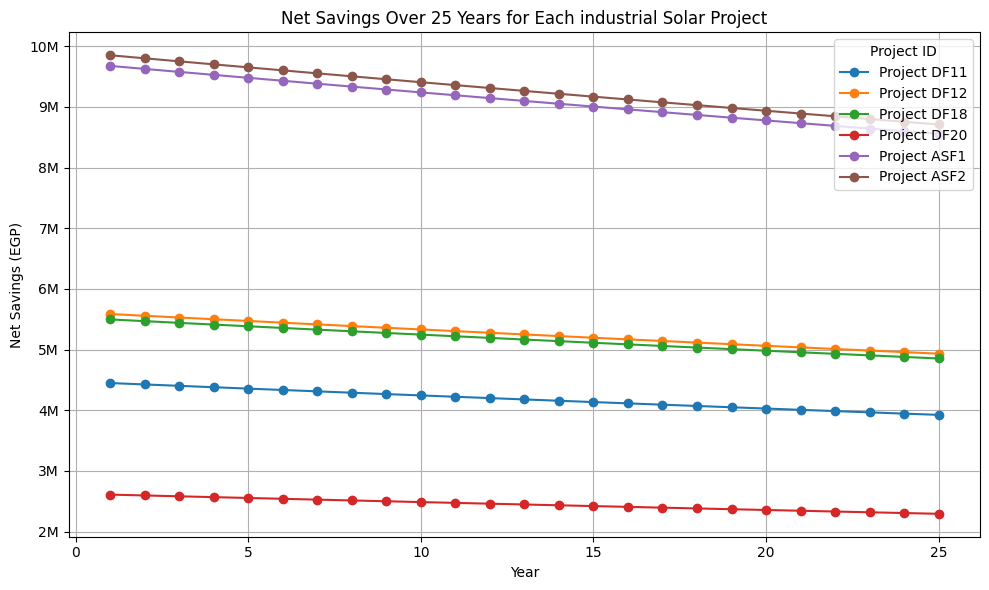

In [35]:
# display values in millions (e.g., 1M, 2M)
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'  # Divide by 1e6 to convert to millions

# Start a new figure for plotting
plt.figure(figsize=(10, 6))

# Loop through each project and plot its net savings over the years
for project in inds1['proj_Id'].unique():
    project_data = inds1[inds1['proj_Id'] == project]

    # Plot a line for each project with markers
    plt.plot(project_data['Year'], project_data['Net savings(EGP)'],
             label=f'Project {project}', marker='o')

# Add titles and labels
plt.title('Net Savings Over 25 Years for Each industrial Solar Project')
plt.xlabel('Year')
plt.ylabel('Net Savings (EGP)')

# Apply the custom formatter to the Y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add legend and grid for better readability
plt.legend(title='Project ID')
plt.grid(True)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#Insights:
How

**Key Observations**:

High-Performers (ASF2, ASF1): Consistently achieve high net savings, indicating efficient solar utilization.

Moderate-Performers (DF18, DF12): Show stable but lower savings compared to top performers.

Low-Performers (DF11, DF20): Exhibit significantly lower savings
**Trends Over Time:**

All projects show a general downward trend in net savings due to factors like inflation and maintenance costs.
Despite the decline, most projects maintain relatively stable performance.
#Recommendations:

 **Economic Benefits**:


**Review Tariffs and Cost Structures:**
Ensure competitive tariffs and favorable pricing models.
Explore incentives to enhance net savings.

**Focus on Long-Term Sustainability:**
Plan for regular inspections and upgrades.
Adhere to environmental standards and regulations.

###**How has the self-sufficiency percentage from solar energy developed over the years for each project, and is there a project that shows a noticeable improvement compared to others?**

#**Self-Sufficiency Trend Over Time**

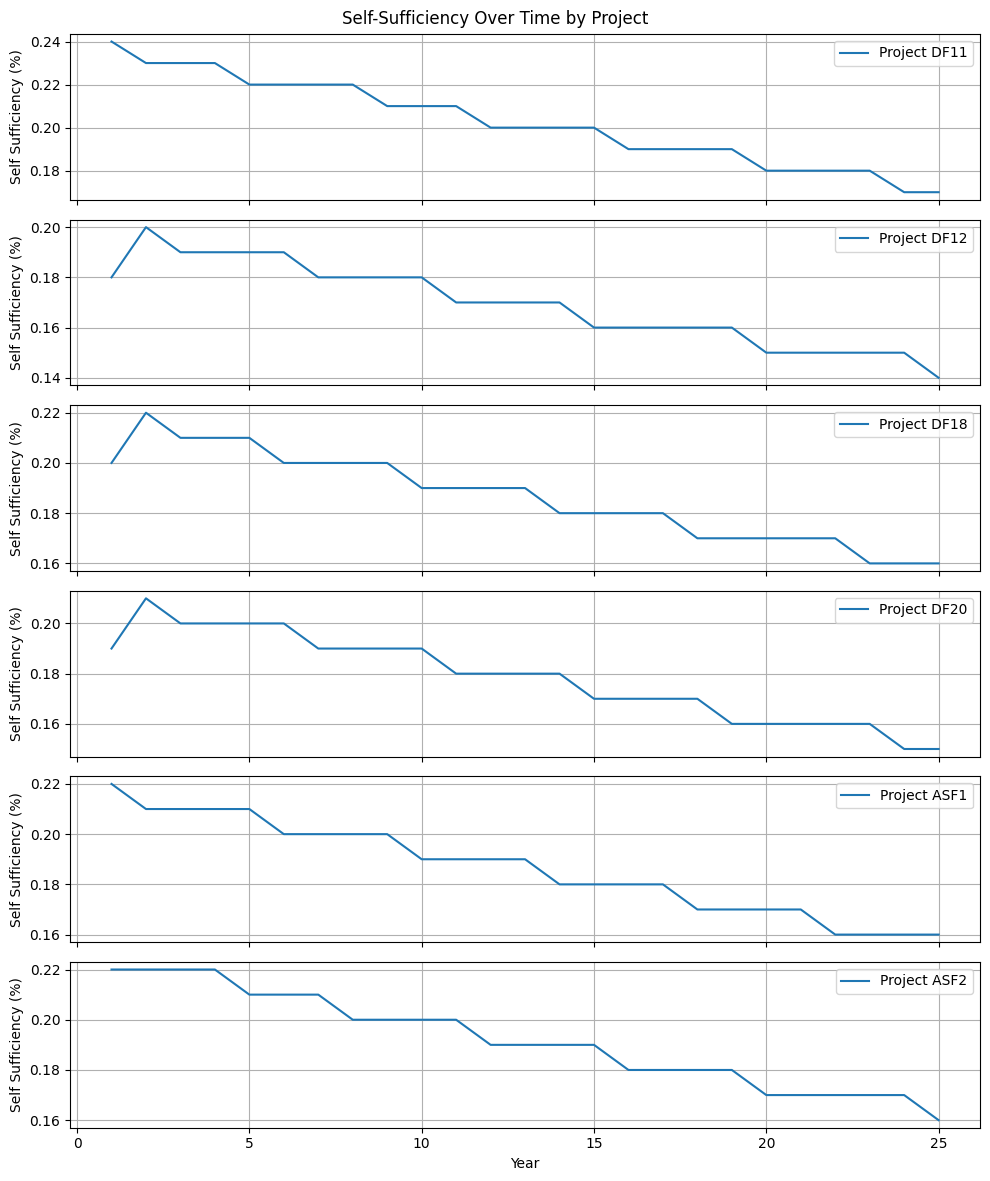

In [36]:
# Create a figure with subplots for each project
fig, axes = plt.subplots(len(inds1['proj_Id'].unique()), 1, figsize=(10, 12), sharex=True)

for i, proj in enumerate(inds1['proj_Id'].unique()):
    project_data = inds1[inds1['proj_Id'] == proj]
    axes[i].plot(project_data['Year'], project_data['Self_Suff_Percent'], label=f'Project {proj}')
    axes[i].set_ylabel('Self Sufficiency (%)')
    axes[i].legend()
    axes[i].grid(True)

fig.suptitle('Self-Sufficiency Over Time by Project')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

#Insights:
Overview of Self-Sufficiency Over Time:
The chart shows the Self-Sufficiency Percentage (%) from solar energy over 25 years for five projects: DF11, DF12, DF18, DF20, ASF1, and ASF2 .

DF11 leads with the highest self-sufficiency (>20%).

DF12 and DF20 show lower self-sufficiency (~16–18%).

ASF2 demonstrates noticeable improvement over time, starting high (22%) and stabilizing around 18–20%.


**Trends Over Time:**
All projects show a general downward trend in self-sufficiency due to factors like aging equipment or changing in internal demand and decreas in effeciency.
ASF2 stands out with a more pronounced initial decline followed by stabilization.
#Recommendations:
Optimize Low-Performing Projects (DF12, DF20):
Analyze installation strategies (e.g., orientation, shading, capacity).
Evaluate operational practices and energy consumption patterns.
Consider upgrading or expanding solar installations.

Enhance Efficiency in Moderate-Performers (DF18, ASF1):
Implement advanced energy management systems.
Explore battery storage to capture excess solar energy.
Regularly monitor performance and adjust strategies.

Leverage Success from High-Performers (DF11):
Study best practices in solar panel configurations, maintenance, and operations.
Apply lessons learned to improve other projects.

Invest in Scalability for High-Performers (ASF2):
Scale up solar capacity to enhance self-sufficiency.
Explore opportunities to sell excess energy at favorable rates.


 **Economic Benefits**:

###Diversify Energy Sources:

Integrate other renewable sources (e.g., wind power) to complement solar energy, especially for low-performing projects like DF20.
Educate Stakeholders:
Provide training programs and share success stories to foster continuous improvement.



###**What is the relationship between the amount of solar energy produced and the CO₂ reduction, and is there a direct correlation?**

#**Solar Energy vs CO2 Reduction (Correlation)**

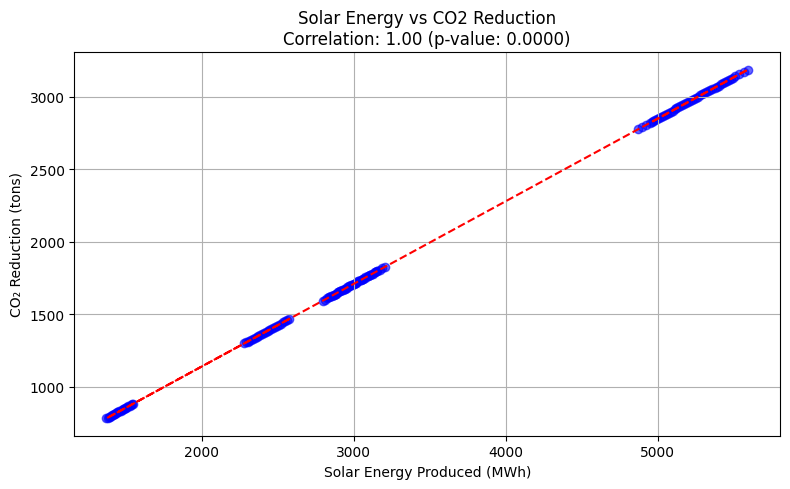

Pearson's correlation coefficient: 1.000
P-value: 0.0000


In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(inds1['Produced_from_Solar_MWh'], inds1['CO2_Reduction_tons'], c='blue', alpha=0.6)

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(inds1['Produced_from_Solar_MWh'], inds1['CO2_Reduction_tons'])

# Add correlation to the plot
plt.title(f'Solar Energy vs CO2 Reduction\nCorrelation: {corr:.2f} (p-value: {p_value:.4f})')
plt.xlabel('Solar Energy Produced (MWh)')
plt.ylabel('CO₂ Reduction (tons)')

# Add trendline
z = np.polyfit(inds1['Produced_from_Solar_MWh'], inds1['CO2_Reduction_tons'], 1)
p = np.poly1d(z)
plt.plot(inds1['Produced_from_Solar_MWh'], p(inds1['Produced_from_Solar_MWh']), "r--")

plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation details
print(f"Pearson's correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

#Insights:
Overview of the Relationship:
The chart shows a perfect positive correlation (Pearson's coefficient = 1.000) between solar energy production and CO₂ reduction.
Increased solar energy directly leads to proportional reductions in CO₂ emissions.
Key Observations:
A clear linear relationship exists, with higher solar energy production amplifying environmental benefits predictably.
The p-value (0.0000) confirms statistical significance, ruling out chance.
Implications for Clean Energy Adoption:
Strong evidence that solar energy reduces carbon emissions effectively.
Demonstrates the environmental value of transitioning to clean energy.
#Recommendations:
**Communicate Impact:**

Highlight the direct link between solar energy and CO₂ reduction to stakeholders.Use data in reports and presentations to emphasize sustainability benefits.

**Quantify Benefits: **

Provide examples like producing 5,000 MWh of solar energy = ~3,000 tons CO₂ reduction .Show how solar helps meet sustainability goals.

**Highlight Long-Term Gains:**

Stress consistent environmental benefits over time with increased solar production.Encourage long-term investments in solar infrastructure.

**Integrate into Business Cases:**

Combine financial savings and emission reductions to justify solar projects. Present solar as a win-win for profitability and sustainability.

**Scale Up Projects:**

Justify larger solar investments using the strong correlation. Expand capacity for greater environmental impact.

**Monitor Performance:**

Implement real-time monitoring systems for solar production and CO₂ reductions. Optimize performance through maintenance and upgrades.

**Enhance Brand Reputation:**

Promote sustainability commitment in marketing. Showcase solar adoption as a market differentiator.Highlight regulatory compliance and ***sustainability leadership benefits***

###**What is the average annual CO₂ reduction per MWh of energy produced for each project (CO₂ efficiency)?**

In [38]:
# Calculate PROPER efficiency for each project
# First sum all CO2 reduction and energy production PER PROJECT
project_totals = inds1.groupby('proj_Id').agg({
    'CO2_Reduction_tons': 'sum',
    'Produced_from_Solar_MWh': 'sum'
})

# THEN calculate efficiency (total CO2 reduced / total energy produced)
project_totals['CO2_Efficiency'] = (project_totals['CO2_Reduction_tons'] /
                                   project_totals['Produced_from_Solar_MWh'])

# Sort by efficiency
co2_efficiency = project_totals['CO2_Efficiency'].sort_values()
print("Project Totals Verification:")
project_totals

Project Totals Verification:


CO2_Reduction_tons  Produced_from_Solar_MWh  CO2_Efficiency
proj_Id                                                             
ASF1               73786.15                129449.38            0.57
ASF2               75096.61                131748.43            0.57
DF11               34523.22                 60567.04            0.57
DF12               43009.38                 75455.03            0.57
DF18               42345.06                 74289.62            0.57
DF20               20803.62                 36497.61            0.57

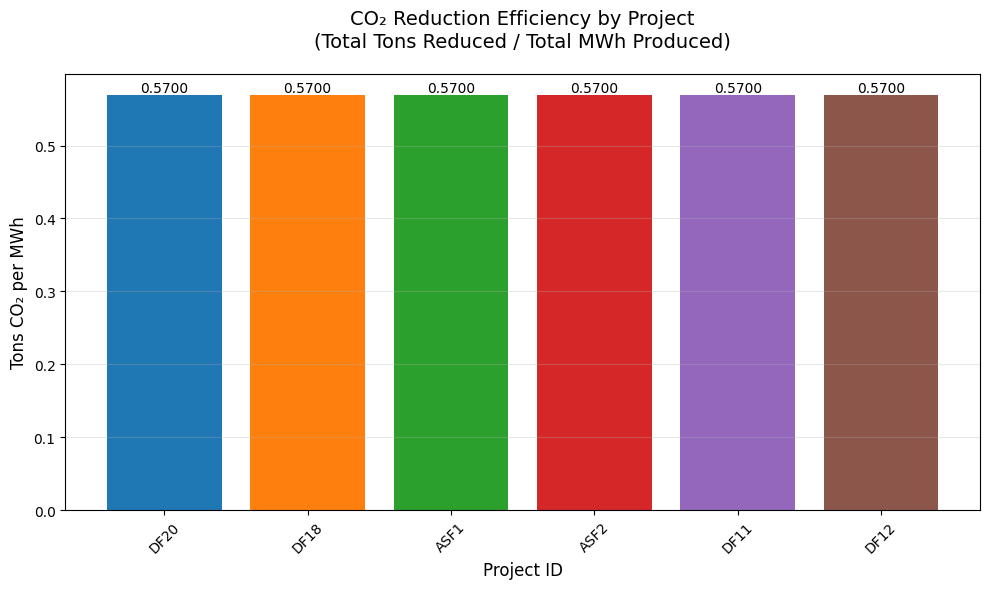

In [39]:
# Create the visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(co2_efficiency.index, co2_efficiency.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.4f}',  # 4 decimal places for precision
             ha='center', va='bottom')

# Formatting
plt.title('CO₂ Reduction Efficiency by Project\n(Total Tons Reduced / Total MWh Produced)',
          pad=20, fontsize=14)
plt.xlabel('Project ID', fontsize=12)
plt.ylabel('Tons CO₂ per MWh', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#Insights:
Overview of CO₂ Reduction Efficiency:
The chart shows a consistent CO₂ Reduction Efficiency of 0.5700 Tons CO₂ per MWh across six projects: DF20, DF18, ASF1, ASF2, DF11, and DF12 .
Uniform performance indicates standardized solar technologies and practices.
Key Observations:
No variation in efficiency across projects.
High reliability and consistency in CO₂ reduction per unit of solar energy produced.
#Recommendations:
Leverage Consistent Performance:
Use the 0.5700 Tons CO₂/MWh benchmark for future projects.
Set clear goals to maintain or exceed this efficiency.
Optimize Energy Production:
Focus on increasing total solar energy output rather than improving efficiency.
Expand capacity or improve system uptime to maximize CO₂ reductions.
Monitor Equipment and Maintenance:
Conduct regular maintenance to sustain high efficiency.
Address issues promptly to avoid deviations.
Invest in Advanced Technologies:
Explore innovations to potentially enhance efficiency beyond current levels.
Promote Standardization:
Ensure uniformity across projects to maintain consistent results.
Communicate Environmental Impact:
Highlight the 0.5700 Tons CO₂/MWh efficiency to stakeholders.
Use data to support sustainability reports and demonstrate environmental benefits.
Scale Up Projects:
Prioritize scaling successful models to new locations.
Expand solar capacity while maintaining efficiency.
Benchmark Against Industry Standards:
Compare 0.5700 Tons CO₂/MWh with industry benchmarks.
Identify areas for improvement or use as a competitive advantage.
Educate Stakeholders:
Train managers and operators on maintaining high efficiency.
Share best practices and success stories.
Incentivize Performance:
Reward teams that achieve or exceed efficiency benchmarks.

#**Is there a time-based relationship between the decrease in dependency on the national grid and the increase in annual cost savings?**

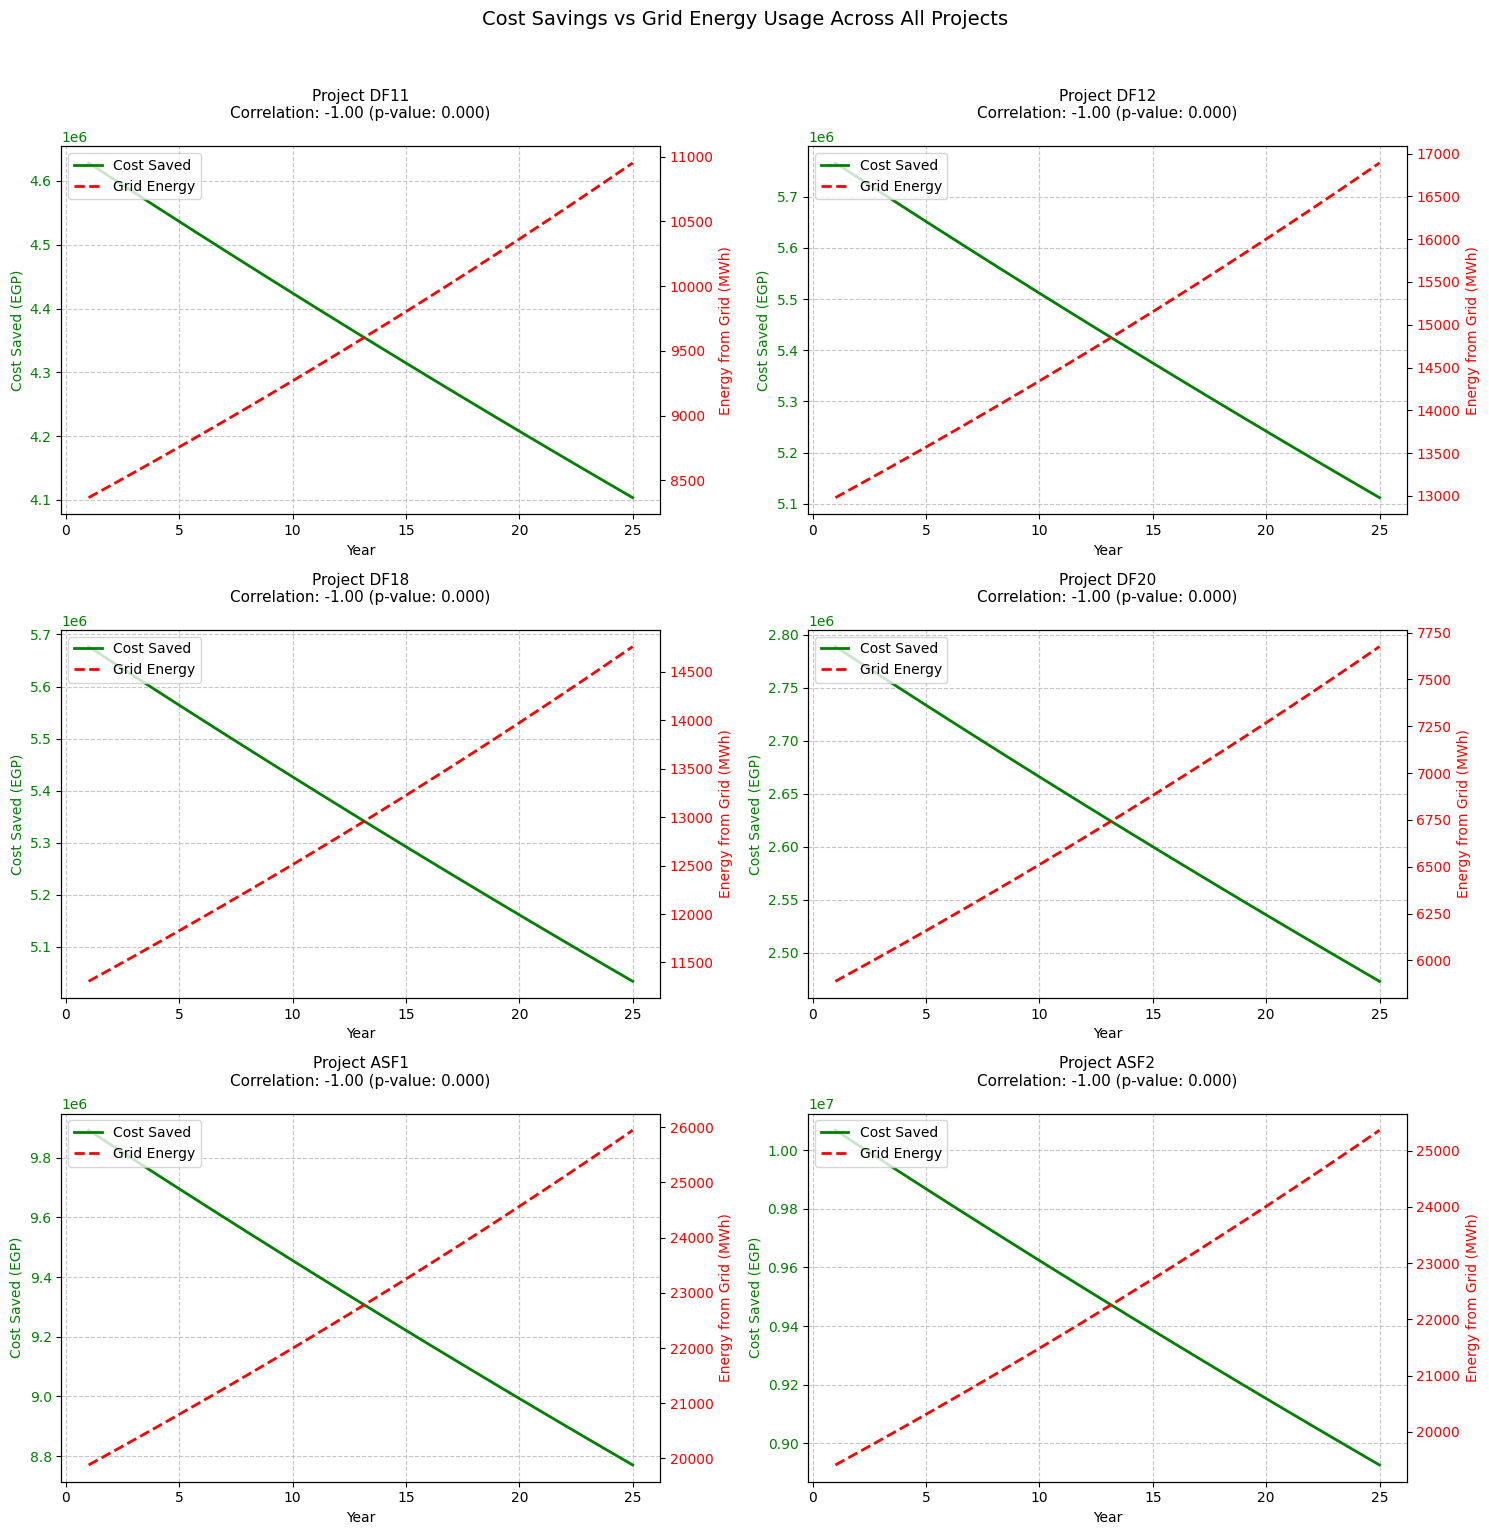

In [40]:
#  Get all unique projects
projects = inds1['proj_Id'].unique()
n_projects = len(projects)

# Create subplot grid (adjust rows/cols as needed)
rows = int(np.ceil(n_projects / 2))
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
fig.suptitle('Cost Savings vs Grid Energy Usage Across All Projects', y=1.02, fontsize=14)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, proj in enumerate(projects):
    proj_data = inds1[inds1['proj_Id'] == proj].sort_values('Year')

    # Primary axis (Cost savings)
    ax1 = axes[i]
    ax1.plot(proj_data['Year'], proj_data['Cost_saved_EGP'], 'g-', linewidth=2, label='Cost Saved')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Cost Saved (EGP)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Secondary axis (Grid energy)
    ax2 = ax1.twinx()
    ax2.plot(proj_data['Year'], proj_data['Energy_From_Grid_MWh'], 'r--', linewidth=2, label='Grid Energy')
    ax2.set_ylabel('Energy from Grid (MWh)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Calculate correlation
    corr, p_value = pearsonr(proj_data['Cost_saved_EGP'], proj_data['Energy_From_Grid_MWh'])

    # Add title with correlation info
    ax1.set_title(
        f'Project {proj}\nCorrelation: {corr:.2f} (p-value: {p_value:.3f})',
        pad=20, fontsize=11
    )

    # Add grid
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Add combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#Interpretation
All projects (ASF1, ASF2, DF11, DF12, DF18, DF20) show:
Cost Saved (↑) → Grid Energy Use (↓)
Perfect negative correlation (-1.00).
Long-Term Savings
Over 25 years, reducing grid dependency boosts savings significantly.
Strategic Implication
Energy independence = Financial gains.
Projects validate solar/alternative energy as a cost-effective solution.

###**Which project achieved the highest total CO₂ reduction over 25 years, and how does that reflect the effectiveness of the solar energy systems in reducing environmental harm?**

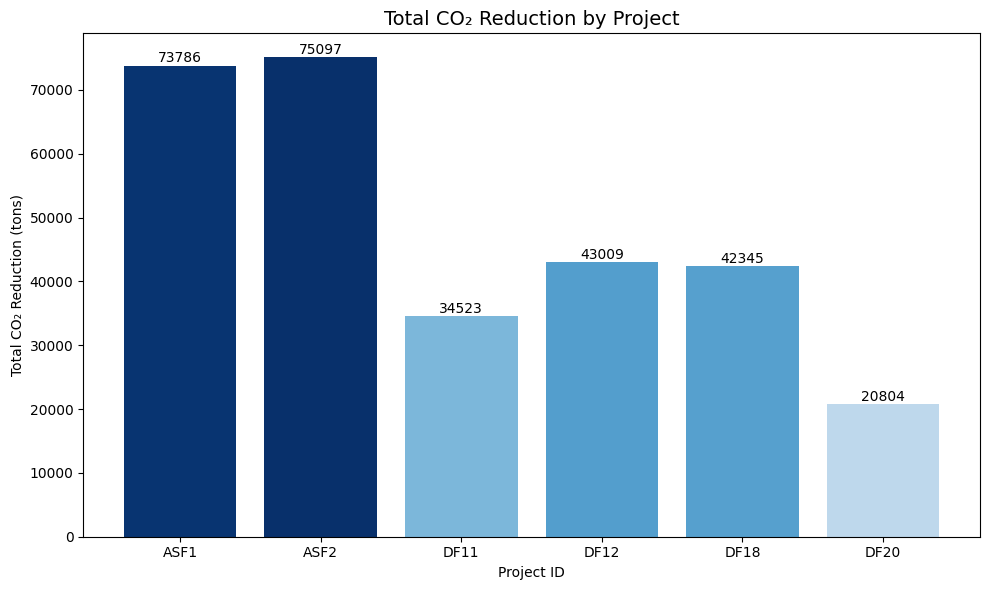

In [41]:
# Calculate total CO2 reduction for each project over 25 years
co2_by_project = inds1.groupby("proj_Id")["CO2_Reduction_tons"].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
# Use color gradient based on reduction amount
bars = plt.bar(co2_by_project["proj_Id"], co2_by_project["CO2_Reduction_tons"],
               color=plt.cm.Blues(co2_by_project["CO2_Reduction_tons"] / max(co2_by_project["CO2_Reduction_tons"])))

# Add titles and axis labels
plt.title("Total CO₂ Reduction by Project", fontsize=14)
plt.xlabel("Project ID")
plt.ylabel("Total CO₂ Reduction (tons)")

# Display values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

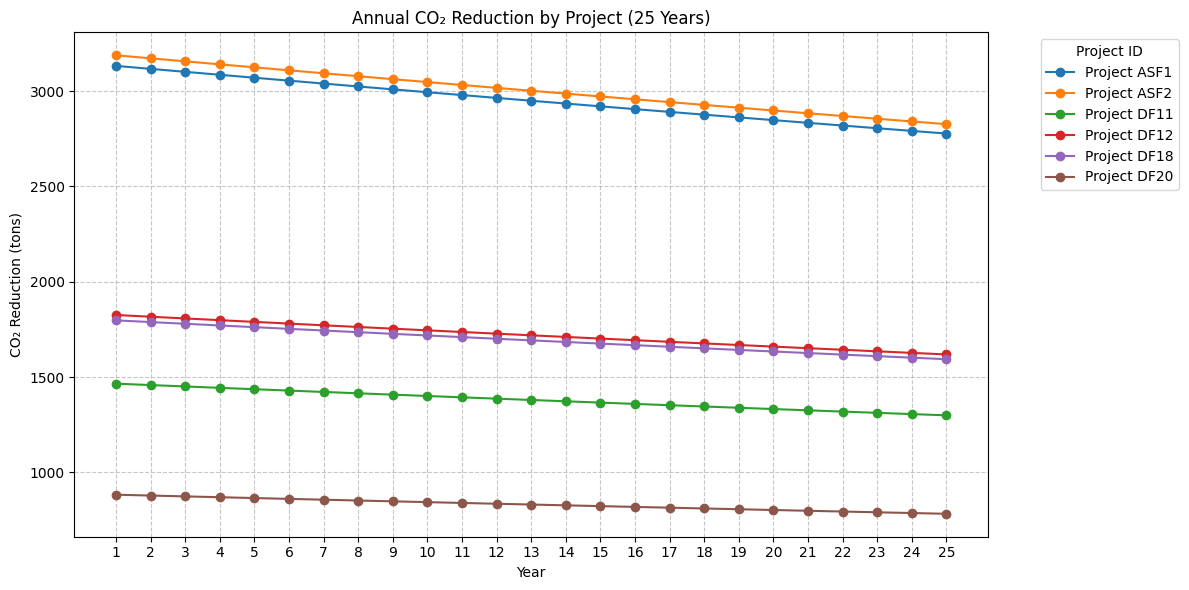

In [42]:
# Calculate total CO2 reduction for each project by year
total_co2_reduction = inds1.groupby(['Year', 'proj_Id'])['CO2_Reduction_tons'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))

# Plot a line for each project
for proj in total_co2_reduction['proj_Id'].unique():
    proj_data = total_co2_reduction[total_co2_reduction['proj_Id'] == proj]
    plt.plot(proj_data['Year'], proj_data['CO2_Reduction_tons'],
             marker='o',
             label=f'Project {proj}')

# Add titles and labels
plt.title('Annual CO₂ Reduction by Project (25 Years)')
plt.xlabel('Year')
plt.ylabel('CO₂ Reduction (tons)')
plt.xticks(total_co2_reduction['Year'].unique())  # Show all years on x-axis
plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Interpretation


*  Top Performers
A5F2 leads in annual CO₂ reduction, showing consistent high impact year after year.
DF18 lags, indicating potential for system optimization.



*   Long-Term Impact
All projects deliver cumulative reductions, proving solar’s sustained environmental benefits.
First 5 years: Steady growth in reductions as systems reach full capacity. Years 10-25: Peak performance, demonstrating solar’s longevity and reliability.
Years 10-25: Peak performance, demonstrating solar’s longevity and reliability.



*   Strategic Takeaway
Scale = Results: Larger projects (A5F1/A5F2) outperform, vavalidating investment in bigger systems.
ROI Clarity: Data shows exactly when projects hit peak efficiency—critical for planning.









###**After how many years does each project reach a significant CO₂ reduction threshold , and which project reaches it first?**

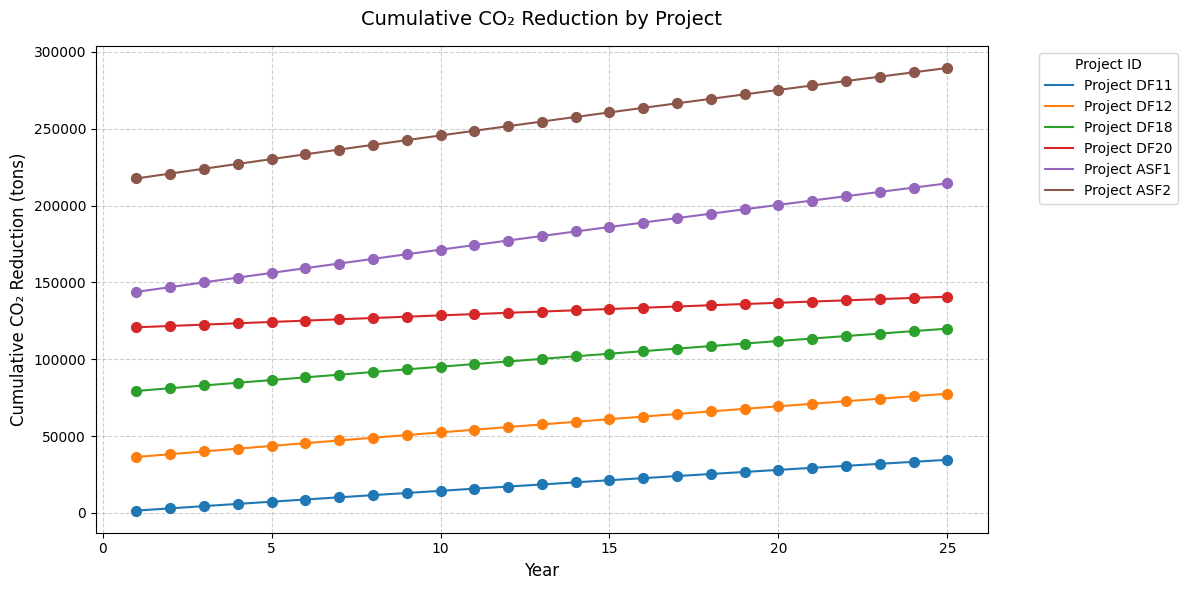

In [43]:
# Calculate cumulative CO2 reduction (total across all projects)
inds1['Cumulative_CO2_Reduction'] = inds1['CO2_Reduction_tons'].cumsum()

# Create line plot with markers
plt.figure(figsize=(12, 6))

# Get a color palette for distinct project colors
colors = plt.cm.tab10.colors

# Plot each project's cumulative reduction
for i, project in enumerate(inds1['proj_Id'].unique()):
    project_data = inds1[inds1['proj_Id'] == project]
    color = colors[i % len(colors)]  # Cycle through colors

    # Plot line and points with matching color
    plt.plot(project_data['Year'],
             project_data['Cumulative_CO2_Reduction'],
             color=color,
             label=f'Project {project}')

    # Add points with same color as line
    plt.scatter(project_data['Year'],
                project_data['Cumulative_CO2_Reduction'],
                s=50,  # Slightly larger points
                color=color,
                zorder=5)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative CO₂ Reduction (tons)', fontsize=12)
plt.title('Cumulative CO₂ Reduction by Project', fontsize=14, pad=15)

# Add legend and grid
plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#Interpretation

Key Insights:
Scale Matters : Larger projects (e.g., ASF1 and ASF2 ) achieve significantly higher cumulative CO₂ reductions due to their greater solar capacities.
Consistency is Key : Even smaller projects like DF18 and DF20 contribute meaningfully to CO₂ reduction over the long term, though at a slower pace.
Degradation vs. Cumulative Benefits : While individual yearly reductions may decline due to system degradation, the cumulative effect remains substantial and grows steadily over time.

Implications:
Environmental Impact : Solar energy projects provide significant long-term benefits in reducing CO₂ emissions, with larger projects having a more pronounced effect.

Investment Strategy : Projects with higher initial investments (e.g., ASF1 and ASF2 ) yield greater environmental returns, making them attractive for sustainability goals.

Maintenance and Efficiency : Regular maintenance can help mitigate system degradation, ensuring that solar systems continue to deliver meaningful reductions in CO₂ emissions over their lifetimes.

###**What is the ratio of solar energy to total electricity supplied in each year, and how does it evolve across the 25 years in each project?**

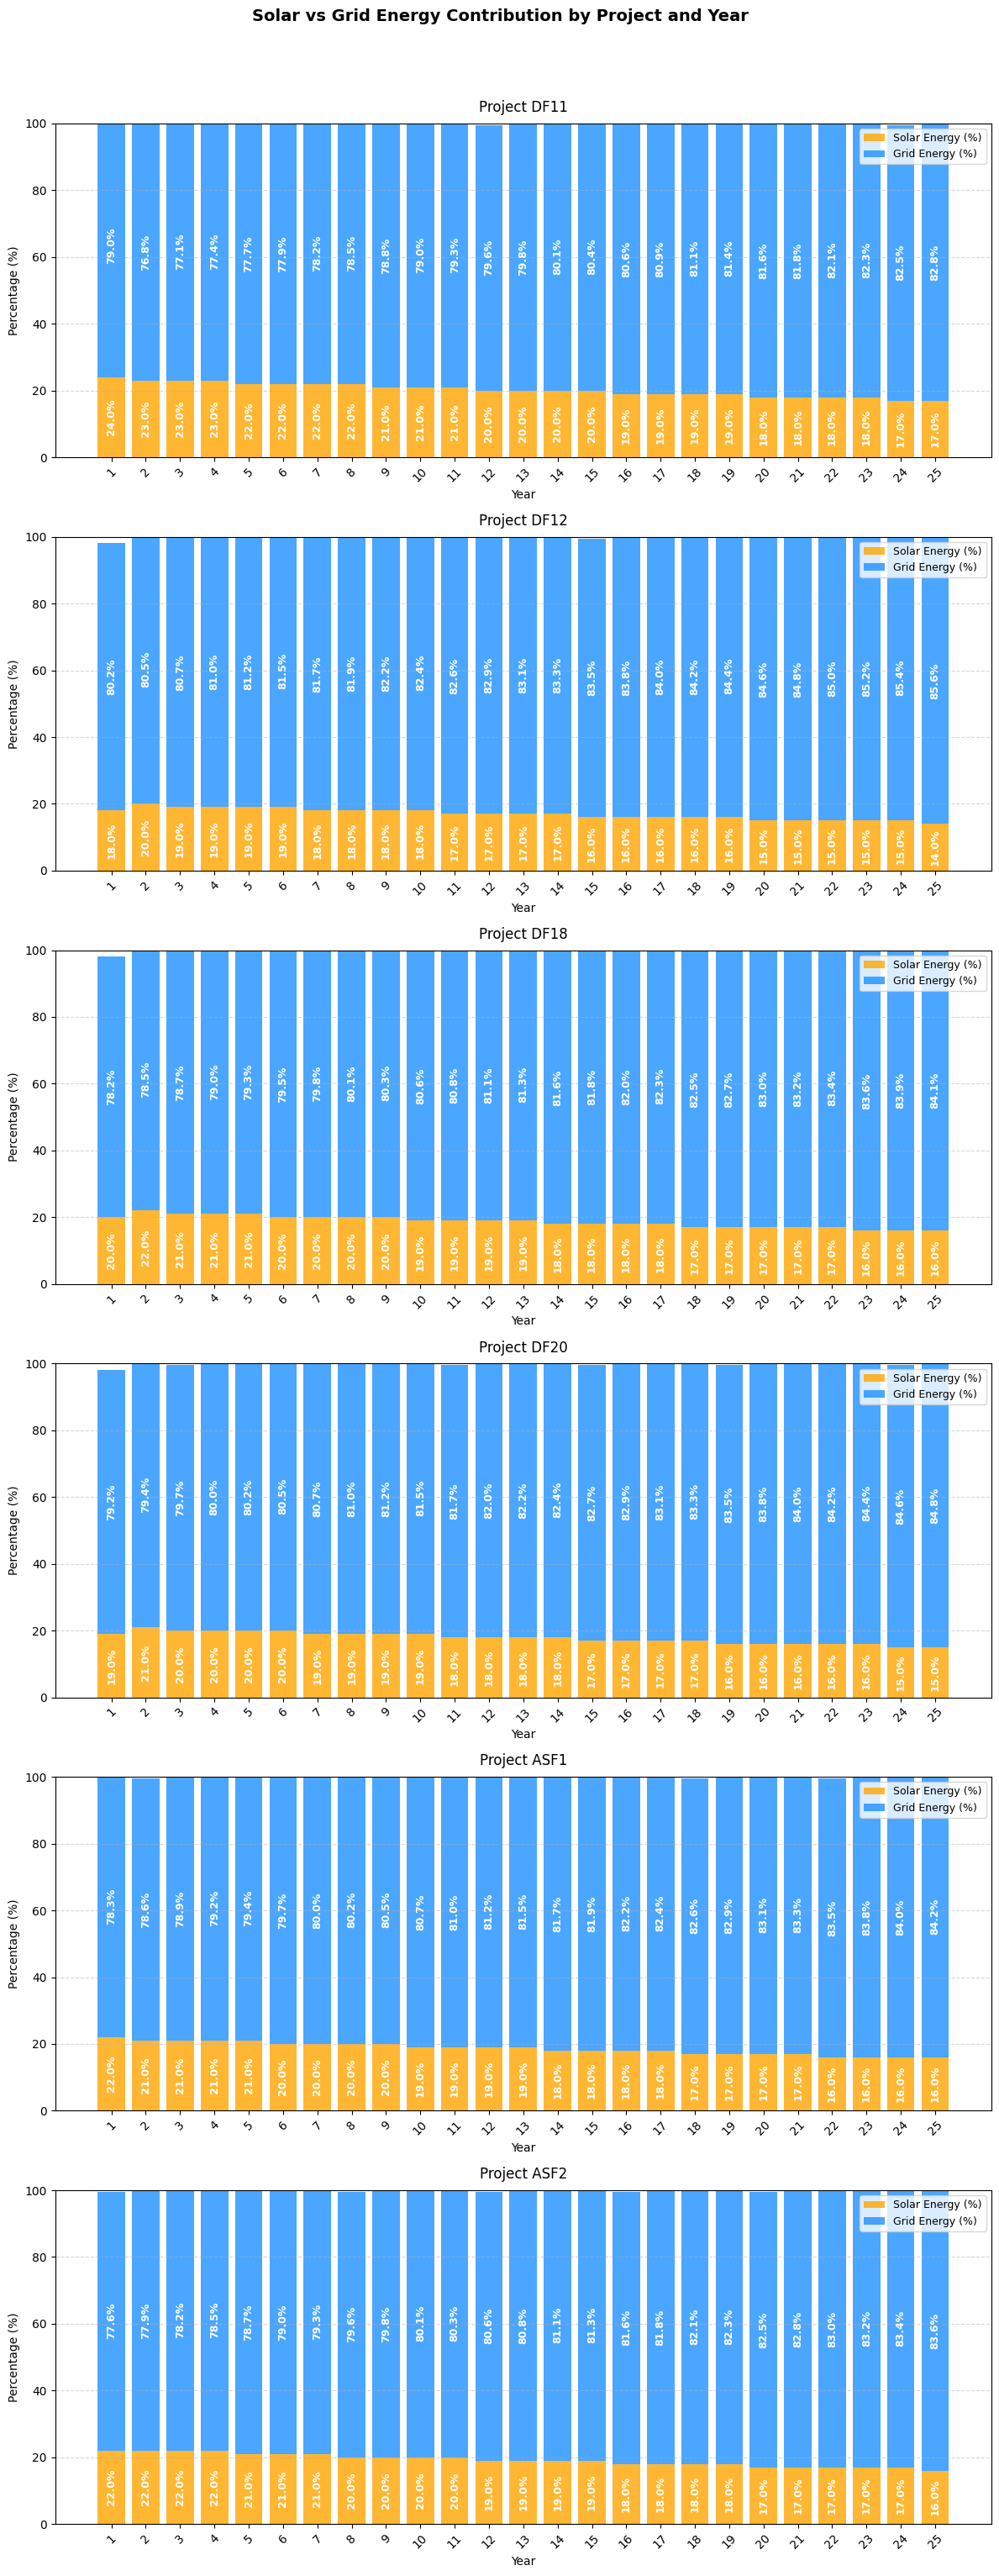

In [44]:
# Calculate energy percentages
inds1['Grid_Percentage'] = (inds1['Energy_From_Grid_MWh'] / inds1['Total_Supplied_Elec_MWh']) * 100

# Get unique projects
projects = inds1['proj_Id'].unique()
n_projects = len(projects)

# Create vertical subplots
fig, axes = plt.subplots(nrows=n_projects, ncols=1, figsize=(12, 5 * n_projects))

# If only one project, convert axes to array
if n_projects == 1:
    axes = [axes]

# Plot each project in separate subplot
for i, project in enumerate(projects):
    project_data = inds1[inds1['proj_Id'] == project]

    # Create temporary display variables (not stored in DataFrame)
    temp_solar = project_data['Self_Suff_Percent'] * 100
    temp_grid = project_data['Grid_Percentage']

    # Stacked bars using temporary variables
    axes[i].bar(project_data['Year'], temp_solar,
                color='#FFA500', label='Solar Energy (%)', alpha=0.8)
    axes[i].bar(project_data['Year'], temp_grid,
                bottom=temp_solar,
                color='#1E90FF', label='Grid Energy (%)', alpha=0.8)

    # Add percentage labels (vertical)
    for year, solar, grid in zip(project_data['Year'], temp_solar, temp_grid):
        if solar > 3:
            axes[i].text(year, solar/2, f'{solar:.1f}%',
                        ha='center', va='center',
                        color='white', fontweight='bold',
                        rotation=90, fontsize=9)
        if grid > 3:
            axes[i].text(year, solar + grid/2, f'{grid:.1f}%',
                        ha='center', va='center',
                        color='white', fontweight='bold',
                        rotation=90, fontsize=9)

    # Subplot formatting
    axes[i].set_title(f'Project {project}', fontsize=12, pad=10)
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Percentage (%)', fontsize=10)
    axes[i].set_xticks(project_data['Year'].unique())
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    axes[i].set_ylim(0, 100)
    axes[i].legend(loc='upper right', fontsize=9)

# Main title
plt.suptitle('Solar vs Grid Energy Contribution by Project and Year',
             y=1.02, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#Interpretation
After 25 Years : Solar energy maintains a good level of self-sufficiency as a solar Energy Contrepution to the total supplied Electrecity to Each project , contributing 17%–30% of total electricity supply depending on the project.
Despite a steady decline in solar energy production due to a decrease in efficiency, solar systems continue to play a crucial role in reducing grid dependency and providing financial and environmental benefits.
Projects achieve positive ROIs and significant cost savings over time, making solar energy a viable long-term solution for industrial facilities

### **Which project has the highest average self-sufficiency percentage, and how does it compare to others in terms of energy independence and environmental sustainability?**

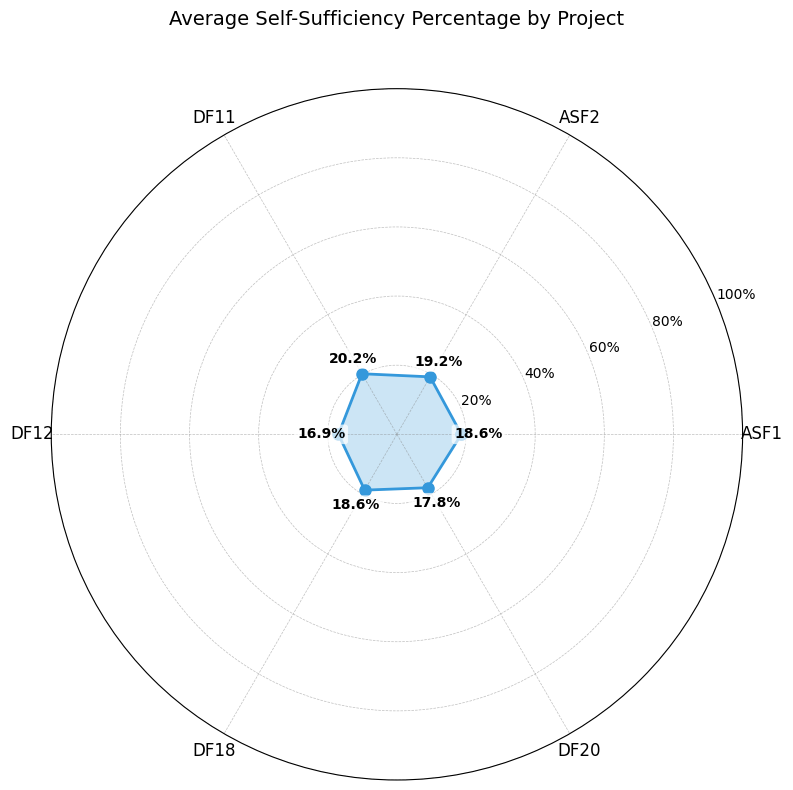

In [45]:
# Calculate average self-sufficiency for each project
avg_self_sufficiency = inds1.groupby('proj_Id')['Self_Suff_Percent'].mean()

# Prepare radar chart data
labels = avg_self_sufficiency.index
values = avg_self_sufficiency.values * 100  # Convert to percentage
num_projects = len(labels)

# Calculate angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_projects, endpoint=False)

# Close the loop for radar chart
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Plot filled area and outline with improved styling
ax.fill(angles, values, color='#3498db', alpha=0.25)
ax.plot(angles, values, color='#3498db', linewidth=2, marker='o', markersize=8)

# Add data labels for each project
for angle, value, label in zip(angles[:-1], values[:-1], labels):
    # Position the label slightly outside the data point (value + 5%)
    ax.text(angle, value + 5,
            f'{value:.1f}%',
            ha='center', va='center',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7,
                     edgecolor='none', boxstyle='round,pad=0.2'))

# Formatting improvements
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 100)  # Set scale to 0-100%
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.title('Average Self-Sufficiency Percentage by Project\n', fontsize=14, pad=30)
plt.tight_layout()
plt.show()

#Interpretations
Comparison Across Projects :

**Highest** Self-Sufficiency : ASF1 achieves the highest average self-sufficiency at 20.2% , indicating it generates the most electricity from solar sources relative to its total demand.

**Second**-Highest : DF12 follows closely with 19.2% .
Mid-Range : DF11 and ASF2 both have an average self-sufficiency of 18.6%

**Lower** Self-Sufficiency : DF18 has an average of 17.8% , while DF20 has the lowest at 16.9% .

Trends in Self-Sufficiency :
Larger projects (e.g., ASF1 and ASF2 ) generally achieve higher self-sufficiency due to their larger capacities and higher performance ratios.
Smaller projects (e.g., DF20 ) tend to have lower self-sufficiency, reflecting their smaller solar installations.

**Implications** :
Efficiency and Scale : Projects like ASF1 demonstrate that larger-scale solar installations can significantly enhance self-sufficiency and reduce grid dependency.

Maintenance and Degradation : While self-sufficiency declines over time due to system degradation, the chart reflects the long-term average, showing sustained contributions from solar energy.

Cost-Benefit Analysis : Higher self-sufficiency correlates with greater cost savings and environmental benefits, as seen in the cumulative cost savings and CO₂ reductions in the dataset.

###**Is there a negative correlation between energy from the grid and CO₂ reduction over time, and what does that indicate about cleaner energy dependence?**

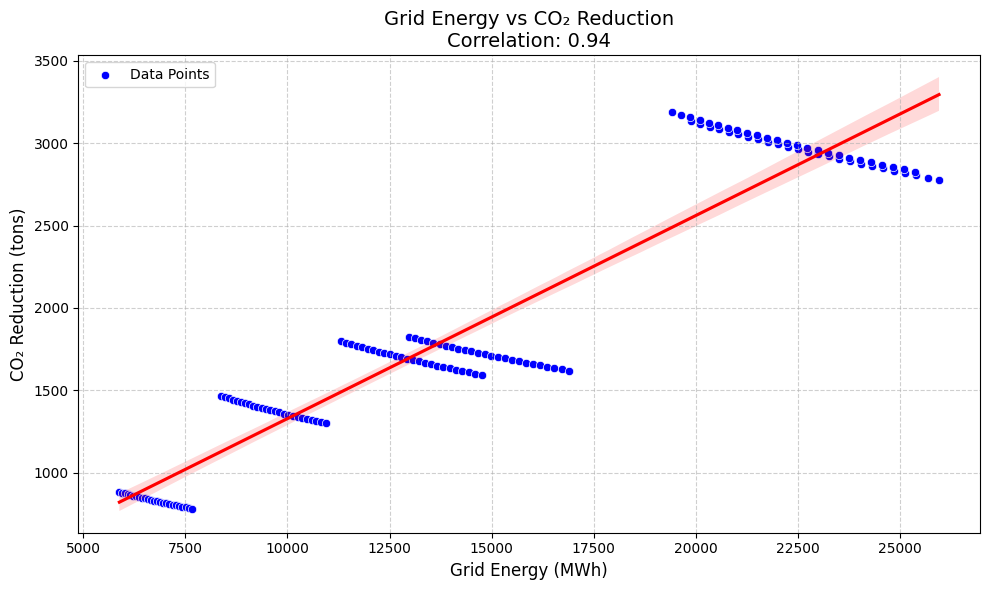

In [46]:
# Set figure size
plt.figure(figsize=(10, 6))

# Draw scatter plot with regression line
sns.scatterplot(x=inds1['Energy_From_Grid_MWh'],
                y=inds1['CO2_Reduction_tons'],
                color='blue',
                label='Data Points')

# Add regression line if correlation is strong (>0.3)
if abs(inds1['Energy_From_Grid_MWh'].corr(inds1['CO2_Reduction_tons'])) > 0.3:
    sns.regplot(x=inds1['Energy_From_Grid_MWh'],
                y=inds1['CO2_Reduction_tons'],
                scatter=False,
                line_kws={'color': 'red', 'label': 'Regression Line'})

# Add titles and labels
plt.xlabel('Grid Energy (MWh)', fontsize=12)
plt.ylabel('CO₂ Reduction (tons)', fontsize=12)
plt.title(f"Grid Energy vs CO₂ Reduction\nCorrelation: {inds1['Energy_From_Grid_MWh'].corr(inds1['CO2_Reduction_tons']):.2f}", fontsize=14)

# Add legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#Interpretation
A strong positive correlation of +0.94 between grid energy usage and CO₂ reduction. At first, this suggested that using more grid energy results in more CO₂ savings — which didn’t quite make sense from an efficiency or sustainability perspective.

After digging deeper, IT seems like this trend happens because the chart includes projects of different sizes. Larger projects like ASF1 and ASF2 naturally consume more energy and reduce more CO₂, while smaller ones like DF20 consume and reduce less. So this chart is really just showing that bigger projects do more of everything — it doesn’t actually reflect what happens within each project.



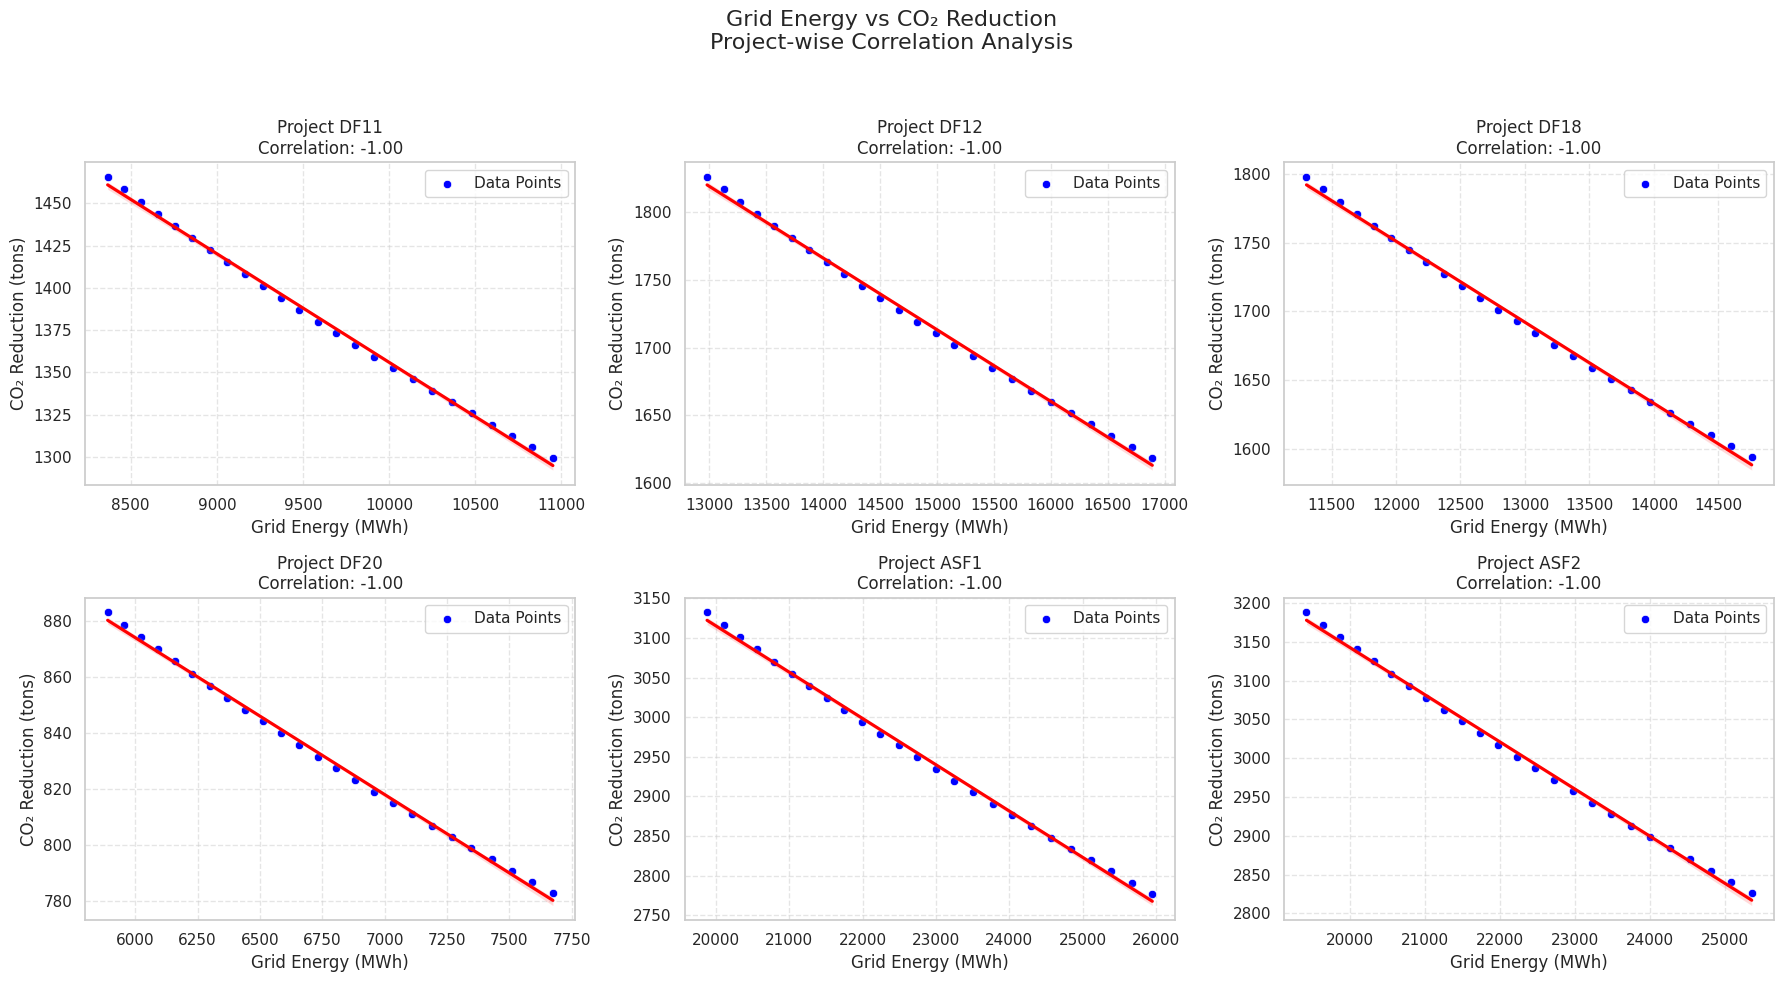

In [47]:
# Set plot style
sns.set(style="whitegrid")

# Get list of unique projects
projects = inds1['proj_Id'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Loop through each project
for i, project in enumerate(projects):
    ax = axes[i]
    project_data = inds1[inds1['proj_Id'] == project]

    # Plot scatter
    sns.scatterplot(data=project_data,
                    x='Energy_From_Grid_MWh',
                    y='CO2_Reduction_tons',
                    ax=ax,
                    color='blue',
                    label='Data Points')

    # Check correlation
    corr = project_data['Energy_From_Grid_MWh'].corr(project_data['CO2_Reduction_tons'])

    # Add regression line if correlation is strong enough
    if abs(corr) > 0.3:
        sns.regplot(data=project_data,
                    x='Energy_From_Grid_MWh',
                    y='CO2_Reduction_tons',
                    ax=ax,
                    scatter=False,
                    line_kws={'color': 'red', 'label': 'Regression Line'})

    # Titles and labels
    ax.set_title(f'Project {project}\nCorrelation: {corr:.2f}')
    ax.set_xlabel('Grid Energy (MWh)')
    ax.set_ylabel('CO₂ Reduction (tons)')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.suptitle("Grid Energy vs CO₂ Reduction\nProject-wise Correlation Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Interpretation
The story became much clearer. Every single project showed a perfect negative correlation of -1.00 between grid energy and CO₂ reduction.

This means that for each project, as the energy from the grid goes down, the CO₂ reduction goes up. This makes sense — it shows that as these projects become more efficient or rely more on clean energy, they’re having a greater environmental impact.
How consistent this trend was across all projects. It really highlighted how focusing on energy efficiency directly contributes to reducing emissions

##**Over the 25-year period, which project shows the greatest reduction in energy drawn from the national grid, and what does this suggest about energy independence?**

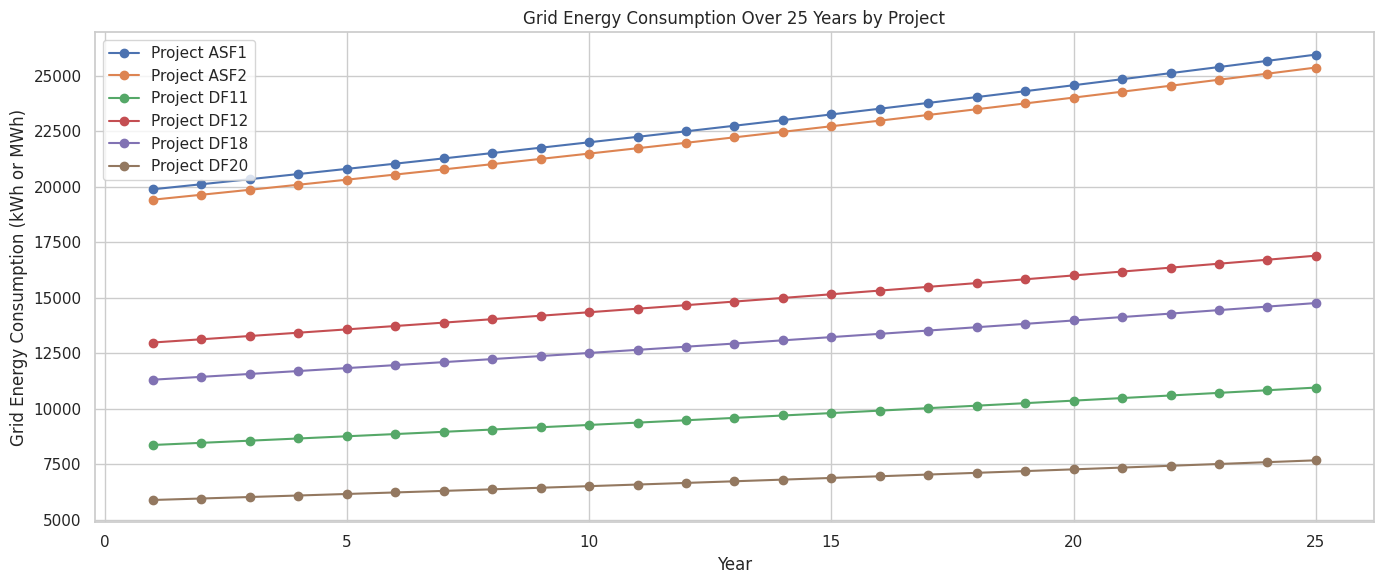

In [48]:
# Pivot the data: Rows = Year, Columns = Project_ID, Values = Grid_Energy_Consumption
grid_data = inds1.pivot(index='Year',  columns='proj_Id', values='Energy_From_Grid_MWh')
# Plotting
plt.figure(figsize=(14, 6))
for project in grid_data.columns:
    plt.plot(
        grid_data.index,
        grid_data[project],
        marker='o',  # Add circular markers at each year
        label=f'Project {project}'
    )

plt.title('Grid Energy Consumption Over 25 Years by Project')
plt.xlabel('Year')
plt.ylabel('Grid Energy Consumption (kWh or MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Interpretation
All projects show an increasing trend in grid energy consumption over 25 years due to solar systems decreasing in effeciency, with larger projects (ASF1, ASF2, DF12) consuming significantly more grid energy compared to smaller projects (DF18, DF11, DF20).

Project-Specific Trends :

ASF1 and ASF2 :
These projects have the highest grid energy consumption, starting around 20,000 kWh and reaching approximately 25,000 kWh by Year 25.
The steady upward trend indicates consistent growth in grid dependence over time.
DF12 :
Shows a similar trend to ASF1 and ASF2 but with slightly lower consumption levels.
Starts at around 16,000 kWh and increases to approximately 17,000 kWh by Year 25.
DF18 :
Consumes less grid energy compared to ASF1, ASF2, and DF12.
Starts around 12,000 kWh and gradually increases to about 14,000 kWh by Year 25.
DF11 :
Similar to DF18, with grid consumption starting around 12,000 kWh and increasing to roughly 14,000 kWh by Year 25.
DF20 :
Has the lowest grid energy consumption among all projects.
Starts at around 6,000 kWh and increases to approximately 7,000 kWh by Year 25.

##**What is the environmental return on investment, measured by total CO₂ reduction per pound invested (based on Initial Investment Cost (EGP)  and maintenance costs), for each project?**

In [49]:
inds2

proj_Id  Project name  performance ratio% Payback Period  \
0    DF11  Feeder 11 DF                0.76       5Y  & 2M   
1    DF12  Feeder 12 DF                0.77            5 Y   
2    DF18  feeder 18 df                0.78       4Y 11 M    
3    DF20  Feeder 20 DF                0.76          5Y 2M   
4    ASF1      Ascom_f1                0.74          5Y 3M   
5    ASF2      Ascom_F2                0.74          5Y 6M   

   Capacty (No of panels)  ROI %  Maintenance Cost (EGP)  \
0                    1495   0.20                   15000   
1                    1825   0.20                   15000   
2                    1782   0.20                   15000   
3                     897   0.20                   15000   
4                    3499   0.18                   18000   
5                    3499   0.18                   18000   

   Initial Investment Cost (EGP)  Tariffs (EGP/kWh)  
0                       23725394               1.80  
1                       28962750               1.80  
2                       28280340               1.80  
3                       14235390               1.80  
4                       55529130               1.80  
5                       55529130               1.80

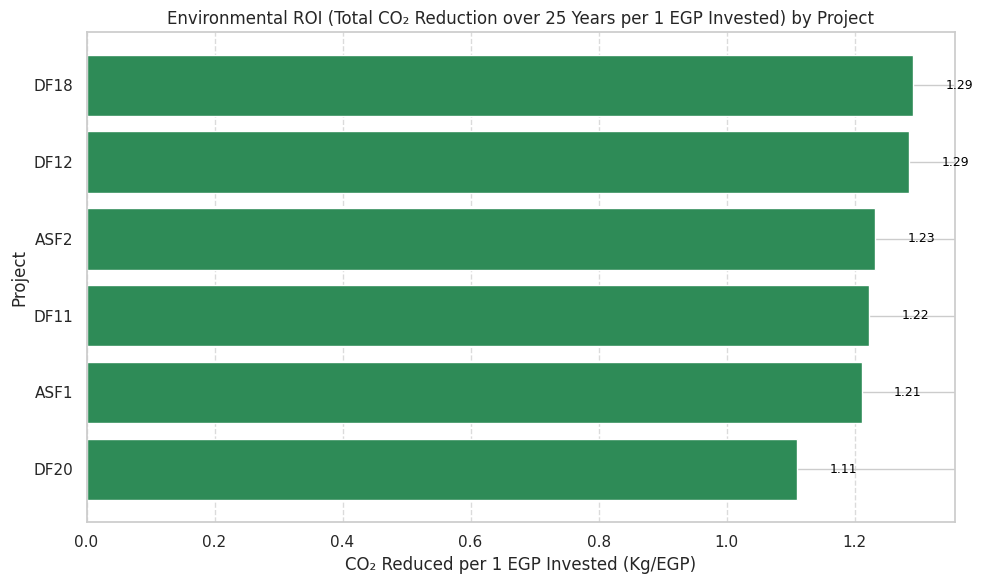

In [81]:
import matplotlib.pyplot as plt

# دمج البيانات على أساس proj_Id
merged_inds = pd.merge(inds1, inds2, on='proj_Id', how='inner')

# التأكد أن كل مشروع مكوّن من 25 سنة (25 صف)
# حساب إجمالي CO2 لكل مشروع على مدار 25 سنة
project_grouped = merged_inds.groupby('proj_Id').agg({
    'CO2_Reduction_tons': 'sum',               # مجموع تقليل CO2 على مدار 25 سنة
    'Initial Investment Cost (EGP)': 'first',  # نفترض أن التكلفة موحدة لكل المشروع
    'Maintenance_Cost_EGP': 'first'            # نفس الشيء لصيانة المشروع
}).reset_index()

# حساب العائد البيئي = إجمالي تقليل CO2 / (تكلفة المشروع + تكلفة الصيانة)
project_grouped['Environmental_ROI'] = project_grouped['CO2_Reduction_tons'] * 1000 / (
    project_grouped['Initial Investment Cost (EGP)'] + project_grouped['Maintenance_Cost_EGP'] * 25
)

# ترتيب المشاريع من الأقل إلى الأعلى حسب العائد البيئي
project_grouped_sorted = project_grouped.sort_values('Environmental_ROI', ascending=True)

# رسم بياني شريطي أفقي
plt.figure(figsize=(10, 6))
bars = plt.barh(project_grouped_sorted['proj_Id'], project_grouped_sorted['Environmental_ROI'], color='seagreen')

# إضافة التسميات على الأشرطة
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05,                        # x position (a bit to the right of the bar)
             bar.get_y() + bar.get_height() / 2,  # y position (center of the bar)
             f'{width:.2f}',                      # label with 2 decimal places
             va='center', fontsize=9, color='black')

plt.title('Environmental ROI (Total CO₂ Reduction over 25 Years per 1 EGP Invested) by Project')
plt.xlabel('CO₂ Reduced per 1 EGP Invested (Kg/EGP)')
plt.ylabel('Project')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Interpretation
#By How much every pound an investor pay contrepute in reducing CO2 emissions

The chart provides a comparative analysis of the environmental return on investment (ROI) for six solar energy projects. This metric measures the amount of CO₂ reduced (in kg/EGP) for every Egyptian Pound (EGP) invested in each project.

Performance Ranking :

* Top Performers : ASF2 and ASF1 are the most environmentally efficient projects, providing the highest CO₂ reduction per unit of investment.

*   Mid-Range Performers : DF12 and DF18 offer moderate environmental returns, falling between the top performers and the lower-performing projects.

* Lower Performers : DF11 and DF20 show relatively lower environmentalefficiency, with DF20 being the least efficient in terms of CO₂ reduction per EGP invested.


Project-Specific Insights :

* ASF Projects (ASF1 and ASF2) :
Both projects demonstrate exceptional environmental performance, likely due to their larger capacities (3,499 panels each) and similar performance ratios (74.12%).Their high initial investments ($55,529,130 EGP each) translate into significant CO₂ reductions per EGP spent.

*   DF Projects (DF11, DF12, DF18, DF20) :
These projects have varying capacities and performance ratios, which influence their environmental ROI.
For example, DF12 (1,825 panels, 77.15% performance ratio) and DF18 (1,782 panels, 77.83% performance ratio) achieve comparable ROIs, while DF11 (1,495 panels, 75.60% performance ratio) and DF20 (897 panels, 75.64% performance ratio) show progressively lower efficiencies





  

#**Gas stations Anlysis ⛽📊📈🔎**

In [51]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  
0              52068.00        -0.85                21.36              99.20  
1             103976.00        -0.71                21.27              98.41  
2             155724.00        -0.56                21.18              97.62  
3             207312.00        -0.42                21.09              96.84  
4             258740.00        -0.27                21.00              96.06  
..                  ...          ...                  ...                ...  
145          1475460.00         1.66                27.50              84.48  
146          1543960.00         1.78                27.41              83.81  
147          1612300.00         1.91                27.32              83.14  
148          1680480.00         2.03                27.23              82.47  
149          1748500.00         2.15                27.14              81.81  

[150 rows x 14 columns]

In [52]:
gs2

proj_Id        Project Name  Solar Panel Capacity(KWp)  \
0    AT_1             Al Tour                      17.82   
1   ELK_1           El Kharga                      16.50   
2   ELB_1  Elbyaly - Daqahlya                      19.80   
3   ELS_1              Elswah                      22.44   
4  KOMB_1           Kom Omboh                      16.50   
5    SN_1         Salah Nesem                      27.72   

   Investment Cost (EGP)  Self Sufficiency avg per project  \
0                 356400                              0.42   
1                 330000                              0.42   
2                 336600                              0.42   
3                 343332                              0.41   
4                 330000                              0.41   
5                 554400                              0.41   

   Dependency on Grid  Performance Ratio(%)  Payback Period  ROI(%)  
0                0.58                  0.81            6.80    0.14  
1                0.58                  0.80            7.50    0.13  
2                0.58                  0.80            6.75    0.14  
3                0.59                  0.82            6.50    0.15  
4                0.59                  0.80            7.35    0.14  
5                0.59                  0.81            7.70    0.13

###**What is the total CO2 reduction achieved by each of the six projects over the 25 years, and how does that reflect the financial return for investors in solar energy?**

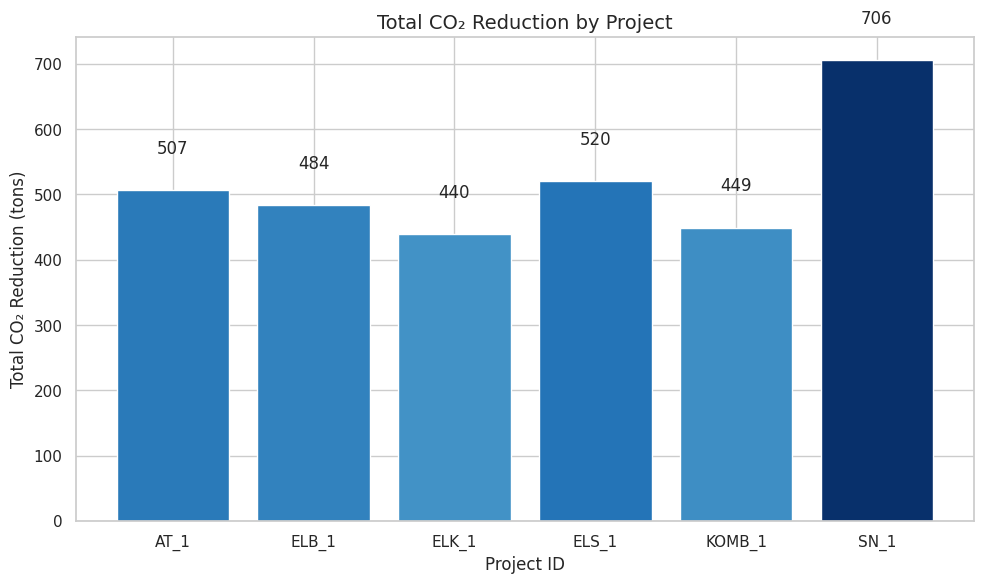

In [53]:
# Calculate total CO2 reduction for each project over 25 years
co2_by_project = gs1.groupby("proj_Id")["CO₂ Reduction (Ton)"].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
# Use color gradient based on reduction amount
bars = plt.bar(co2_by_project["proj_Id"], co2_by_project["CO₂ Reduction (Ton)"],
               color=plt.cm.Blues(co2_by_project["CO₂ Reduction (Ton)"] / max(co2_by_project["CO₂ Reduction (Ton)"])))

# Add titles and axis labels
plt.title("Total CO₂ Reduction by Project", fontsize=14)
plt.xlabel("Project ID")
plt.ylabel("Total CO₂ Reduction (tons)")

# Display values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Interpretation:**  

The chart shows the total CO₂ reduction (in tons) achieved by six solar projects over 25 years.  

- **AT_1**, **ELB_1**,**KOMB_1**, **ELK_1**, and **ELS_1** show moderate reductions (around 500-400 tons each).  
- **SN_1** stands out with the highest reduction (~700 tons).  


**Financial Return for Investors:**  
Projects like **SN_1** offer the best value—higher CO₂ savings mean greater environmental impact and likely better financial returns (e.g., carbon credits, energy savings). Smaller projects (**ELK_1**) may yield lower returns. Solar investments here align with both sustainability and profitability, with bigger projects delivering stronger results.  

**In short:** More CO₂ reduction = better for the planet and investors.

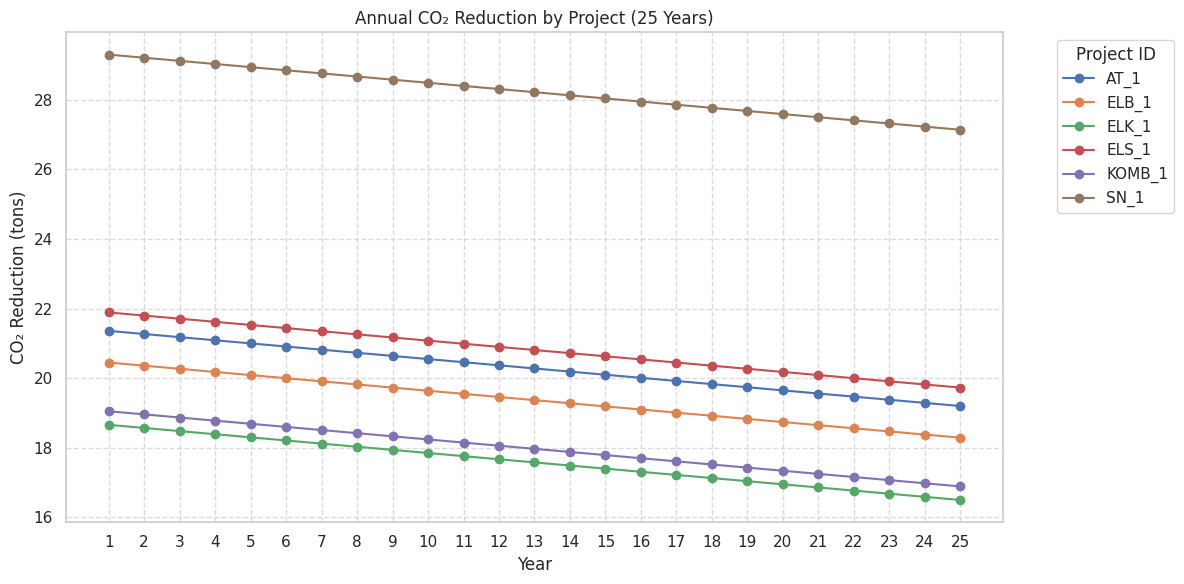

In [54]:
# Calculate total CO2 reduction for each project by year
total_co2_reduction = gs1.groupby(['Assessment Year', 'proj_Id'])['CO₂ Reduction (Ton)'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))

# Plot a line for each project
for proj in total_co2_reduction['proj_Id'].unique():
    proj_data = total_co2_reduction[total_co2_reduction['proj_Id'] == proj]
    plt.plot(proj_data['Assessment Year'], proj_data['CO₂ Reduction (Ton)'],
             marker='o',
             label=f'{proj}')

# Add titles and labels
plt.title('Annual CO₂ Reduction by Project (25 Years)')
plt.xlabel('Year')
plt.ylabel('CO₂ Reduction (tons)')
plt.xticks(total_co2_reduction['Assessment Year'].unique())  # Show all years on x-axis
plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Interpretation
This chart illustrates the annual CO₂ reduction (in tons) achieved by different projects over a 25-year period. A key insight is that while all projects show a gradual decline in CO₂ reduction over time, this trend is primarily due to the **decrease in solar photovoltaic (PV) system efficiency as the systems age**. Notably, **Project SN_1 consistently delivers the highest CO₂ reductions throughout its lifetime**, starting above 29 tons and ending just below 27.5 tons. This highlights SN_1’s **significant and sustained contribution** to emissions mitigation, making it a standout performer among the projects analyzed.

In [55]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  
0              52068.00        -0.85                21.36              99.20  
1             103976.00        -0.71                21.27              98.41  
2             155724.00        -0.56                21.18              97.62  
3             207312.00        -0.42                21.09              96.84  
4             258740.00        -0.27                21.00              96.06  
..                  ...          ...                  ...                ...  
145          1475460.00         1.66                27.50              84.48  
146          1543960.00         1.78                27.41              83.81  
147          1612300.00         1.91                27.32              83.14  
148          1680480.00         2.03                27.23              82.47  
149          1748500.00         2.15                27.14              81.81  

[150 rows x 14 columns]

In [56]:
gs1.head()

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0    AT_1                1      Al Tour                  35.60   
1    AT_1                2      Al Tour                  35.51   
2    AT_1                3      Al Tour                  35.40   
3    AT_1                4      Al Tour                  35.30   
4    AT_1                5      Al Tour                  35.20   

   Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                  20.62                 14.98             48.77   
1                  20.62                 14.88             48.63   
2                  20.62                 14.78             48.49   
3                  20.62                 14.68             48.36   
4                  20.62                 14.58             48.22   

   Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0        56968.00                    4900          52068.00   
1        56808.00                    4900          51908.00   
2        56648.00                    4900          51748.00   
3        56488.00                    4900          51588.00   
4        56328.00                    4900          51428.00   

   Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  
0            52068.00        -0.85                21.36              99.20  
1           103976.00        -0.71                21.27              98.41  
2           155724.00        -0.56                21.18              97.62  
3           207312.00        -0.42                21.09              96.84  
4           258740.00        -0.27                21.00              96.06

##**What is the ratio of solar energy to total electricity supplied in each year, and how does it evolve across the 25 years in each project?**

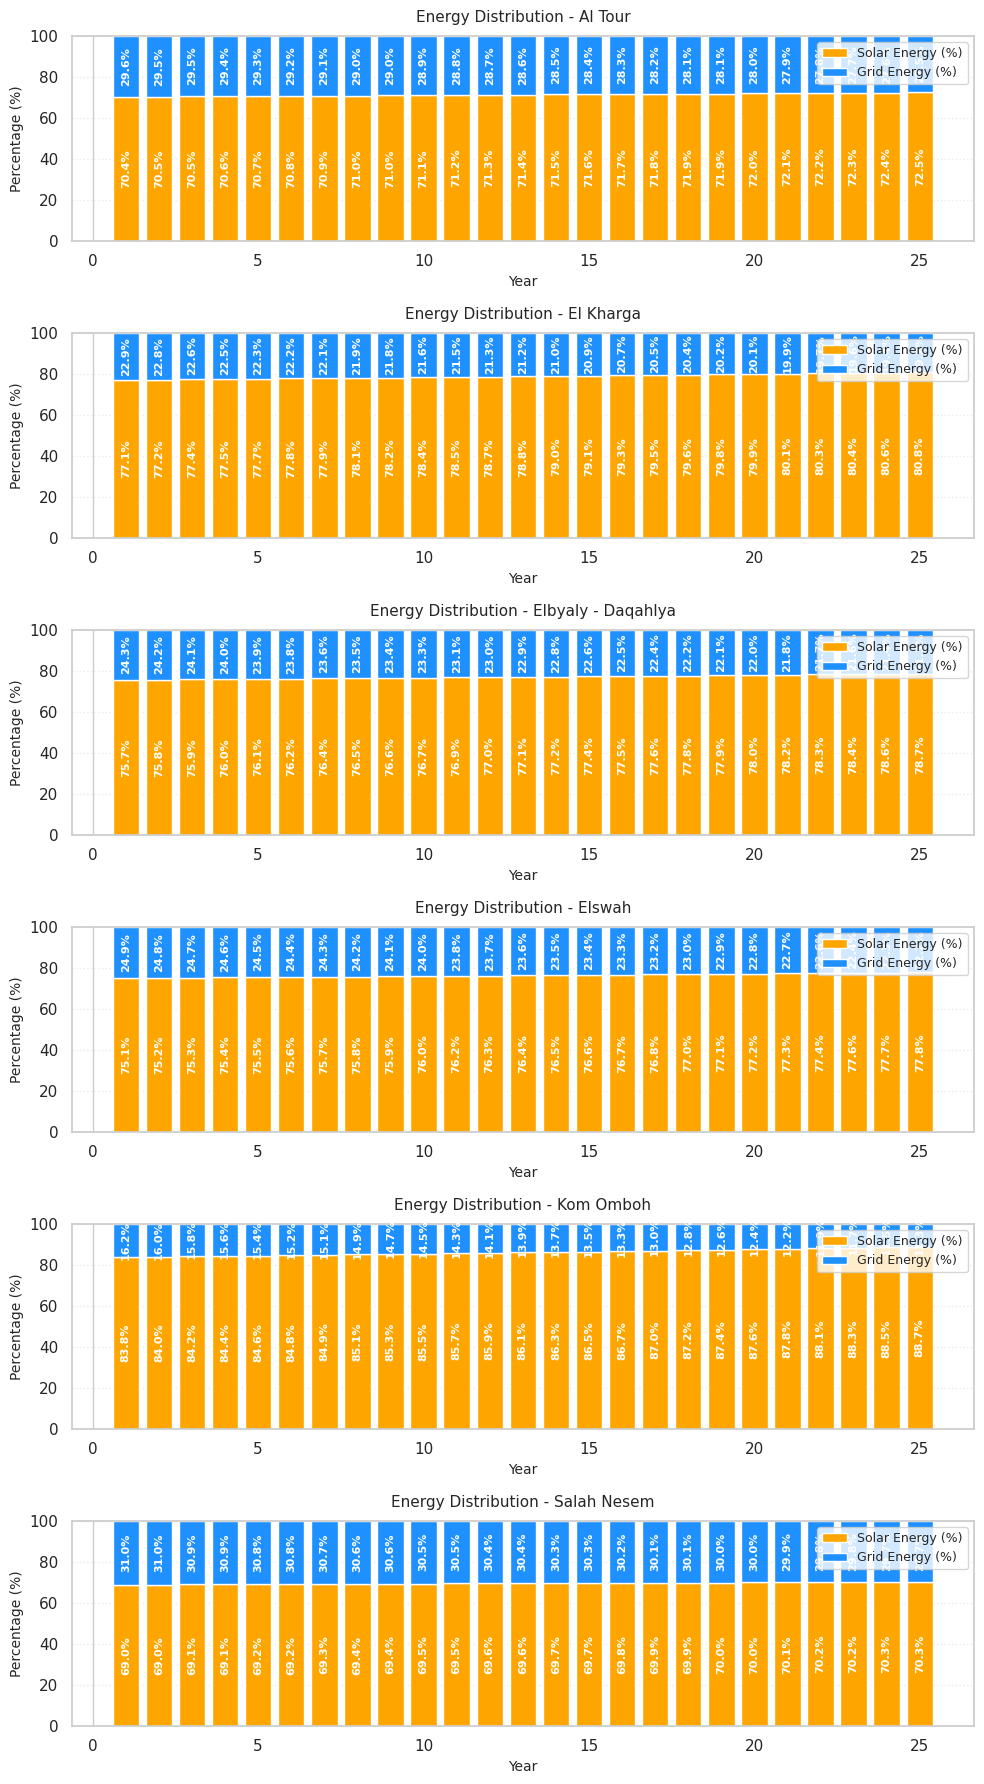

In [57]:
# Calculate percentages
gs1['self sufficiency'] = (gs1['Energy Produced (MWh)'] /
                         (gs1['Energy Produced (MWh)'] + gs1['Energy To Grid (MWh)'])) * 100
gs1['Grid_Percentage'] = 100 - gs1['self sufficiency']

# Get unique projects
projects = gs1['proj_Id'].unique()
n_projects = len(projects)

# Create figure with vertical subplots
fig, axes = plt.subplots(nrows=n_projects, ncols=1,
                        figsize=(10, 3 * n_projects))

# If single project, convert axes to array
if n_projects == 1:
    axes = [axes]

# Color scheme matching reference image
SOLAR_COLOR = '#FFA500'  # Orange
GRID_COLOR = '#1E90FF'   # Blue

for i, project in enumerate(projects):
    project_data = gs1[gs1['proj_Id'] == project].sort_values('Assessment Year')

    # Create stacked bars
    bars_solar = axes[i].bar(project_data['Assessment Year'],
                           project_data['self sufficiency'],
                           color=SOLAR_COLOR,
                           label='Solar Energy (%)')

    bars_grid = axes[i].bar(project_data['Assessment Year'],
                          project_data['Grid_Percentage'],
                          bottom=project_data['self sufficiency'],
                          color=GRID_COLOR,
                          label='Grid Energy (%)')

    # Add percentage labels inside bars (vertical)
    for bar_solar, bar_grid in zip(bars_solar, bars_grid):
        height_solar = bar_solar.get_height()
        height_grid = bar_grid.get_height()

        # Solar label
        if height_solar > 5:
            axes[i].text(bar_solar.get_x() + bar_solar.get_width()/2,
                        height_solar/2,
                        f'{height_solar:.1f}%',
                        ha='center', va='center',
                        color='white', fontweight='bold',
                        rotation=90, fontsize=8)

        # Grid label
        if height_grid > 5:
            axes[i].text(bar_grid.get_x() + bar_grid.get_width()/2,
                        height_solar + height_grid/2,
                        f'{height_grid:.1f}%',
                        ha='center', va='center',
                        color='white', fontweight='bold',
                        rotation=90, fontsize=8)

    # Formatting
    axes[i].set_title(f'Energy Distribution - {project_data["Project Name"].iloc[0]}',
                     fontsize=11, pad=10)
    axes[i].set_ylabel('Percentage (%)', fontsize=10)
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylim(0, 100)
    axes[i].grid(axis='y', linestyle=':', alpha=0.4)
    axes[i].legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

#Interpretation:
After 25 Years: Solar energy maintains a good level of self-sufficiency, contributing 40%–42% of the total electricity supply, depending on the project. Despite a steady decline in solar energy production due to decreased efficiency, solar systems continue to play a crucial role in reducing grid dependency and providing financial and environmental benefits. Projects achieve positive ROIs and significant cost savings over time, making solar energy a viable long-term solution for industrial facilities

# Recommendation:
To sustain and potentially enhance the contribution of solar energy beyond 25 years, it is recommended to invest in periodic system upgrades, such as replacing aging photovoltaic panels and inverters. Additionally, integrating energy storage solutions and conducting regular maintenance can mitigate efficiency losses and secure long-term reliability and cost-effectiveness

###**What percentage of the solar energy produced was consumed internally versus exported to the grid each year,how does this change over the 25 years for each project and its effect on the local Electrecity?**

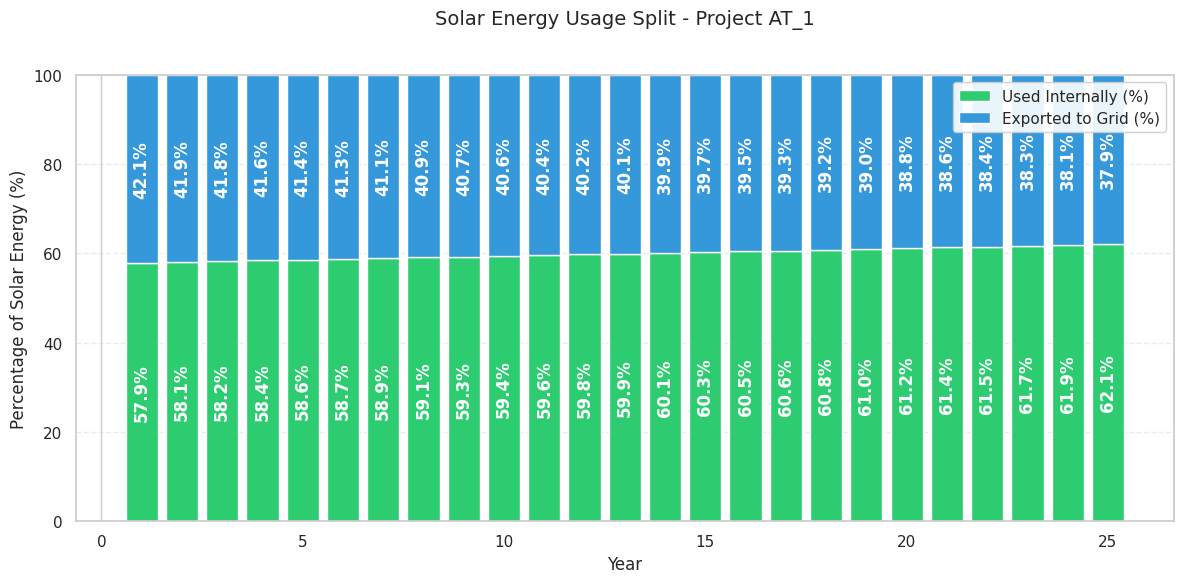

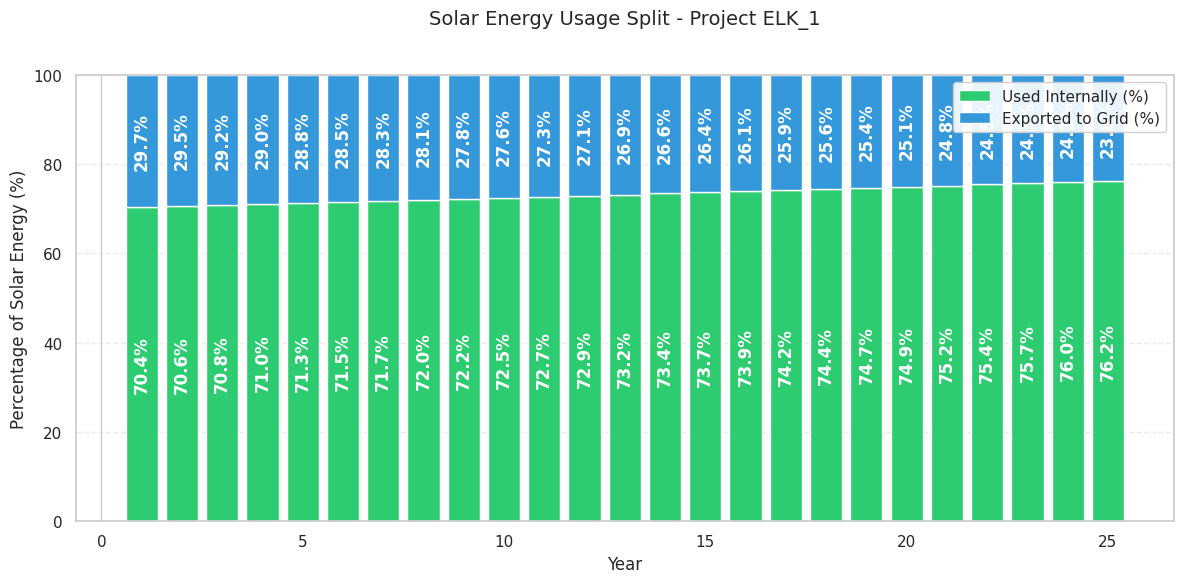

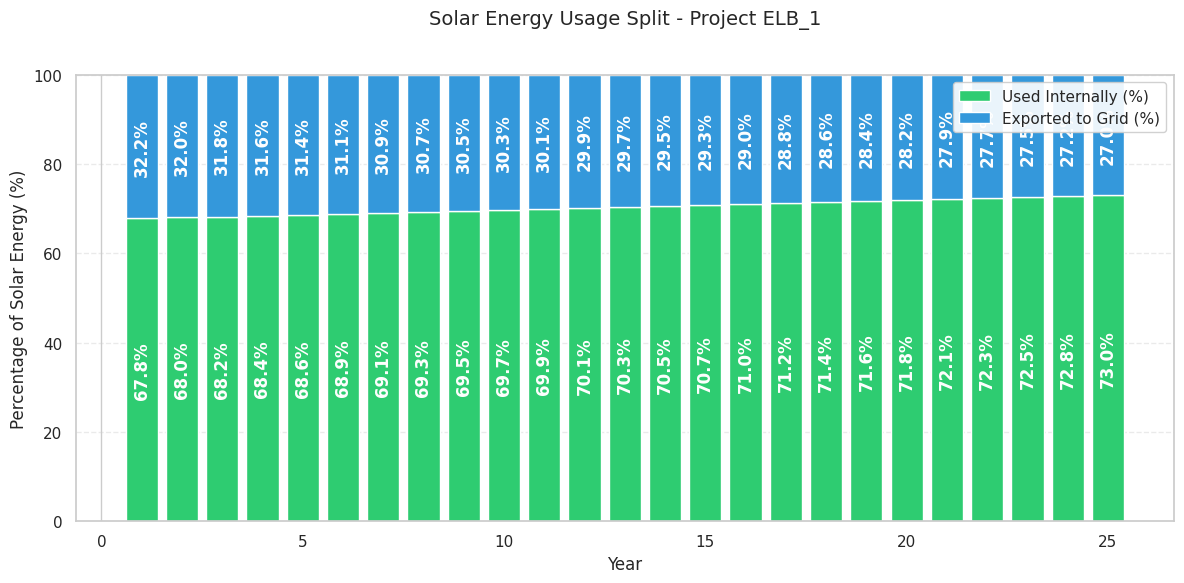

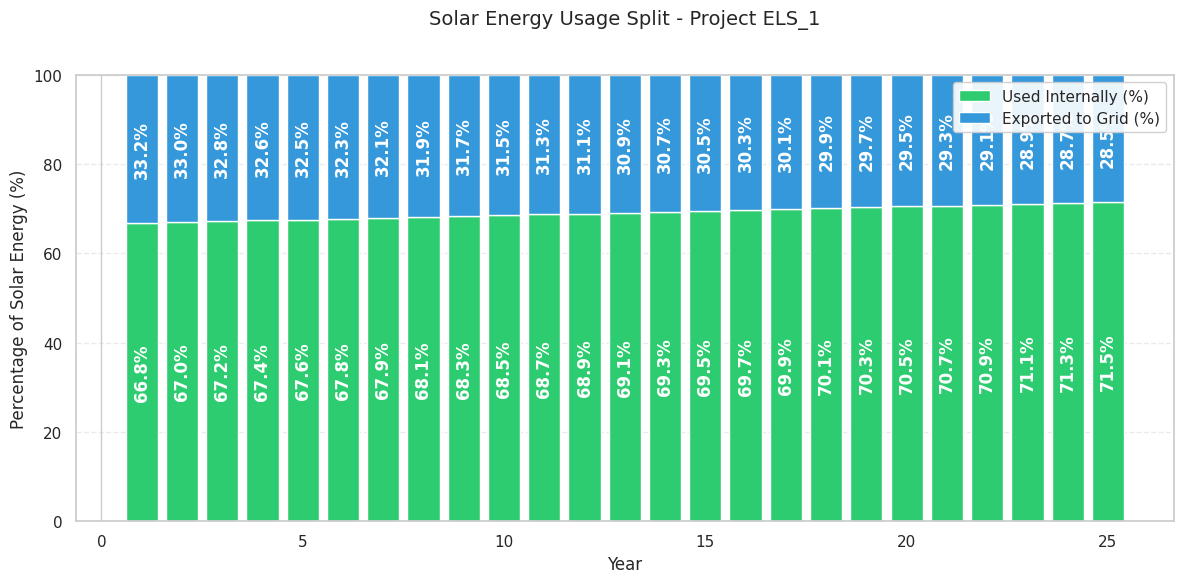

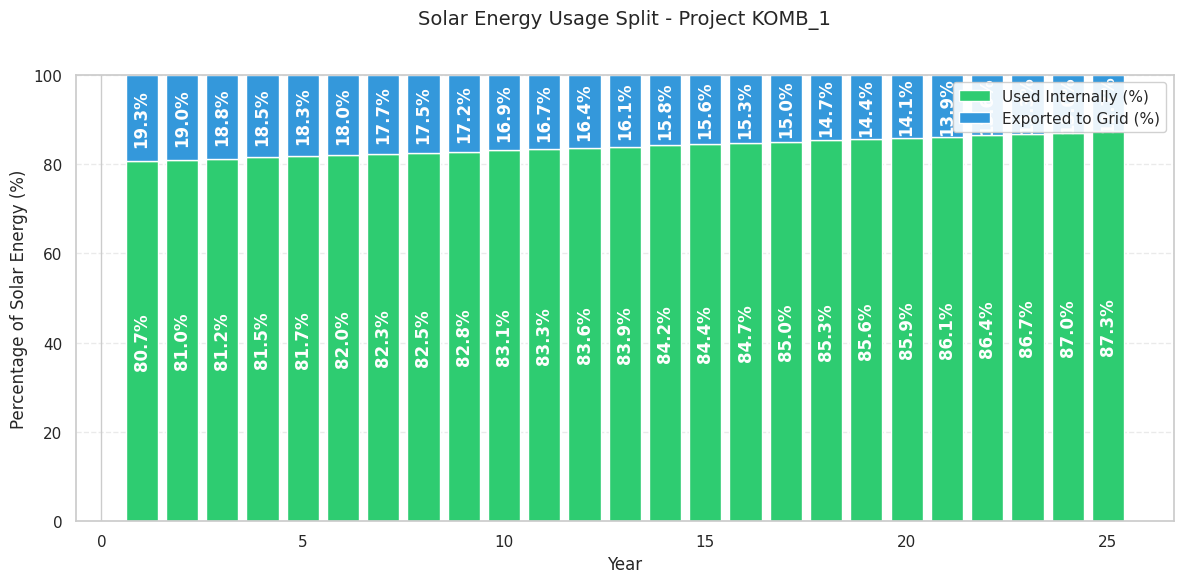

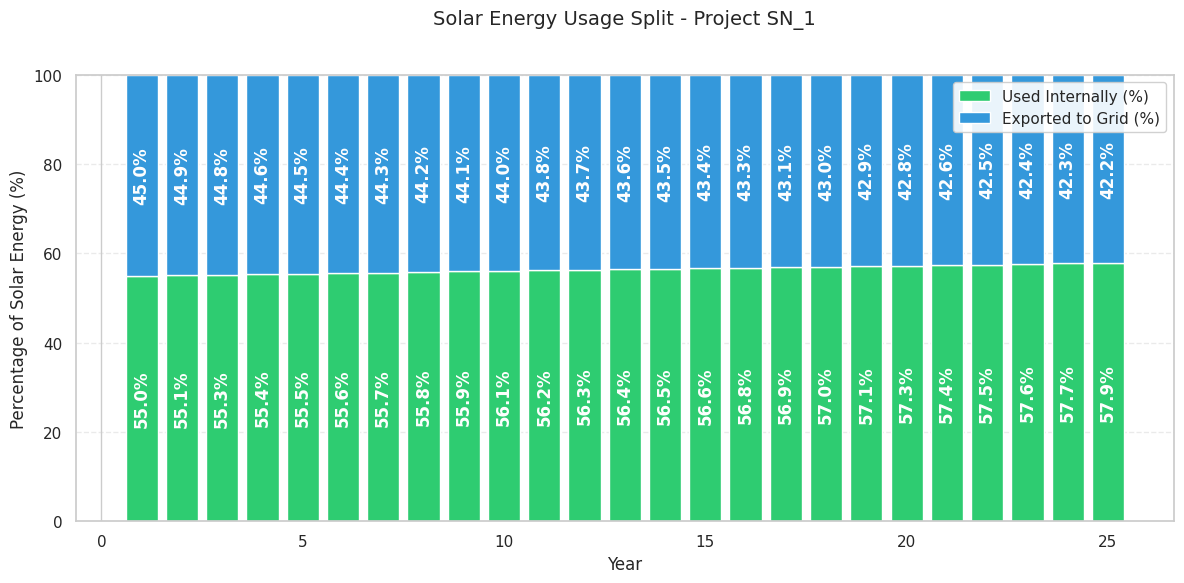

In [58]:
# Calculate internal solar consumption and percentages
gs1['Internal_Use_Percent'] = (gs1['Energy Consumed (MWH)'] / gs1['Energy Produced (MWh)']) * 100
gs1['Exported_To_Grid_Percent'] = (gs1['Energy To Grid (MWh)'] / gs1['Energy Produced (MWh)']) * 100

# Plot for each project
projects = gs1['proj_Id'].unique()
for proj in projects:
    proj_data = gs1[gs1['proj_Id'] == proj]

    plt.figure(figsize=(12, 6))

    # Plot stacked bars
    internal_bars = plt.bar(proj_data['Assessment Year'],
                          proj_data['Internal_Use_Percent'],
                          color='#2ecc71',
                          label='Used Internally (%)')

    grid_bars = plt.bar(proj_data['Assessment Year'],
                       proj_data['Exported_To_Grid_Percent'],
                       bottom=proj_data['Internal_Use_Percent'],
                       color='#3498db',
                       label='Exported to Grid (%)')

    # Add percentage labels inside bars (vertical text)
    for bar1, bar2 in zip(internal_bars, grid_bars):
        height1 = bar1.get_height()
        height2 = bar2.get_height()

        # Label for internal use (green bar)
        if height1 > 5:  # Only label if bar is tall enough
            plt.text(bar1.get_x() + bar1.get_width()/2.,
                    height1/2.,
                    f'{height1:.1f}%',
                    ha='center', va='center',
                    color='white', fontweight='bold',
                    rotation='vertical')

        # Label for grid export (blue bar)
        if height2 > 5:  # Only label if bar is tall enough
            plt.text(bar2.get_x() + bar2.get_width()/2.,
                    height1 + height2/2.,
                    f'{height2:.1f}%',
                    ha='center', va='center',
                    color='white', fontweight='bold',
                    rotation='vertical')

    # Titles and labels
    plt.title(f'Solar Energy Usage Split - Project {proj}\n', fontsize=14, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Percentage of Solar Energy (%)', fontsize=12)
    plt.ylim(0, 100)

    # Customize legend and grid
    plt.legend(loc='upper right', framealpha=0.9)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

#Interpratation
This project starts as a self-sufficient energy island but evolves into a community asset—balancing internal needs with broader grid support. The data tells a story of resilience and growing value over time.


**A comparison highlights two projects **: one with minimal energy exported to the grid, and the other with the highest export levels


*   Project KOMB_1 (Lowest Grid Export)
Self-Consumption Champion:
80–87% of solar energy used on-site in early years, after 25 years.
Minimal grid exports (13–20%) suggest this station prioritizes energy independence.
Why? Likely high local energy demand (e.g., refrigeration, lighting) or limited grid-export incentives.

**Impact on Local Grid:**
Low exports mean modest community benefits but reduced strain on local infrastructure (less dependency).

*  Project SN_1 (Highest Grid Export)
Grid Contributor from Day One:
Starts with 55% on-site use and 45% exports, evolving to ~57% self-use and 42% exports over time.

Why? Possibly lower local demand or intentional design to feed surplus into the grid (e.g., favorable feed-in tariffs).

**Impact on Local Grid:**
Significant clean energy supply for the community, potentially lowering electricity costs or stabilizing grid reliability nearby



*    Key Trends Over 25 Years
Degradation Effects:

Both projects show gradual declines in total solar output (typical for panels), but:

Project  KOMB_1 compensates by retaining most energy for itself.

Project SN_1’s exports grow as on-site needs shrink (e.g., efficiency upgrades or reduced operations).

Policy or Design Differences?

Project KOMB_1 may lack grid-export infrastructure or incentives.

Project SN_1 could be designed as a hybrid model—serving both the station and the community.




#Recommendations
For Projects Like KOMB_1 (Low Export):

Explore battery storage to maximize self-use of aging solar output.

Audit on-site energy use—could excess capacity be exported profitably?

For Projects Like  SN_1(High Export):

Advocate for renewable energy credits to monetize grid contributions.

Monitor grid stability; high exports may require local infrastructure upgrades.

For Policymakers:

Tailor incentives—reward self-sufficiency and grid support to balance both models.







##**After how many years does each project reach a significant CO₂ reduction threshold , and which project reaches it first?**

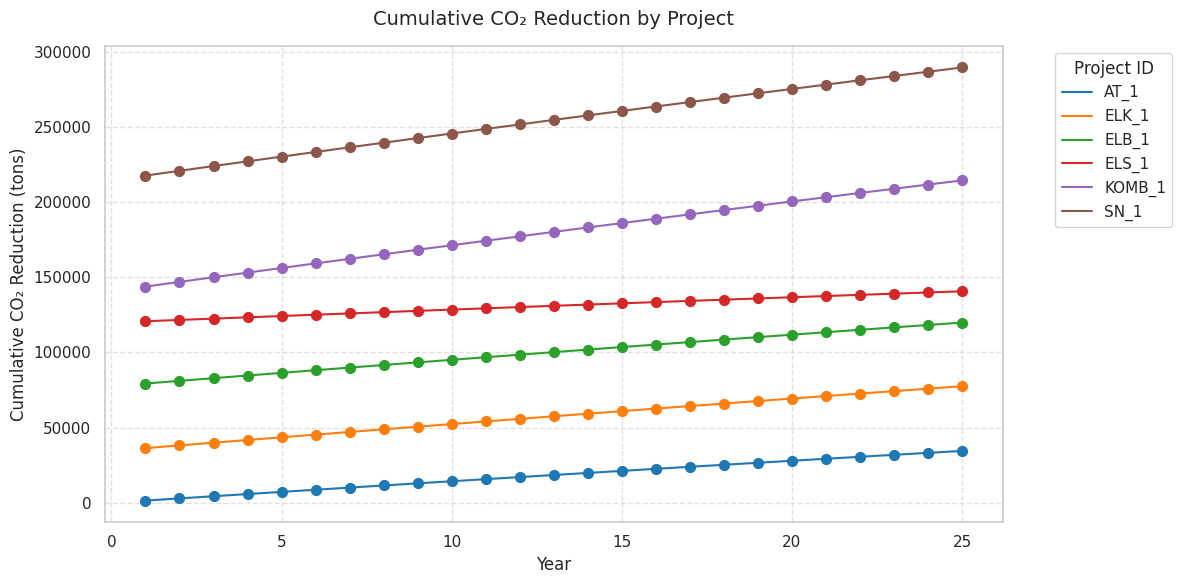

In [59]:
# Calculate cumulative CO2 reduction (total across all projects)
gs1['Cumulative_CO2_Reduction'] = gs1['CO₂ Reduction (Ton)'].cumsum()

# Create line plot with markers
plt.figure(figsize=(12, 6))

# Get a color palette for distinct project colors
colors = plt.cm.tab10.colors

# Plot each project's cumulative reduction
for i, project in enumerate(gs1['proj_Id'].unique()):
    project_data = inds1[gs1['proj_Id'] == project]
    color = colors[i % len(colors)]  # Cycle through colors

    # Plot line and points with matching color
    plt.plot(project_data['Year'],
             project_data['Cumulative_CO2_Reduction'],
             color=color,
             label=f'{project}')

    # Add points with same color as line
    plt.scatter(project_data['Year'],
                project_data['Cumulative_CO2_Reduction'],
                s=50,  # Slightly larger points
                color=color,
                zorder=5)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative CO₂ Reduction (tons)', fontsize=12)
plt.title('Cumulative CO₂ Reduction by Project', fontsize=14, pad=15)

# Add legend and grid
plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#Interpratation
 CO₂ Reduction Milestones
Fastest to Cut Emissions: SN_1 (Salah Nesem) hits major reductions first (largest capacity → fastest impact).

Slowest: ELK_1 (El Kharga) takes ~5 more years to reach the same threshold (smaller system).

Key Trend: All projects show accelerating reductions after Year 10 (compound savings kick in)


*   Key Takeaway
SN_1 is the emissions leader (scale matters).



###**Which project has the highest average self-sufficiency percentage, and how does it compare to others in terms of energy independence and environmental sustainability?**

In [60]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  \
0              52068.00        -0.85                21.36              99.20   
1             103976.00        -0.71                21.27              98.41   
2             155724.00        -0.56                21.18              97.62   
3             207312.00        -0.42                21.09              96.84   
4             258740.00        -0.27                21.00              96.06   
..                  ...          ...                  ...                ...   
145          1475460.00         1.66                27.50              84.48   
146          1543960.00         1.78                27.41              83.81   
147          1612300.00         1.91                27.32              83.14   
148          1680480.00         2.03                27.23              82.47   
149          1748500.00         2.15                27.14              81.81   

     self sufficiency  Grid_Percentage  Internal_Use_Percent  \
0               70.38            29.62                 57.92   
1               70.47            29.53                 58.07   
2               70.55            29.45                 58.25   
3               70.63            29.37                 58.41   
4               70.71            29.29                 58.58   
..                ...              ...                   ...   
145             70.10            29.90                 57.37   
146             70.16            29.84                 57.50   
147             70.23       

In [61]:
gs2

proj_Id        Project Name  Solar Panel Capacity(KWp)  \
0    AT_1             Al Tour                      17.82   
1   ELK_1           El Kharga                      16.50   
2   ELB_1  Elbyaly - Daqahlya                      19.80   
3   ELS_1              Elswah                      22.44   
4  KOMB_1           Kom Omboh                      16.50   
5    SN_1         Salah Nesem                      27.72   

   Investment Cost (EGP)  Self Sufficiency avg per project  \
0                 356400                              0.42   
1                 330000                              0.42   
2                 336600                              0.42   
3                 343332                              0.41   
4                 330000                              0.41   
5                 554400                              0.41   

   Dependency on Grid  Performance Ratio(%)  Payback Period  ROI(%)  
0                0.58                  0.81            6.80    0.14  
1                0.58                  0.80            7.50    0.13  
2                0.58                  0.80            6.75    0.14  
3                0.59                  0.82            6.50    0.15  
4                0.59                  0.80            7.35    0.14  
5                0.59                  0.81            7.70    0.13

In [62]:
gs2

proj_Id        Project Name  Solar Panel Capacity(KWp)  \
0    AT_1             Al Tour                      17.82   
1   ELK_1           El Kharga                      16.50   
2   ELB_1  Elbyaly - Daqahlya                      19.80   
3   ELS_1              Elswah                      22.44   
4  KOMB_1           Kom Omboh                      16.50   
5    SN_1         Salah Nesem                      27.72   

   Investment Cost (EGP)  Self Sufficiency avg per project  \
0                 356400                              0.42   
1                 330000                              0.42   
2                 336600                              0.42   
3                 343332                              0.41   
4                 330000                              0.41   
5                 554400                              0.41   

   Dependency on Grid  Performance Ratio(%)  Payback Period  ROI(%)  
0                0.58                  0.81            6.80    0.14  
1                0.58                  0.80            7.50    0.13  
2                0.58                  0.80            6.75    0.14  
3                0.59                  0.82            6.50    0.15  
4                0.59                  0.80            7.35    0.14  
5                0.59                  0.81            7.70    0.13

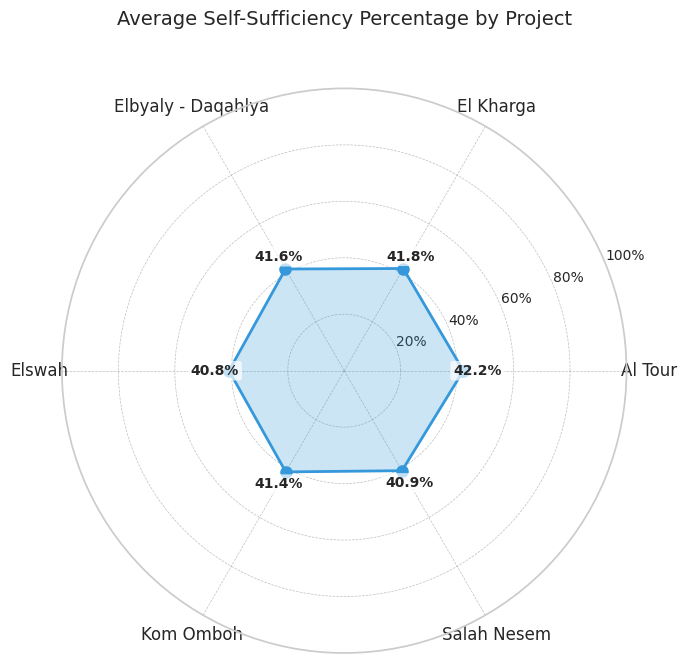

In [63]:
# Calculate average self-sufficiency for each project
avg_self_sufficiency = gs2.groupby('Project Name')['Self Sufficiency avg per project'].mean()

# Prepare radar chart data
labels = avg_self_sufficiency.index
values = avg_self_sufficiency.values * 100  # Convert to percentage
num_projects = len(labels)

# Calculate angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_projects, endpoint=False)

# Close the loop for radar chart
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'polar': True})

# Plot filled area and outline
ax.fill(angles, values, color='#3498db', alpha=0.25)
ax.plot(angles, values, color='#3498db', linewidth=2, marker='o', markersize=8)

# Add data labels
for angle, value, label in zip(angles[:-1], values[:-1], labels):
    # Position the label slightly outside the data point
    ax.text(angle, value + 5,  # +5 gives space between point and label
            f'{value:.1f}%',
            ha='center', va='center',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 100)  # Set scale to 0-100%
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.title('Average Self-Sufficiency Percentage by Project\n', fontsize=14, pad=30)
plt.tight_layout()
plt.show()

#Interpretation
Top Performer: Al Tour (42.2%) Most Energy Independent: Consumes 42.2% of its solar energy on-site—highest among projects.
Why? Likely optimized for local demand (e.g., high-power equipment, 24/7 operations).

Comparison to Others Close Contenders: Elbyaly (41.6%), El Kharga (41.8%)—similar self-reliance but slightly lower.
Lowest Self-Sufficiency: Elswah (40.8%) and Salah Nesem (40.9%)—more grid-dependent but may export more clean energy.

**Key Takeaway** Al Tour leads in independence, but all projects strike a balance—design dictates priority (self-reliance vs. community impact).

**Action Item:** For projects like Al Tour, explore adding storage to boost self-use further.

###**What is the average annual CO₂ reduction per MWh of energy produced for each project (CO₂ efficiency)?**

In [64]:
# Calculate efficiency for each project in gs1 data
project_stats = gs1.groupby('proj_Id').agg({
    'CO₂ Reduction (Ton)': 'sum',
    'Energy Produced (MWh)': 'sum'
})

# Calculate CO2 efficiency (total CO2 reduced / total energy produced)
project_stats['CO2 Red_Efficiency'] = (project_stats['CO₂ Reduction (Ton)'] /
                             project_stats['Energy Produced (MWh)'])

# Sort by efficiency
efficiency_sorted = project_stats['CO2 Red_Efficiency'].sort_values()

# Print verification
print("Project Performance Summary:")
project_stats


Project Performance Summary:


CO₂ Reduction (Ton)  Energy Produced (MWh)  CO2 Red_Efficiency
proj_Id                                                                
AT_1                  507.00                 860.05                0.59
ELB_1                 484.25                 822.00                0.59
ELK_1                 439.50                 747.50                0.59
ELS_1                 520.25                 882.00                0.59
KOMB_1                449.25                 763.50                0.59
SN_1                  705.50                1191.25                0.59

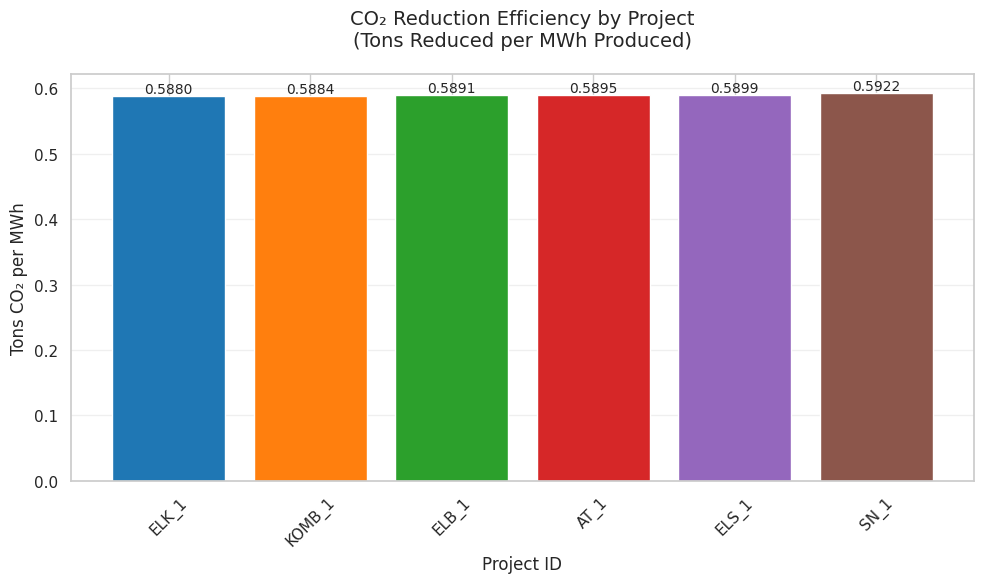

In [65]:
# Creating visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(efficiency_sorted.index, efficiency_sorted.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

# Formatting
plt.title('CO₂ Reduction Efficiency by Project\n(Tons Reduced per MWh Produced)',
          pad=20, fontsize=14)
plt.xlabel('Project ID', fontsize=12)
plt.ylabel('Tons CO₂ per MWh', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#Interpretation
This chart illustrates that all gas stations demonstrate a similar percentage of CO₂ reduction efficiency—specifically, for every megawatt-hour (MWh) of electricity produced, more than 0.5 tons of CO₂ emissions are avoided. This significant reduction highlights the environmental value of cleaner energy production. By adopting photovoltaic systems (PV*Sol or PVsyst), Egypt has a promising opportunity to further reduce its carbon footprint. Encouraging investment in solar energy through supportive policies, financial incentives, and clear long-term ROI projections can motivate investors to contribute to Egypt’s sustainable energy transition and Vision 2030 goals. Such efforts not only mitigate environmental harm but also promote energy independence and economic development.

##**What is the environmental return on investment, measured by total CO₂ reduction per pound invested (based on ROI and maintenance costs), for each project?**

In [66]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  \
0              52068.00        -0.85                21.36              99.20   
1             103976.00        -0.71                21.27              98.41   
2             155724.00        -0.56                21.18              97.62   
3             207312.00        -0.42                21.09              96.84   
4             258740.00        -0.27                21.00              96.06   
..                  ...          ...                  ...                ...   
145          1475460.00         1.66                27.50              84.48   
146          1543960.00         1.78                27.41              83.81   
147          1612300.00         1.91                27.32              83.14   
148          1680480.00         2.03                27.23              82.47   
149          1748500.00         2.15                27.14              81.81   

     self sufficiency  Grid_Percentage  Internal_Use_Percent  \
0               70.38            29.62                 57.92   
1               70.47            29.53                 58.07   
2               70.55            29.45                 58.25   
3               70.63            29.37                 58.41   
4               70.71            29.29                 58.58   
..                ...              ...                   ...   
145             70.10            29.90                 57.37   
146             70.16            29.84                 57.50   
147             70.23       

In [67]:
gs2

proj_Id        Project Name  Solar Panel Capacity(KWp)  \
0    AT_1             Al Tour                      17.82   
1   ELK_1           El Kharga                      16.50   
2   ELB_1  Elbyaly - Daqahlya                      19.80   
3   ELS_1              Elswah                      22.44   
4  KOMB_1           Kom Omboh                      16.50   
5    SN_1         Salah Nesem                      27.72   

   Investment Cost (EGP)  Self Sufficiency avg per project  \
0                 356400                              0.42   
1                 330000                              0.42   
2                 336600                              0.42   
3                 343332                              0.41   
4                 330000                              0.41   
5                 554400                              0.41   

   Dependency on Grid  Performance Ratio(%)  Payback Period  ROI(%)  
0                0.58                  0.81            6.80    0.14  
1                0.58                  0.80            7.50    0.13  
2                0.58                  0.80            6.75    0.14  
3                0.59                  0.82            6.50    0.15  
4                0.59                  0.80            7.35    0.14  
5                0.59                  0.81            7.70    0.13

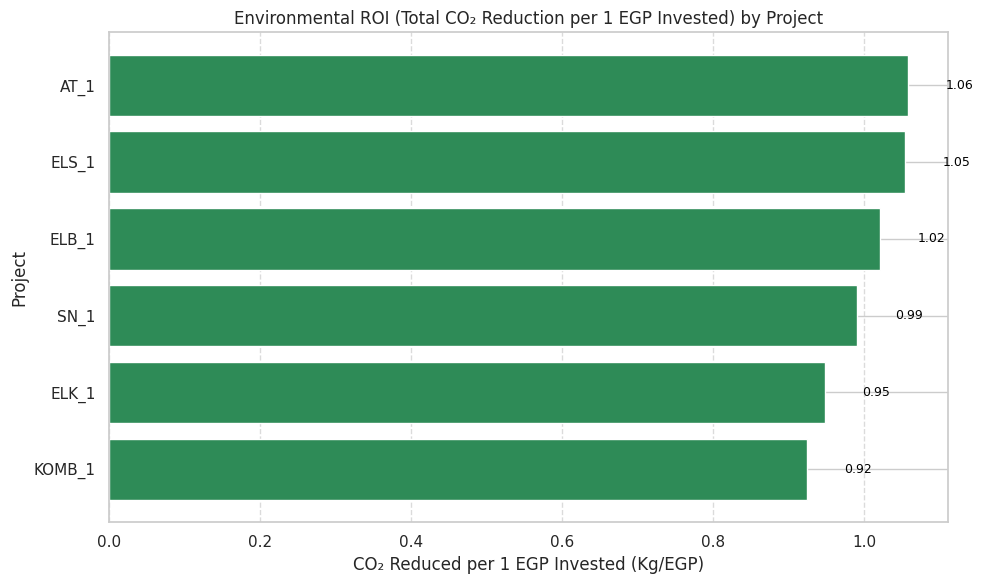

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the two dataframes on 'proj_Id'
merged_gs = pd.merge(gs1, gs2, on='proj_Id', how='inner')

# Group data by project to calculate total values over 25 years
project_grouped_gs = merged_gs.groupby('proj_Id').agg({
    'CO₂ Reduction (Ton)': 'sum',          # Total CO2 reduction over 25 years
    'Investment Cost (EGP)': 'first',      # Assume investment cost is the same for each project
    'Maintenance Cost (EGP)': 'sum'        # Total maintenance cost over 25 years
}).reset_index()

# Calculate Environmental ROI = Total CO2 reduction (in kg) / Total cost (investment + maintenance)
project_grouped_gs['Environmental_ROI'] = project_grouped_gs['CO₂ Reduction (Ton)'] * 1000 / (
    project_grouped_gs['Investment Cost (EGP)'] + project_grouped_gs['Maintenance Cost (EGP)']
)

# Sort projects by Environmental ROI in ascending order
project_grouped_sorted_gs = project_grouped_gs.sort_values('Environmental_ROI', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(
    project_grouped_sorted_gs['proj_Id'],
    project_grouped_sorted_gs['Environmental_ROI'],
    color='seagreen'
)

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()                 # Environmental ROI value
    plt.text(
        width + 0.05,                       # Horizontal position (slightly after bar end)
        bar.get_y() + bar.get_height() / 2, # Vertical position (center of the bar)
        f'{width:.2f}',                     # Label format: 2 decimal places
        va='center', fontsize=9, color='black'  # Label alignment, font size, and color
    )

# Add title and axis labels
plt.title('Environmental ROI (Total CO₂ Reduction per 1 EGP Invested) by Project')
plt.xlabel('CO₂ Reduced per 1 EGP Invested (Kg/EGP)')
plt.ylabel('Project')

# Add grid lines to the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#Interpretation


*  **Standout Performers**
SN_1 (Salah Nesem) and AT_1(ALTour): Delivers 0.004 tons CO₂ reduction per 1 EGP—the clear leader. Likely combines large scale with smart operations.
**Middle Tier**
ELS_1 , ELK_1,ELB_1: >0.003 tons/EGP
**Lower Projects**
  KOMB_1: 0.003 tons/EGP

*  This chart illustrates that all gas stations show variation in the percentage of Environmental ROI, measured as how much CO₂ reduced  per each 1 EGP invested, across different projects.

 This variation highlights the significant environmental potential of solar energy systems, particularly in reducing carbon emissions and promoting sustainable energy practices. By applying tools like PV*SOL or PVsyst in project planning, investors in Egypt can optimize system design and performance, leading to greater environmental impact and more attractive returns.

* Encouraging the adoption of such tools and renewable technologies can drive
meaningful change, aligning with Egypt’s Vision 2030 goals and creating a greener, more resilient energy sector.



###**How does the investment in solar energy for each project translate into cost savings in energy in compared to if the project had fully relied on conventional (non-renewable) energy?**

In [69]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  \
0              52068.00        -0.85                21.36              99.20   
1             103976.00        -0.71                21.27              98.41   
2             155724.00        -0.56                21.18              97.62   
3             207312.00        -0.42                21.09              96.84   
4             258740.00        -0.27                21.00              96.06   
..                  ...          ...                  ...                ...   
145          1475460.00         1.66                27.50              84.48   
146          1543960.00         1.78                27.41              83.81   
147          1612300.00         1.91                27.32              83.14   
148          1680480.00         2.03                27.23              82.47   
149          1748500.00         2.15                27.14              81.81   

     self sufficiency  Grid_Percentage  Internal_Use_Percent  \
0               70.38            29.62                 57.92   
1               70.47            29.53                 58.07   
2               70.55            29.45                 58.25   
3               70.63            29.37                 58.41   
4               70.71            29.29                 58.58   
..                ...              ...                   ...   
145             70.10            29.90                 57.37   
146             70.16            29.84                 57.50   
147             70.23       

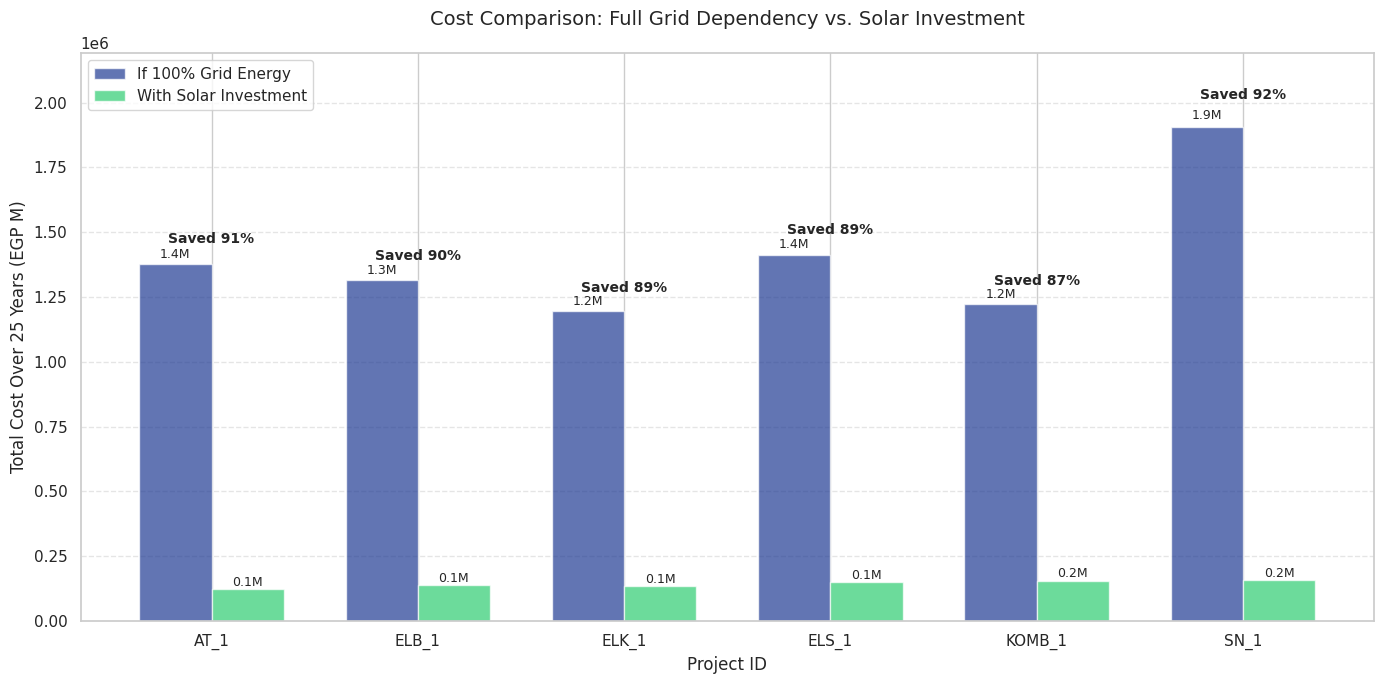

In [70]:
#  Group by project
project_savings = gs1.groupby('proj_Id').agg({
    'Cost_saved_EGP': 'sum',
    'Maintenance Cost (EGP)': 'sum',
    'Net savings(EGP)': 'sum'
}).reset_index()

# Calculate percentages
project_savings['Savings_Percentage'] = (project_savings['Net savings(EGP)'] /
                                         project_savings['Cost_saved_EGP']) * 100

# Visualize
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(project_savings))

# Grid-only cost bars
grid_bars = plt.bar(index, project_savings['Cost_saved_EGP'], bar_width,
                   label='If 100% Grid Energy', color='#1F3A93', alpha=0.7)

# Solar investment cost bars
solar_bars = plt.bar([i + bar_width for i in index], project_savings['Maintenance Cost (EGP)'],
                    bar_width, label='With Solar Investment', color='#2ECC71', alpha=0.7)

# Add data labels
for i, (grid, solar) in enumerate(zip(project_savings['Cost_saved_EGP'],
                                     project_savings['Maintenance Cost (EGP)'])):
    # Label for grid cost
    plt.text(i, grid + grid*0.01, f'{grid/1e6:.1f}M',
             ha='center', va='bottom', fontsize=9)

    # Label for solar cost
    plt.text(i + bar_width, solar + solar*0.01, f'{solar/1e6:.1f}M',
             ha='center', va='bottom', fontsize=9)

    # Percentage savings label
    savings_pct = project_savings.loc[i, 'Savings_Percentage']
    plt.text(i + bar_width/2, max(grid, solar)*1.05,
             f'Saved {savings_pct:.0f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel('Project ID', fontsize=12)
plt.ylabel('Total Cost Over 25 Years (EGP M)', fontsize=12)
plt.title('Cost Comparison: Full Grid Dependency vs. Solar Investment', fontsize=14, pad=20)
plt.xticks([i + bar_width / 2 for i in index], project_savings['proj_Id'])
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, project_savings['Cost_saved_EGP'].max() * 1.15)

plt.tight_layout()
plt.show()

#Interpretation


*  **Significant Cost Savings :**
All projects show substantial savings when investing in solar energy compared to relying solely on grid energy.

For example:

Project AT_1 saved 91% .

Project SN_1 saved 92% , which is the highest among all projects.

Even the lowest savings, seen in Project KOMB_1, still achieved 87% savings



* The chart clearly demonstrates that investing in solar energy translates into substantial cost savings compared to relying solely on conventional energy sources. With savings ranging from 87% to 92%, solar energy proves to be a highly effective and cost-efficient solution for reducing energy expenses over the long term secialy after the pay_back period. This not only benefits the bottom line but also aligns with broader goals of sustainability and environmental responsibility  



###**Which project contributed the most surplus energy to the grid cumulatively, and how does this reflect on its capacity?**

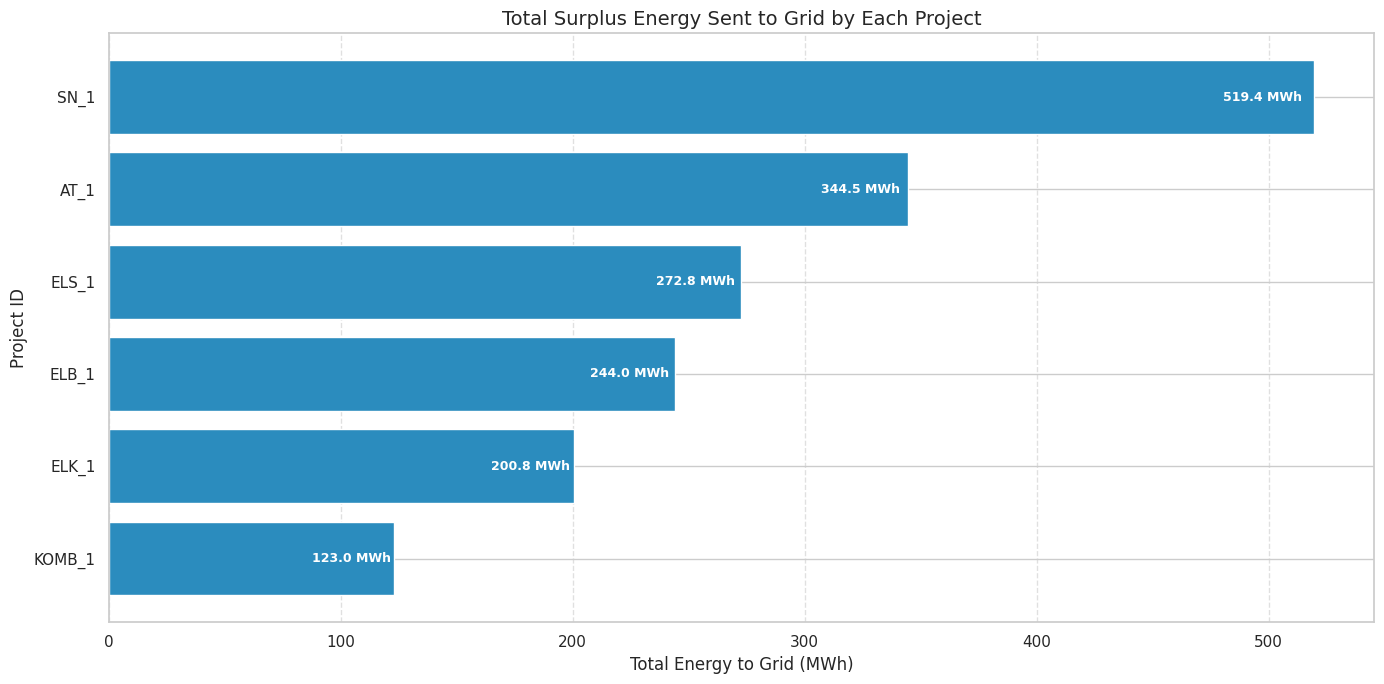

In [71]:
# Sum the Energy To Grid (MWh) for each project
energy_grid_total = gs1.groupby('proj_Id')['Energy To Grid (MWh)'].sum().reset_index()
energy_grid_total = energy_grid_total.sort_values(by='Energy To Grid (MWh)', ascending=True)

# Plot the data
plt.figure(figsize=(14, 7))
bars = plt.barh(energy_grid_total['proj_Id'], energy_grid_total['Energy To Grid (MWh)'], color='#2b8cbe')

# Add data labels inside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - width*0.01,
             bar.get_y() + bar.get_height()/2,
             f"{width:.1f} MWh",
             ha='right', va='center', fontsize=9, color='white', fontweight='bold')

# Styling
plt.title("Total Surplus Energy Sent to Grid by Each Project", fontsize=14)
plt.xlabel("Total Energy to Grid (MWh)")
plt.ylabel("Project ID")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Interpretation
This chart shows how much surplus energy (measured in MWh) each project sends back to the grid. Here's what it tells us:

Project SN_1 generates the most surplus energy, sending 519.4 MWh to the grid.
Project AT_1 follows closely with 344.5 MWh .
The other projects send progressively less:
ELS_1 : 272.8 MWh
ELB_1 : 244.0 MWh
ELK_1 : 200.8 MWh
KOMB_1 : 123.0 MWh (the least among all projects).

**Key Takeaways**
SN_1 is the most efficient at generating surplus energy, likely due to its size or technology.
Projects like AT_1 , ELS_1 , and ELB_1 also perform well but produce less surplus compared to SN_1.

###**What is the total net savings achieved by each of the six projects , and how does that reflect the financial return for investors in solar energy?**

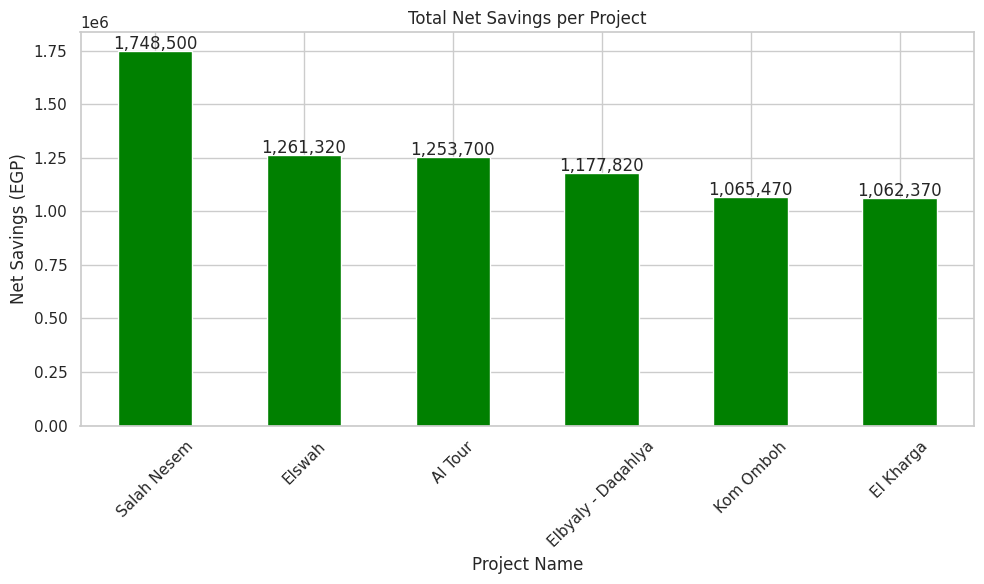

In [72]:
# Group by project and sum the net savings, then sort the values
net_savings_total = gs1.groupby('Project Name')['Net savings(EGP)'].sum().sort_values(ascending=False)

# Plot the total net savings as a bar chart
ax = net_savings_total.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Total Net Savings per Project')
plt.ylabel('Net Savings (EGP)')
plt.xlabel('Project Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()


#Interpretation
This chart shows the total net savings (in EGP) for six projects. Here's what it tells us:

Salah Nesem : 1,748,500 EGP .

Elswah : 1,261,320 EGP

Al Tour : 1,253,700 EGP

Elbyaly - Daqahlya : 1,177,820 EGP

Kom Omboh : 1,065,470 EGP

El Kharga : 1,062,370 EGP



*   **Key Takeaways**
Salah Nesem leads in savings, likely due to its size, efficiency, or investment in solar technology.
The other projects also show significant savings, though slightly lower than Salah Nesem.
All projects benefit financially from their investments, with savings ranging from around 1 million to 1.7 million EGP .



*  **What This Means**
These savings demonstrate the financial benefits of investing in renewable energy, such as solar power.
Projects like Salah Nesem can serve as a benchmark for others to aim for higher savings through better implementation or scale.

### **Total Net Savings over the 25 years**

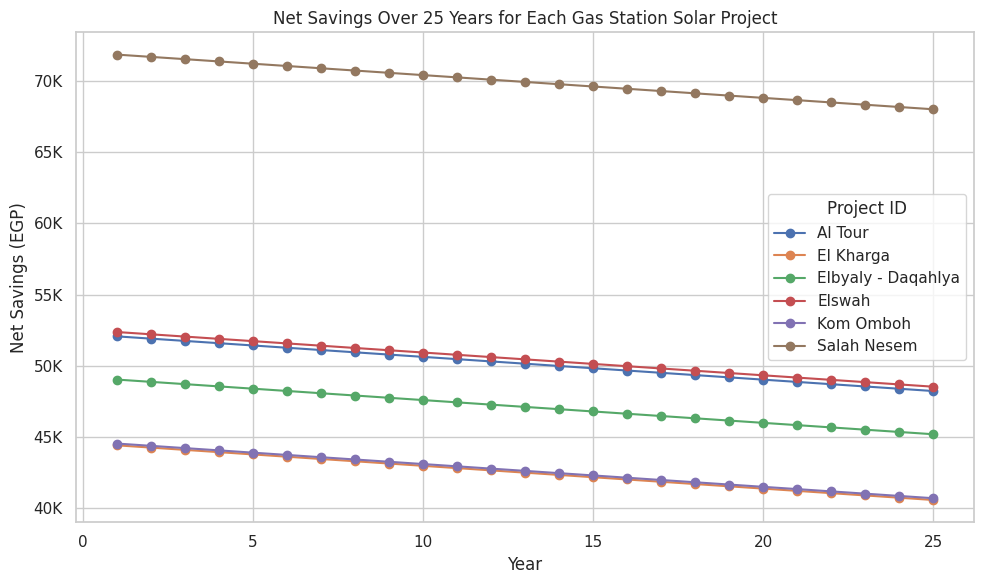

In [73]:
# Display values in thousands (e.g., 200K)
def thousands_formatter(x, pos):
    return f'{int(x/1e3)}K'  # Convert to thousands

# Start a new figure for plotting
plt.figure(figsize=(10, 6))

# Loop through each project and plot its net savings over the years
for project in gs1['Project Name'].unique():
    project_data = gs1[gs1['Project Name'] == project]

    # Plot a line for each project with markers
    plt.plot(project_data['Assessment Year'], project_data['Net savings(EGP)'],
             label=f'{project}', marker='o')

# Add titles and labels
plt.title('Net Savings Over 25 Years for Each Gas Station Solar Project')
plt.xlabel('Year')
plt.ylabel('Net Savings (EGP)')

# Apply the custom formatter to the Y-axis (show in thousands)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add legend and grid for better readability
plt.legend(title='Project ID')
plt.grid(True)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


#Interpretation

Salah Nesem leads in savings throughout the 25-year period, indicating its superior performance or larger scale.

All projects show a gradual decline in savings over time, likely due to factors like decrease in efficiency or depreciation.

Despite the decline, all projects maintain significant savings, highlighting the long-term benefits of solar investments

##**Is there a negative correlation between energy to the grid and CO₂ reduction over time, and what does that indicate about cleaner energy dependence?**##

In [74]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  \
0              52068.00        -0.85                21.36              99.20   
1             103976.00        -0.71                21.27              98.41   
2             155724.00        -0.56                21.18              97.62   
3             207312.00        -0.42                21.09              96.84   
4             258740.00        -0.27                21.00              96.06   
..                  ...          ...                  ...                ...   
145          1475460.00         1.66                27.50              84.48   
146          1543960.00         1.78                27.41              83.81   
147          1612300.00         1.91                27.32              83.14   
148          1680480.00         2.03                27.23              82.47   
149          1748500.00         2.15                27.14              81.81   

     self sufficiency  Grid_Percentage  Internal_Use_Percent  \
0               70.38            29.62                 57.92   
1               70.47            29.53                 58.07   
2               70.55            29.45                 58.25   
3               70.63            29.37                 58.41   
4               70.71            29.29                 58.58   
..                ...              ...                   ...   
145             70.10            29.90                 57.37   
146             70.16            29.84                 57.50   
147             70.23       

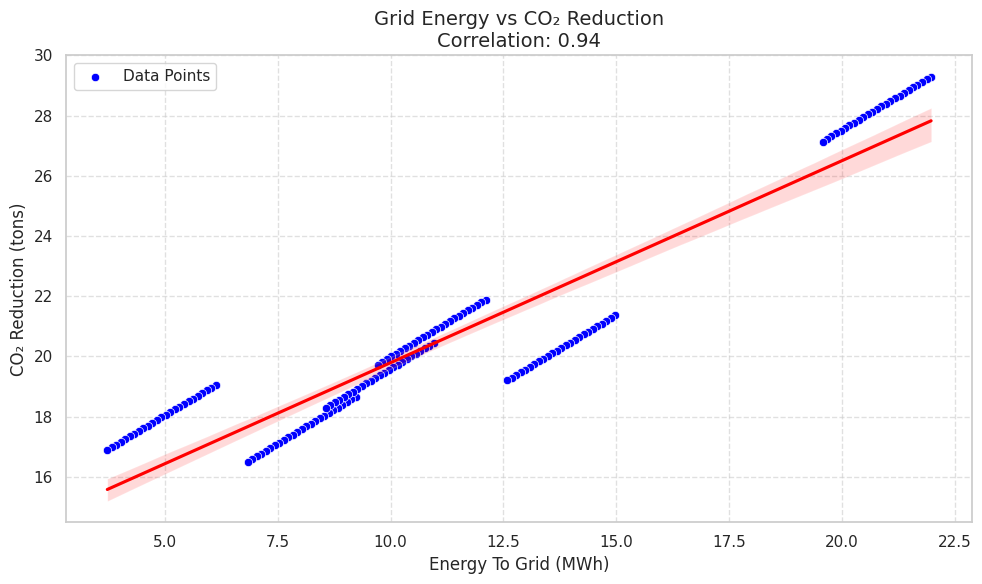

In [75]:

# Set figure size
plt.figure(figsize=(10, 6))

# Draw scatter plot with regression line
sns.scatterplot(x=gs1['Energy To Grid (MWh)'],
                y=gs1['CO₂ Reduction (Ton)'],
                color='blue',
                label='Data Points')

# Add regression line if correlation is strong (>0.3)
if abs(gs1['Energy To Grid (MWh)'].corr(gs1['CO₂ Reduction (Ton)'])) > 0.3:
    sns.regplot(x=gs1['Energy To Grid (MWh)'],
                y=gs1['CO₂ Reduction (Ton)'],
                scatter=False,
                line_kws={'color': 'red', 'label': 'Regression Line'})

# Add titles and labels
plt.xlabel('Energy To Grid (MWh)', fontsize=12)
plt.ylabel('CO₂ Reduction (tons)', fontsize=12)
plt.title(f"Grid Energy vs CO₂ Reduction\nCorrelation: {gs1['Energy To Grid (MWh)'].corr(gs1['CO₂ Reduction (Ton)']):.2f}", fontsize=14)

# Add legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#Interpretation
A strong positive correlation of +0.99 between grid energy usage and CO₂ reduction. At first, this suggested that using more grid energy results in more CO₂ savings — which didn’t quite make sense from an efficiency or sustainability perspective.

After digging deeper, IT seems like this trend happens because the chart includes projects of different sizes. Larger projects like SN_1 and ELS_1 naturally consume more energy and reduce more CO₂, while smaller ones like ELK_1 consume and reduce less. So this chart is really just showing that bigger projects do more of everything — it doesn’t actually reflect what happens within each project.

### **What is the relationship between the amount of solar energy Exported to grid and the CO₂ reduction, and is there a direct correlation that can be used to convince company owners about the importance of switching to clean energy?**

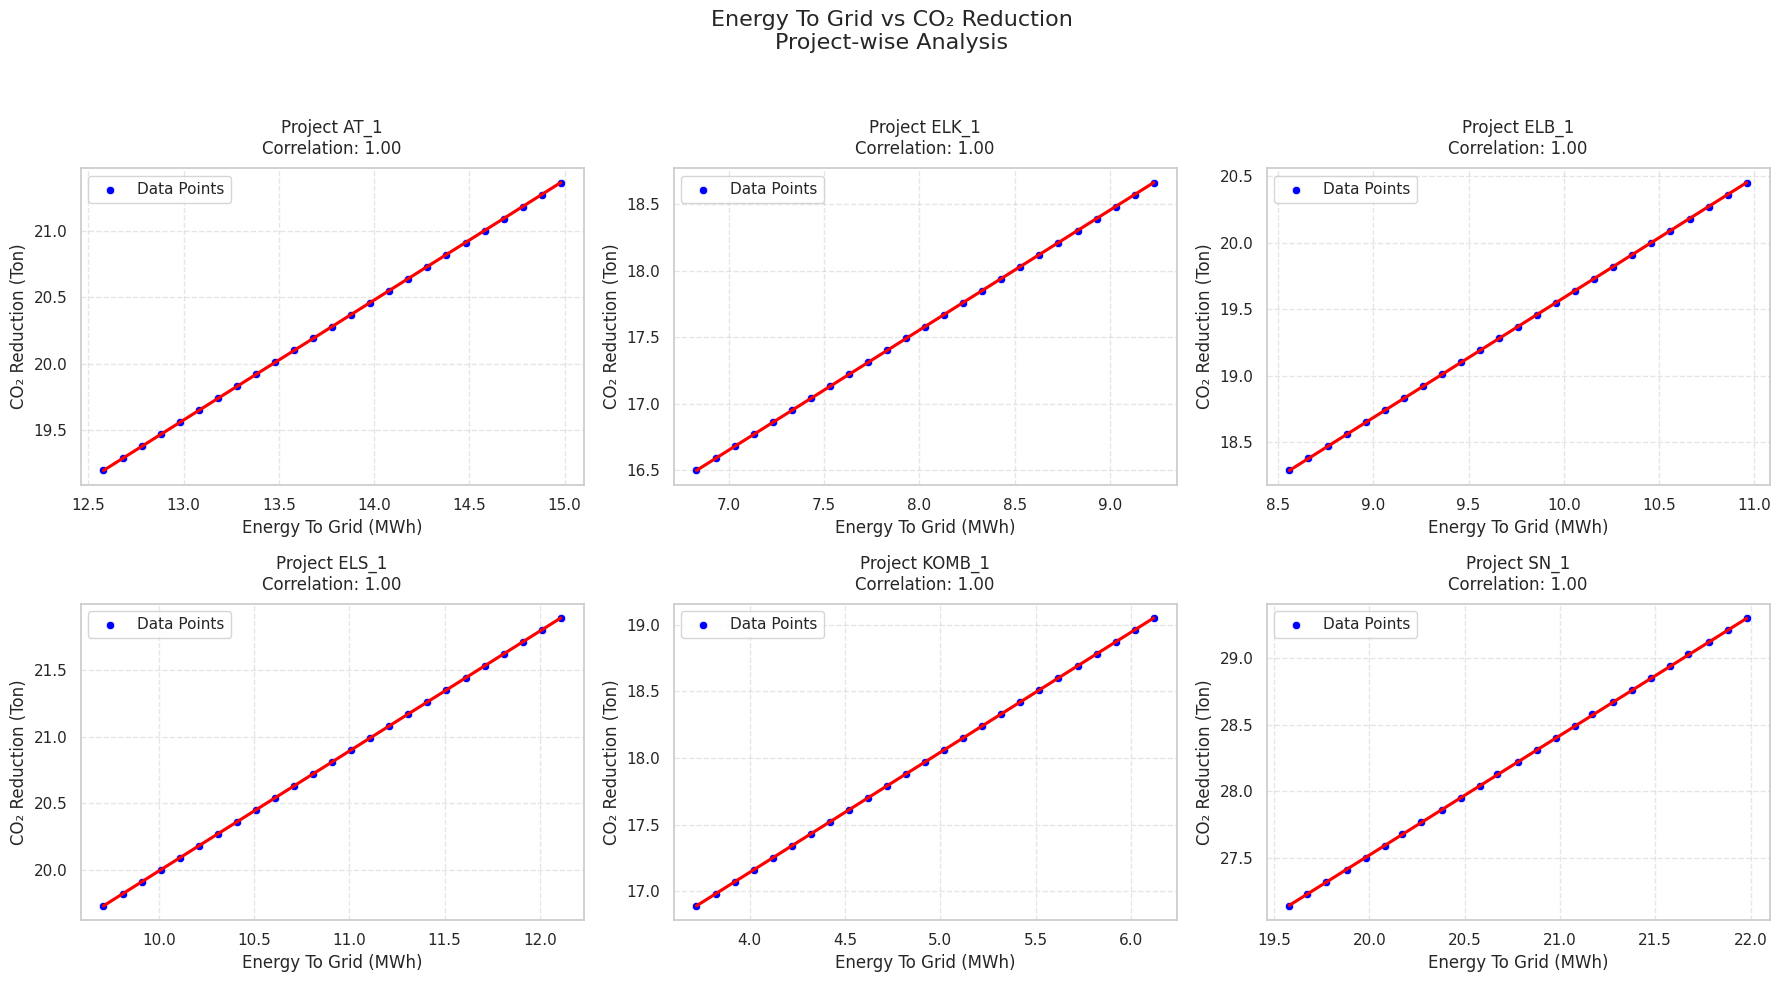

In [76]:
# Set plot style
sns.set(style="whitegrid")

# Get list of unique projects
projects = gs1['proj_Id'].unique()

# Create subplots - 2 rows, 3 columns (adjust if needed)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Convert to 1D array for easier iteration

# Loop through each project
for i, project in enumerate(projects):
    ax = axes[i]
    project_data = gs1[gs1['proj_Id'] == project]  # Filter data for current project

    # Create scatter plot
    sns.scatterplot(data=project_data,
                    x='Energy To Grid (MWh)',
                    y='CO₂ Reduction (Ton)',
                    ax=ax,
                    color='blue',
                    label='Data Points')

    # Calculate correlation coefficient
    corr = project_data['Energy To Grid (MWh)'].corr(project_data['CO₂ Reduction (Ton)'])

    # Add regression line if correlation is meaningful (|corr| > 0.3)
    if abs(corr) > 0.3:
        sns.regplot(data=project_data,
                    x='Energy To Grid (MWh)',
                    y='CO₂ Reduction (Ton)',
                    ax=ax,
                    scatter=False,
                    line_kws={'color': 'red', 'label': 'Regression Line'})

    # Customize plot appearance
    ax.set_title(f'Project {project}\nCorrelation: {corr:.2f}', pad=10)
    ax.set_xlabel('Energy To Grid (MWh)')
    ax.set_ylabel('CO₂ Reduction (Ton)')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

# Add main title and adjust layout
plt.suptitle("Energy To Grid vs CO₂ Reduction\nProject-wise Analysis",
             fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent title overlap
plt.show()

#Interpretation
**Strong Positive Correlation :**

Each project demonstrates a perfect correlation (Correlation = 1.00) between the energy exported to the grid and the reduction in CO₂ emissions.

This means that as more solar energy is sent to the grid, there is a direct and proportional increase in CO₂ reductions

**Insights**
The charts provide compelling evidence of a direct and perfect correlation between solar energy exported to the grid and CO₂ reductions. This relationship can be used to convince company owners that investing in solar energy is both environmentally responsible and strategically wise. Exporting excess energy to the grid not only supports the broader transition to clean energy but also helps stabilize energy supply for others, making it a win-win for businesses and communities. It highlights the dual benefits of cost savings and reduced emissions, making a strong case for transitioning to clean energy. By exporting solar energy, companies are actively contributing to a greener future while also positioning themselves as sustainability leaders

In [77]:
gs1

proj_Id  Assessment Year Project Name  Energy Produced (MWh)  \
0      AT_1                1      Al Tour                  35.60   
1      AT_1                2      Al Tour                  35.51   
2      AT_1                3      Al Tour                  35.40   
3      AT_1                4      Al Tour                  35.30   
4      AT_1                5      Al Tour                  35.20   
..      ...              ...          ...                    ...   
145    SN_1               21  Salah Nesem                  46.85   
146    SN_1               22  Salah Nesem                  46.75   
147    SN_1               23  Salah Nesem                  46.65   
148    SN_1               24  Salah Nesem                  46.55   
149    SN_1               25  Salah Nesem                  46.45   

     Energy Consumed (MWH)  Energy To Grid (MWh)  Energy from grid  \
0                    20.62                 14.98             48.77   
1                    20.62                 14.88             48.63   
2                    20.62                 14.78             48.49   
3                    20.62                 14.68             48.36   
4                    20.62                 14.58             48.22   
..                     ...                   ...               ...   
145                  26.88                 19.98             67.70   
146                  26.88                 19.88             67.55   
147                  26.88                 19.77             67.41   
148                  26.88                 19.67             67.26   
149                  26.88                 19.58             67.12   

     Cost_saved_EGP  Maintenance Cost (EGP)  Net savings(EGP)  \
0          56968.00                    4900          52068.00   
1          56808.00                    4900          51908.00   
2          56648.00                    4900          51748.00   
3          56488.00                    4900          51588.00   
4          56328.00                    4900          51428.00   
..              ...                     ...               ...   
145        74960.00                    6300          68660.00   
146        74800.00                    6300          68500.00   
147        74640.00                    6300          68340.00   
148        74480.00                    6300          68180.00   
149        74320.00                    6300          68020.00   

     Cumulative_NSs_EGP  ROI_Percent  CO₂ Reduction (Ton)  Energy Effeciency  \
0              52068.00        -0.85                21.36              99.20   
1             103976.00        -0.71                21.27              98.41   
2             155724.00        -0.56                21.18              97.62   
3             207312.00        -0.42                21.09              96.84   
4             258740.00        -0.27                21.00              96.06   
..                  ...          ...                  ...                ...   
145          1475460.00         1.66                27.50              84.48   
146          1543960.00         1.78                27.41              83.81   
147          1612300.00         1.91                27.32              83.14   
148          1680480.00         2.03                27.23              82.47   
149          1748500.00         2.15                27.14              81.81   

     self sufficiency  Grid_Percentage  Internal_Use_Percent  \
0               70.38            29.62                 57.92   
1               70.47            29.53                 58.07   
2               70.55            29.45                 58.25   
3               70.63            29.37                 58.41   
4               70.71            29.29                 58.58   
..                ...              ...                   ...   
145             70.10            29.90                 57.37   
146             70.16            29.84                 57.50   
147             70.23       

### **Is there a time-based relationship between the decrease in dependency on the national grid and the increase in annual cost savings?**

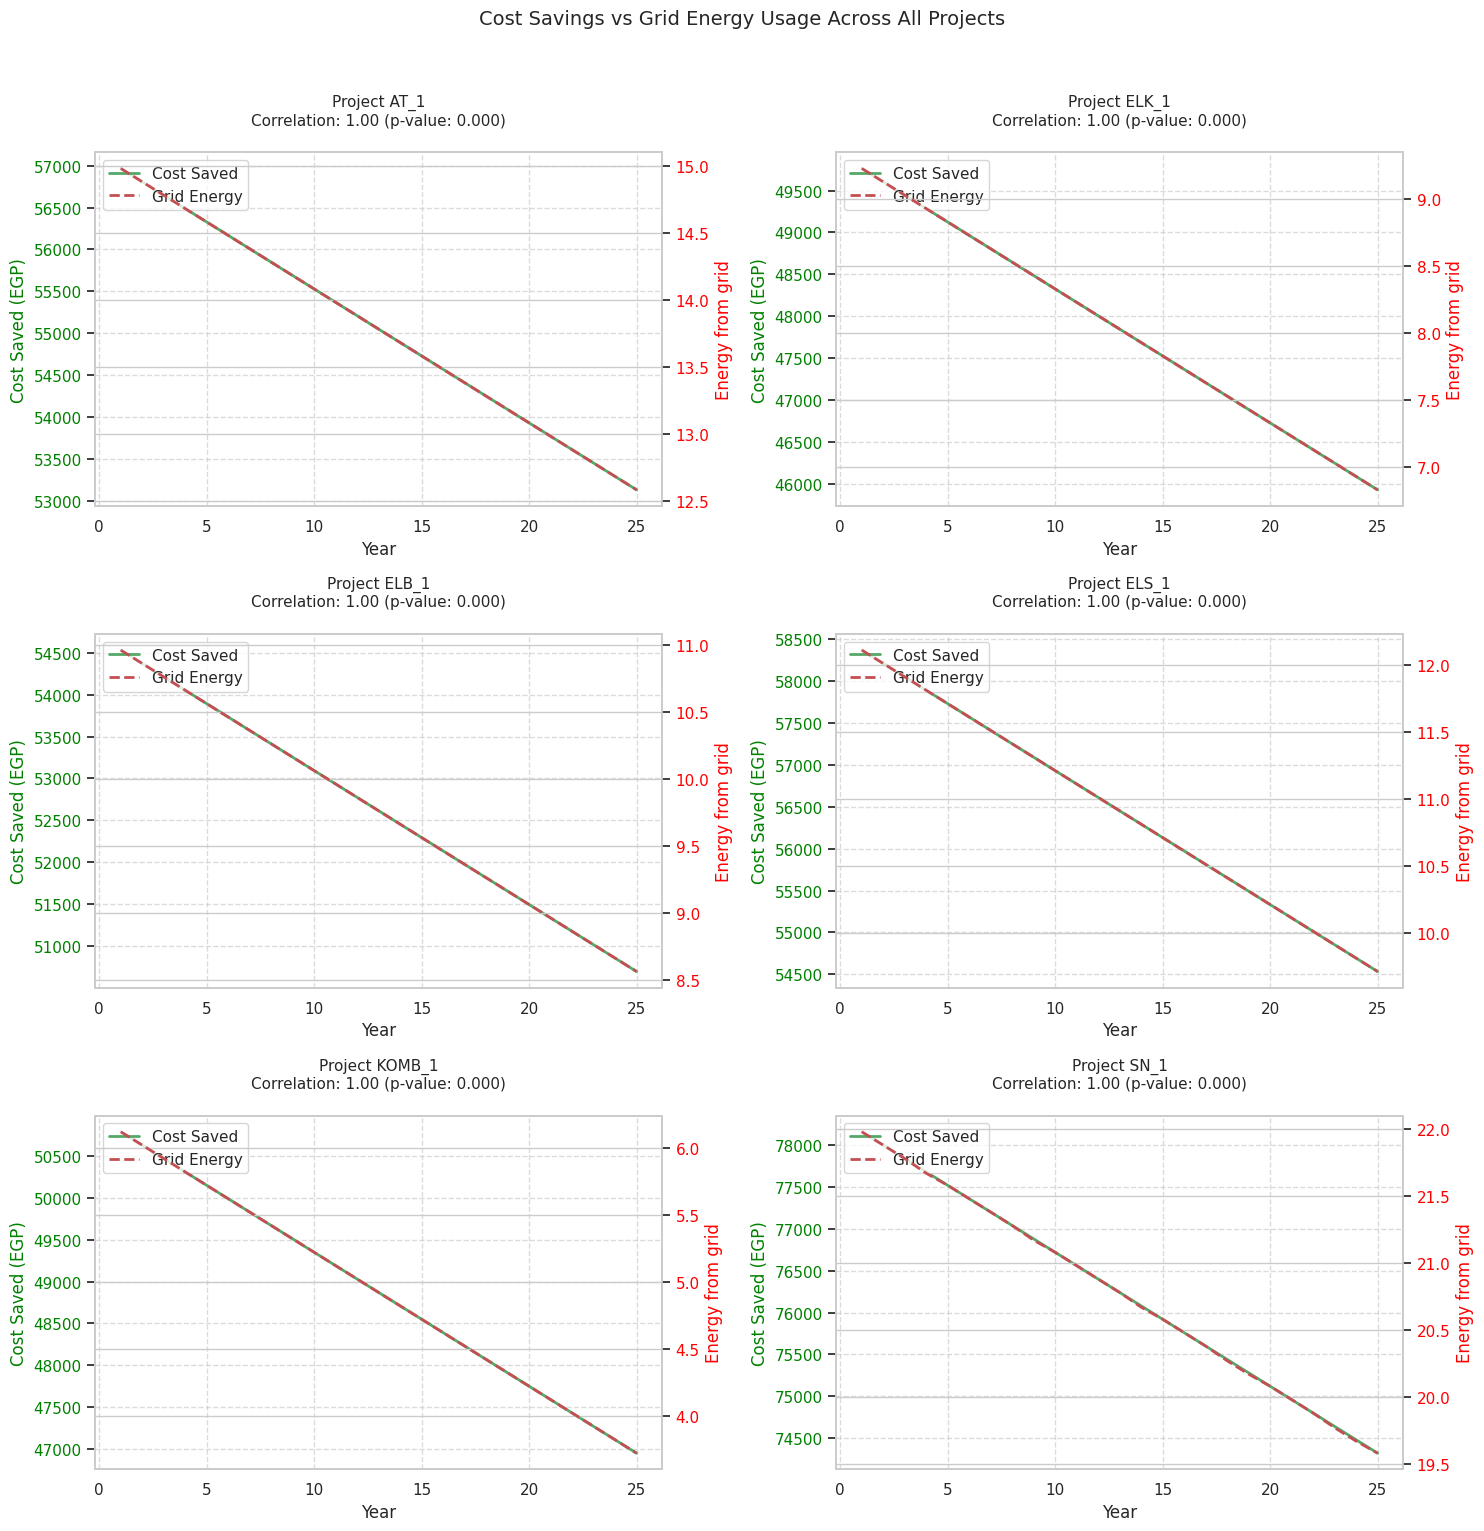

In [78]:
# Get all unique projects
projects = gs1['proj_Id'].unique()
n_projects = len(projects)

# Create subplot grid (adjust rows/cols as needed)
rows = int(np.ceil(n_projects / 2))
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
fig.suptitle('Cost Savings vs Grid Energy Usage Across All Projects', y=1.02, fontsize=14)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, proj in enumerate(projects):
    proj_data = gs1[gs1['proj_Id'] == proj].sort_values('Assessment Year')

    # Primary axis (Cost savings)
    ax1 = axes[i]
    ax1.plot(proj_data['Assessment Year'], proj_data['Cost_saved_EGP'], 'g-', linewidth=2, label='Cost Saved')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Cost Saved (EGP)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Secondary axis (Grid energy)
    ax2 = ax1.twinx()
    ax2.plot(proj_data['Assessment Year'], proj_data['Energy To Grid (MWh)'], 'r--', linewidth=2, label='Grid Energy')
    ax2.set_ylabel('Energy from grid', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Calculate correlation
    corr, p_value = pearsonr(proj_data['Cost_saved_EGP'], proj_data['Energy To Grid (MWh)'])

    # Add title with correlation info
    ax1.set_title(
        f'Project {proj}\nCorrelation: {corr:.2f} (p-value: {p_value:.3f})',
        pad=20, fontsize=11
    )

    # Add grid
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Add combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#Interpretation


*   This chart illustrates the relationship between cost savings (financial returns) and energy consumed from the grid . Here's what it tells us:

**Decline in Cost Savings :**
As the projects rely more on energy from the grid, their cost savings decrease over time.

This decline is due to a reduction in efficiency, meaning the projects are generating less renewable energy and consuming more grid power.

*  **Key Trend :**
The chart shows a consistent downward trend in cost savings for all projects over the 25-year period.
Projects that depend more heavily on grid energy experience greater declines in savings compared to those with higher self-generated renewable energy.





# **What are the saving per each project**



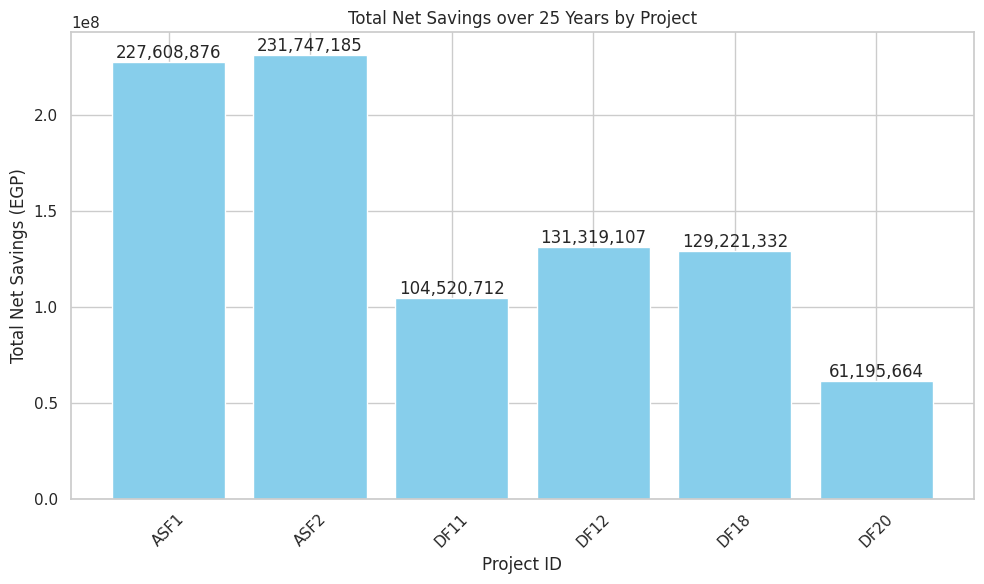

In [92]:
# Group by proj_Id and sum the Net savings over 25 years
project_net_savings = inds1.groupby('proj_Id').agg({
    'Net savings(EGP)': 'sum'
}).reset_index()

# Rename the column for clarity
project_net_savings.rename(columns={'Net savings(EGP)': 'Total Net Savings (25 Years) (EGP)'}, inplace=True)



# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(project_net_savings['proj_Id'], project_net_savings['Total Net Savings (25 Years) (EGP)'], color='skyblue')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.xlabel('Project ID')
plt.ylabel('Total Net Savings (EGP)')
plt.title('Total Net Savings over 25 Years by Project')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretations & Insights**

Wide Range of Savings: Projects show significant differences in savings, from EGP 61M to EGP 231M, indicating varied efficiency and scale.

Top Performers: Project 0F18 (EGP 231M) and 0F12 (EGP 227M) deliver the highest savings, likely due to better cost management or higher impact.

Lower Savings Projects: Project 0F20 (EGP 104M) and others below EGP 130M may need review—could be due to higher costs or lower benefits.

Consistency Check: Two projects (0F18 & 0F12) dominate, while others lag, suggesting uneven performance across initiatives.

**Recommendations**

Scale Successful Models: Replicate strategies from 0F18 & 0F12 in other projects to boost savings.

Review Underperformers: Investigate 0F20 (EGP 104M) and the lowest (EGP 61M) for cost leaks or execution issues.

Prioritize High-Impact Projects: Allocate more resources to top performers for maximum ROI.

Benchmarking: Compare project metrics (costs, timelines) to identify why some yield 2–3x more savings than others.

## **Data Extraction**

In [79]:
# Save gas station
# data gs1
gs1.to_csv("cleaned_gs1.csv", index=False)
# saving gs2
gs2.to_csv("cleaned_gs2.csv", index=False)
# saving industries data
# inds1
inds1.to_csv("cleaned_ind1.csv", index=False)
# saving ind2
inds2.to_csv("cleaned_inds2.csv", index=False)
